# A long Analysis of different Aspects of Uniswap v3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
pd.options.mode.chained_assignment = None

In [2]:
market = pd.read_csv("../../ETH-USD.csv")
market['Date'] = pd.to_datetime(market['Date'])

In [3]:
market.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

# Market Price

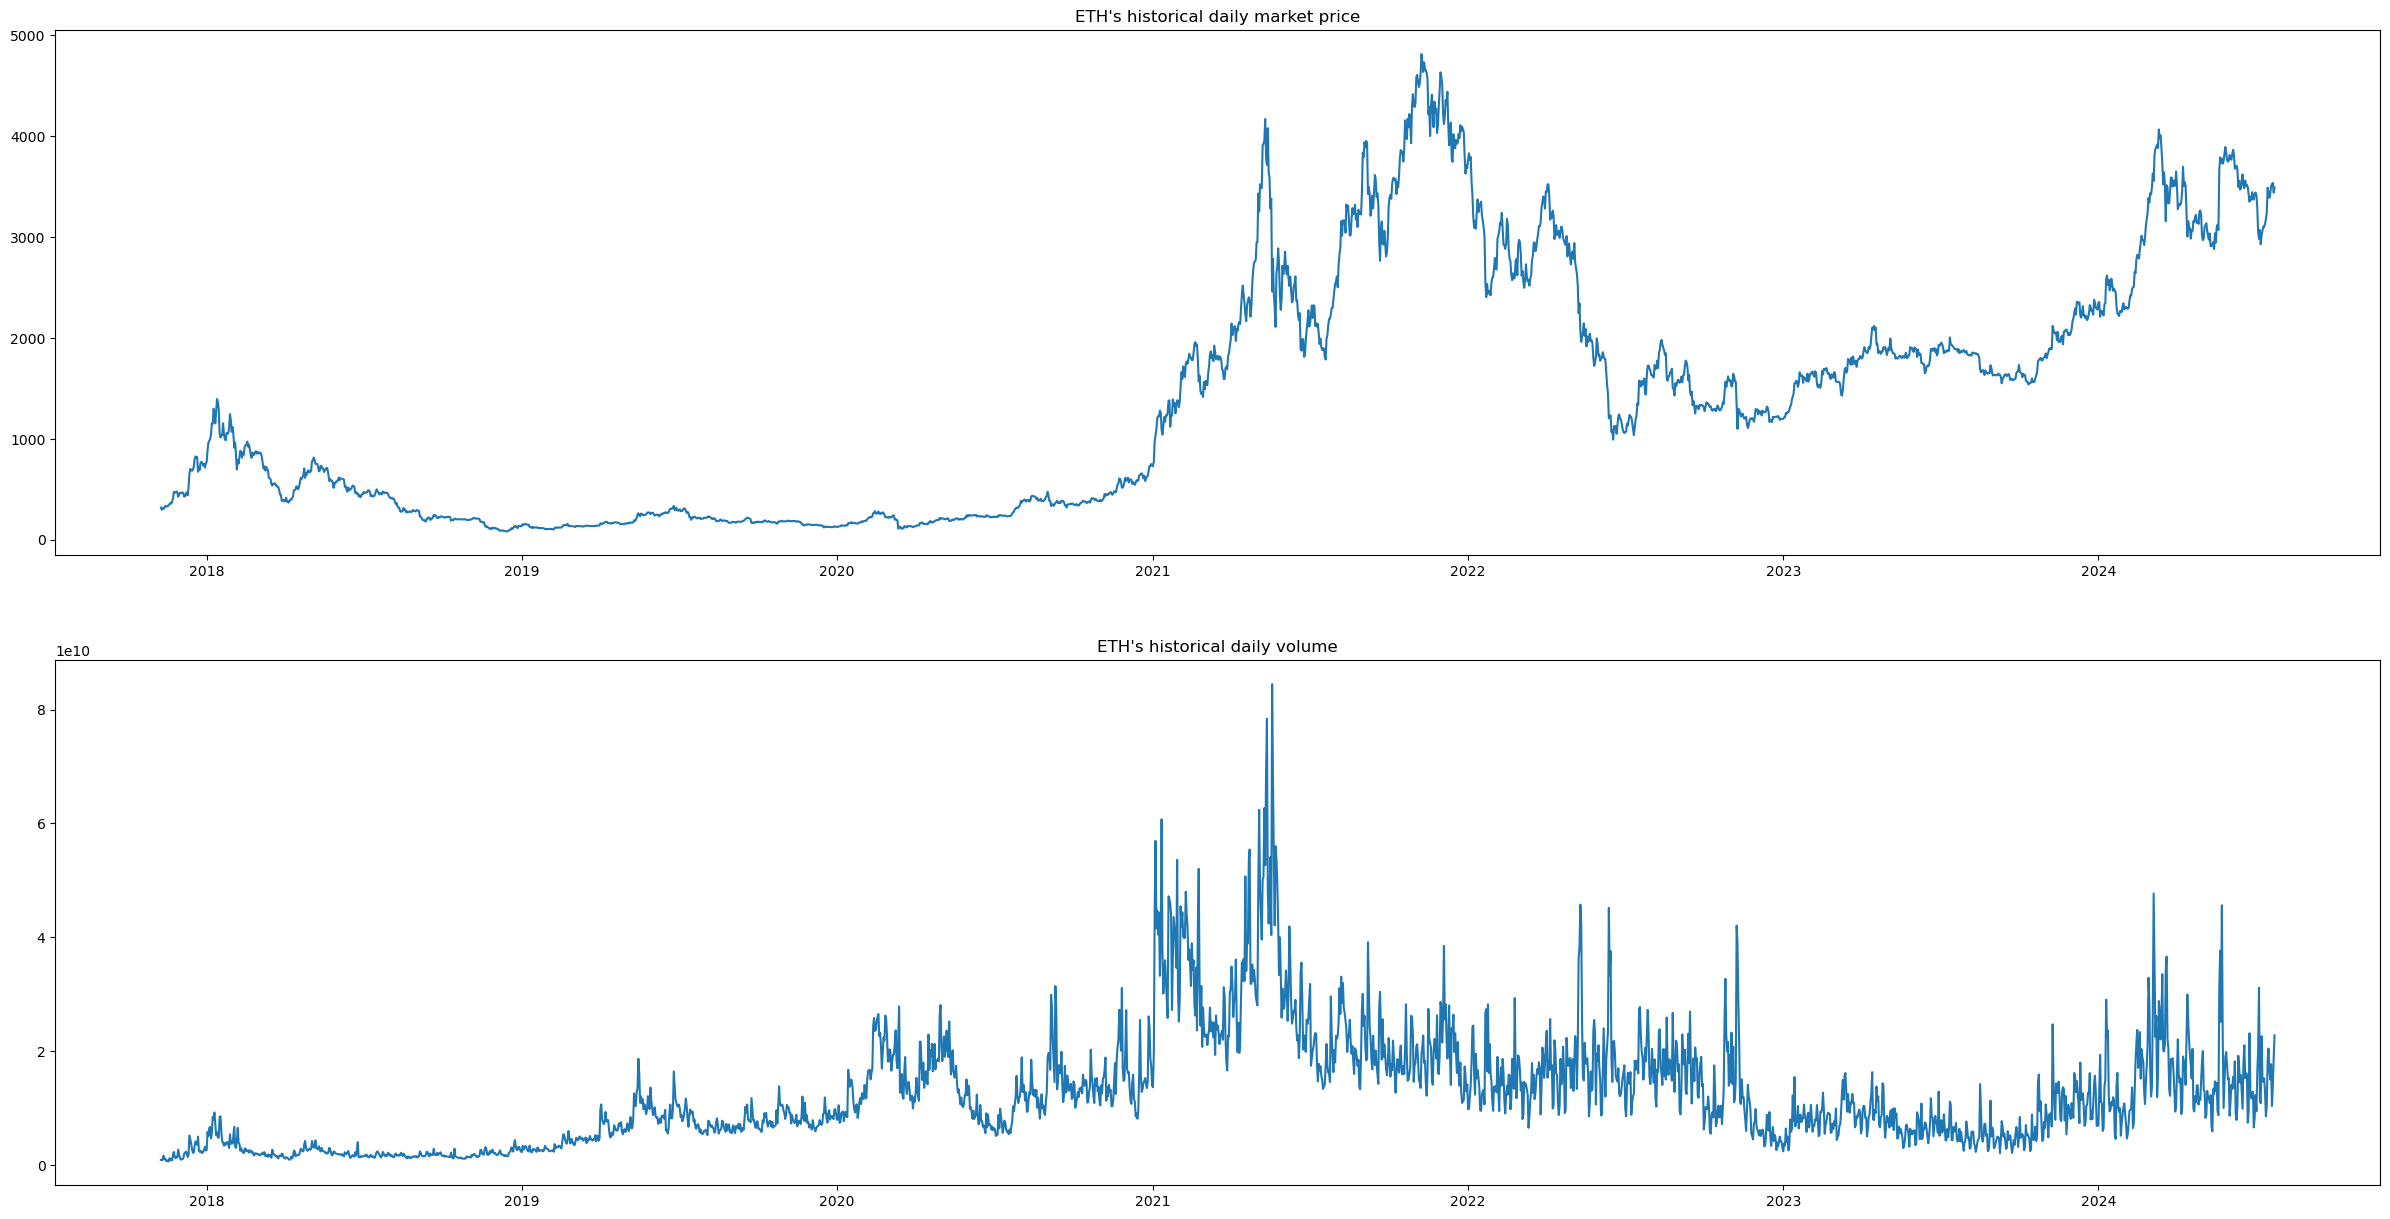

In [36]:
fig, axs = plt.subplots(2, figsize=(30, 15))
axs[0].plot(pd.to_datetime(market['Date']),market['Adj Close'])
axs[0].set_title("ETH's historical daily market price")
axs[1].plot(pd.to_datetime(market['Date']),market['Volume'])
axs[1].set_title("ETH's historical daily volume")
plt.show()

In [37]:
market.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [38]:

market['log_returns'] = np.log(market['Adj Close']).diff()

# Market log returns

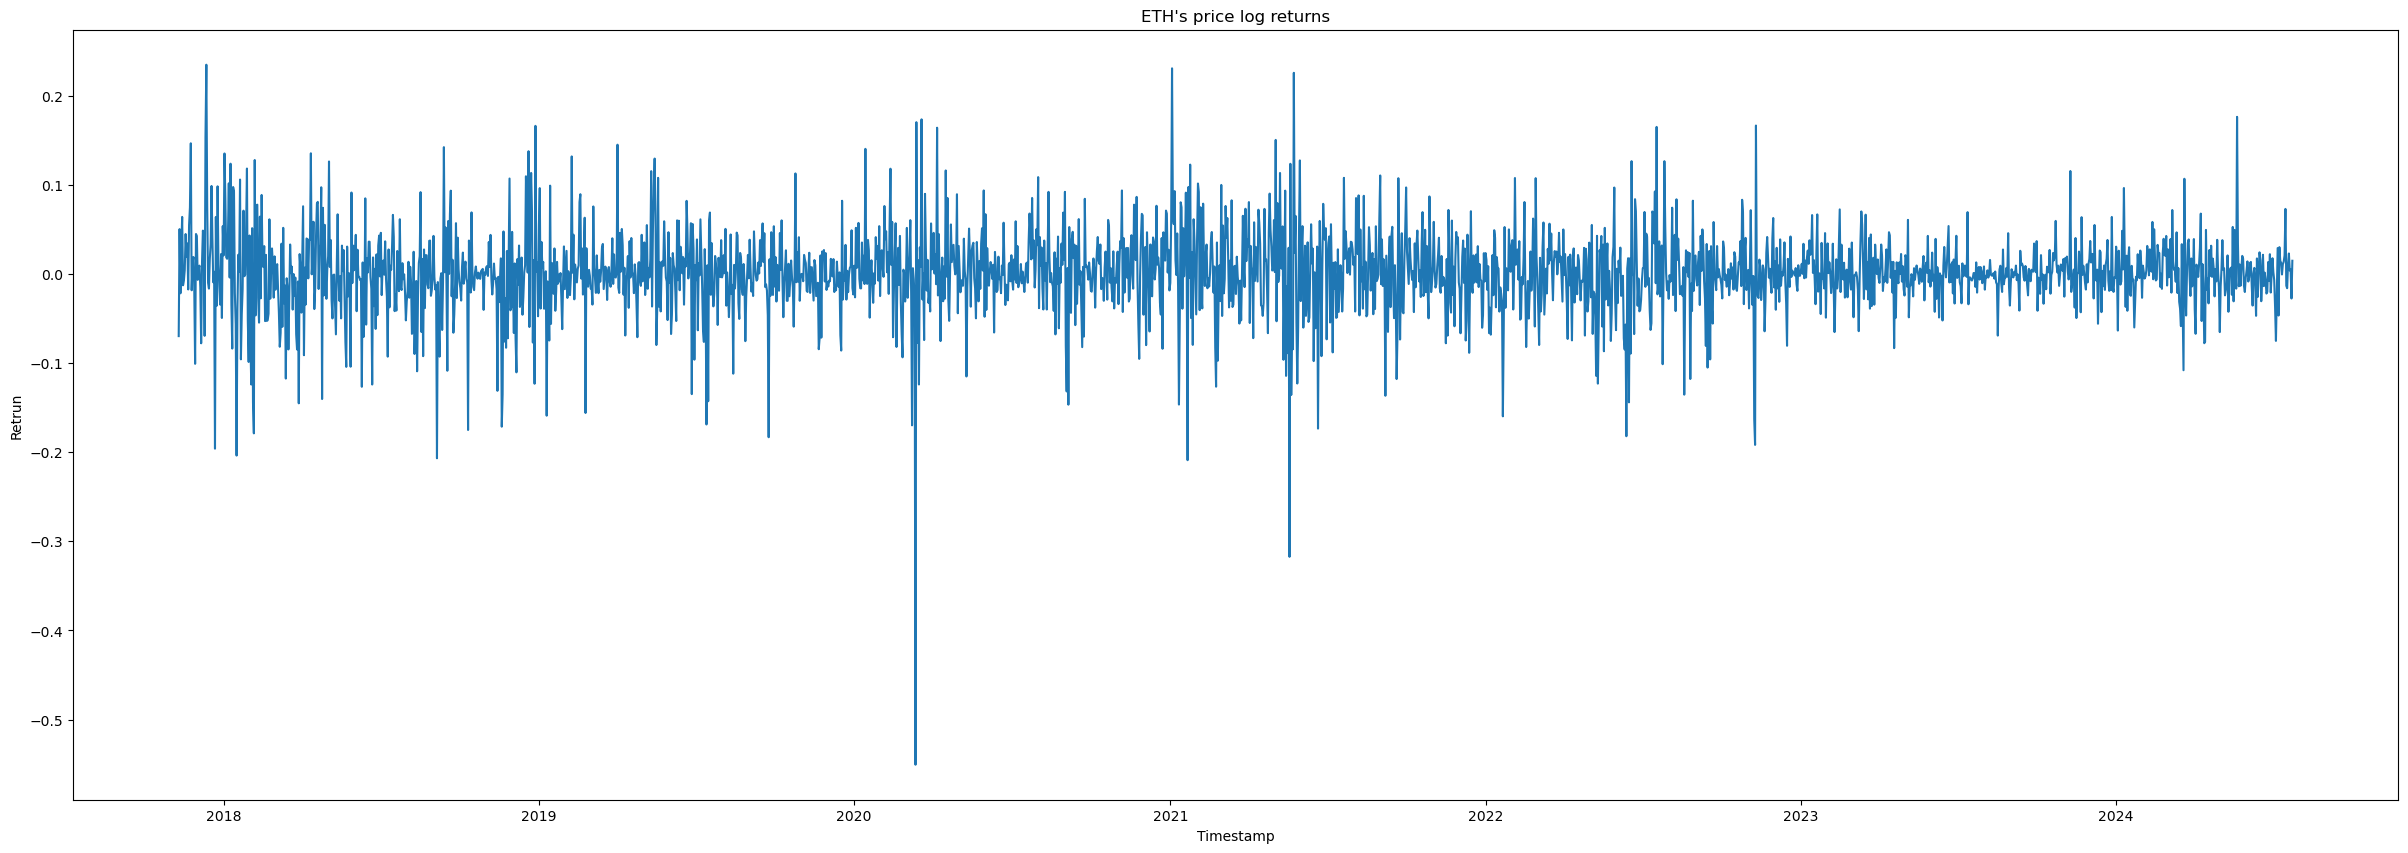

In [39]:
plt.figure(figsize=(30,10))
plt.plot(market['Date'][1:],market['log_returns'][1:])
plt.title("ETH's price log returns")
plt.xlabel("Timestamp")
plt.ylabel("Retrun")
plt.show()

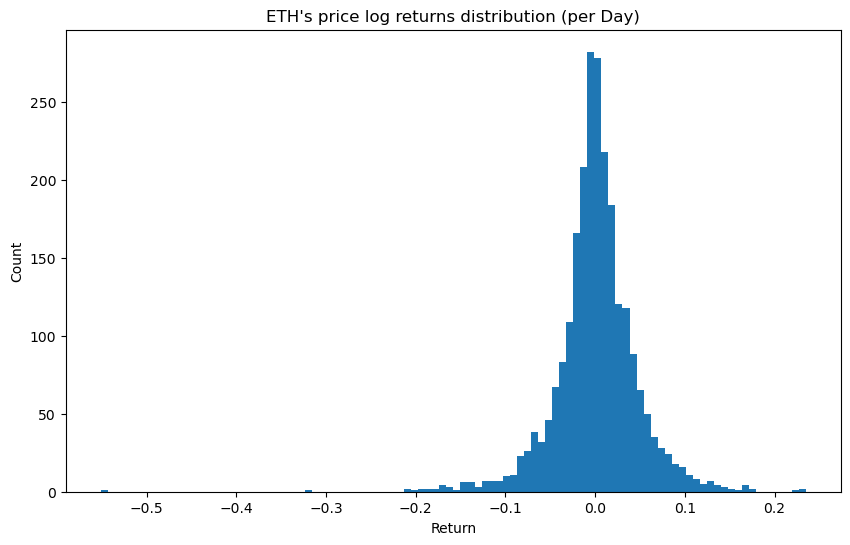

Log returns' drift (per minute): 0.0009750960519335982
Log returns' volatility: 4.69%
Log returns' annualized volatility: 74.45%


In [62]:
returns  = market['log_returns'][1:]
plt.figure(figsize=(10,6))
plt.hist(returns, bins=100)
plt.title("ETH's price log returns distribution (per Day)")
plt.xlabel("Return")
plt.ylabel("Count")
plt.show()
print(f"Log returns' drift (per minute): {returns.mean()}")
print(f"Log returns' volatility: {round(100*returns.std(),2)}%")
print(f"Log returns' annualized volatility: {round(np.sqrt(252)*100*returns.std(),2)}%")

### Checking normality of log-returns

#### Q-Q plot

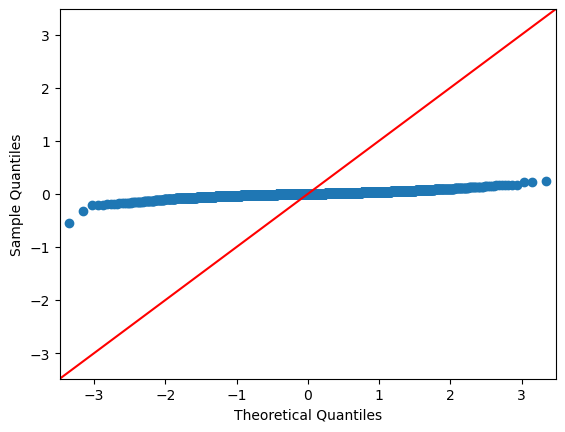

In [55]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(returns, line='45')

plt.show()

#### Kolmogorov-Smirnov test

In [56]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test for normality
kstest(returns, 'norm')


KstestResult(statistic=0.4411241373549587, pvalue=0.0, statistic_location=0.11609774987535548, statistic_sign=1)

# Market Price and Volume

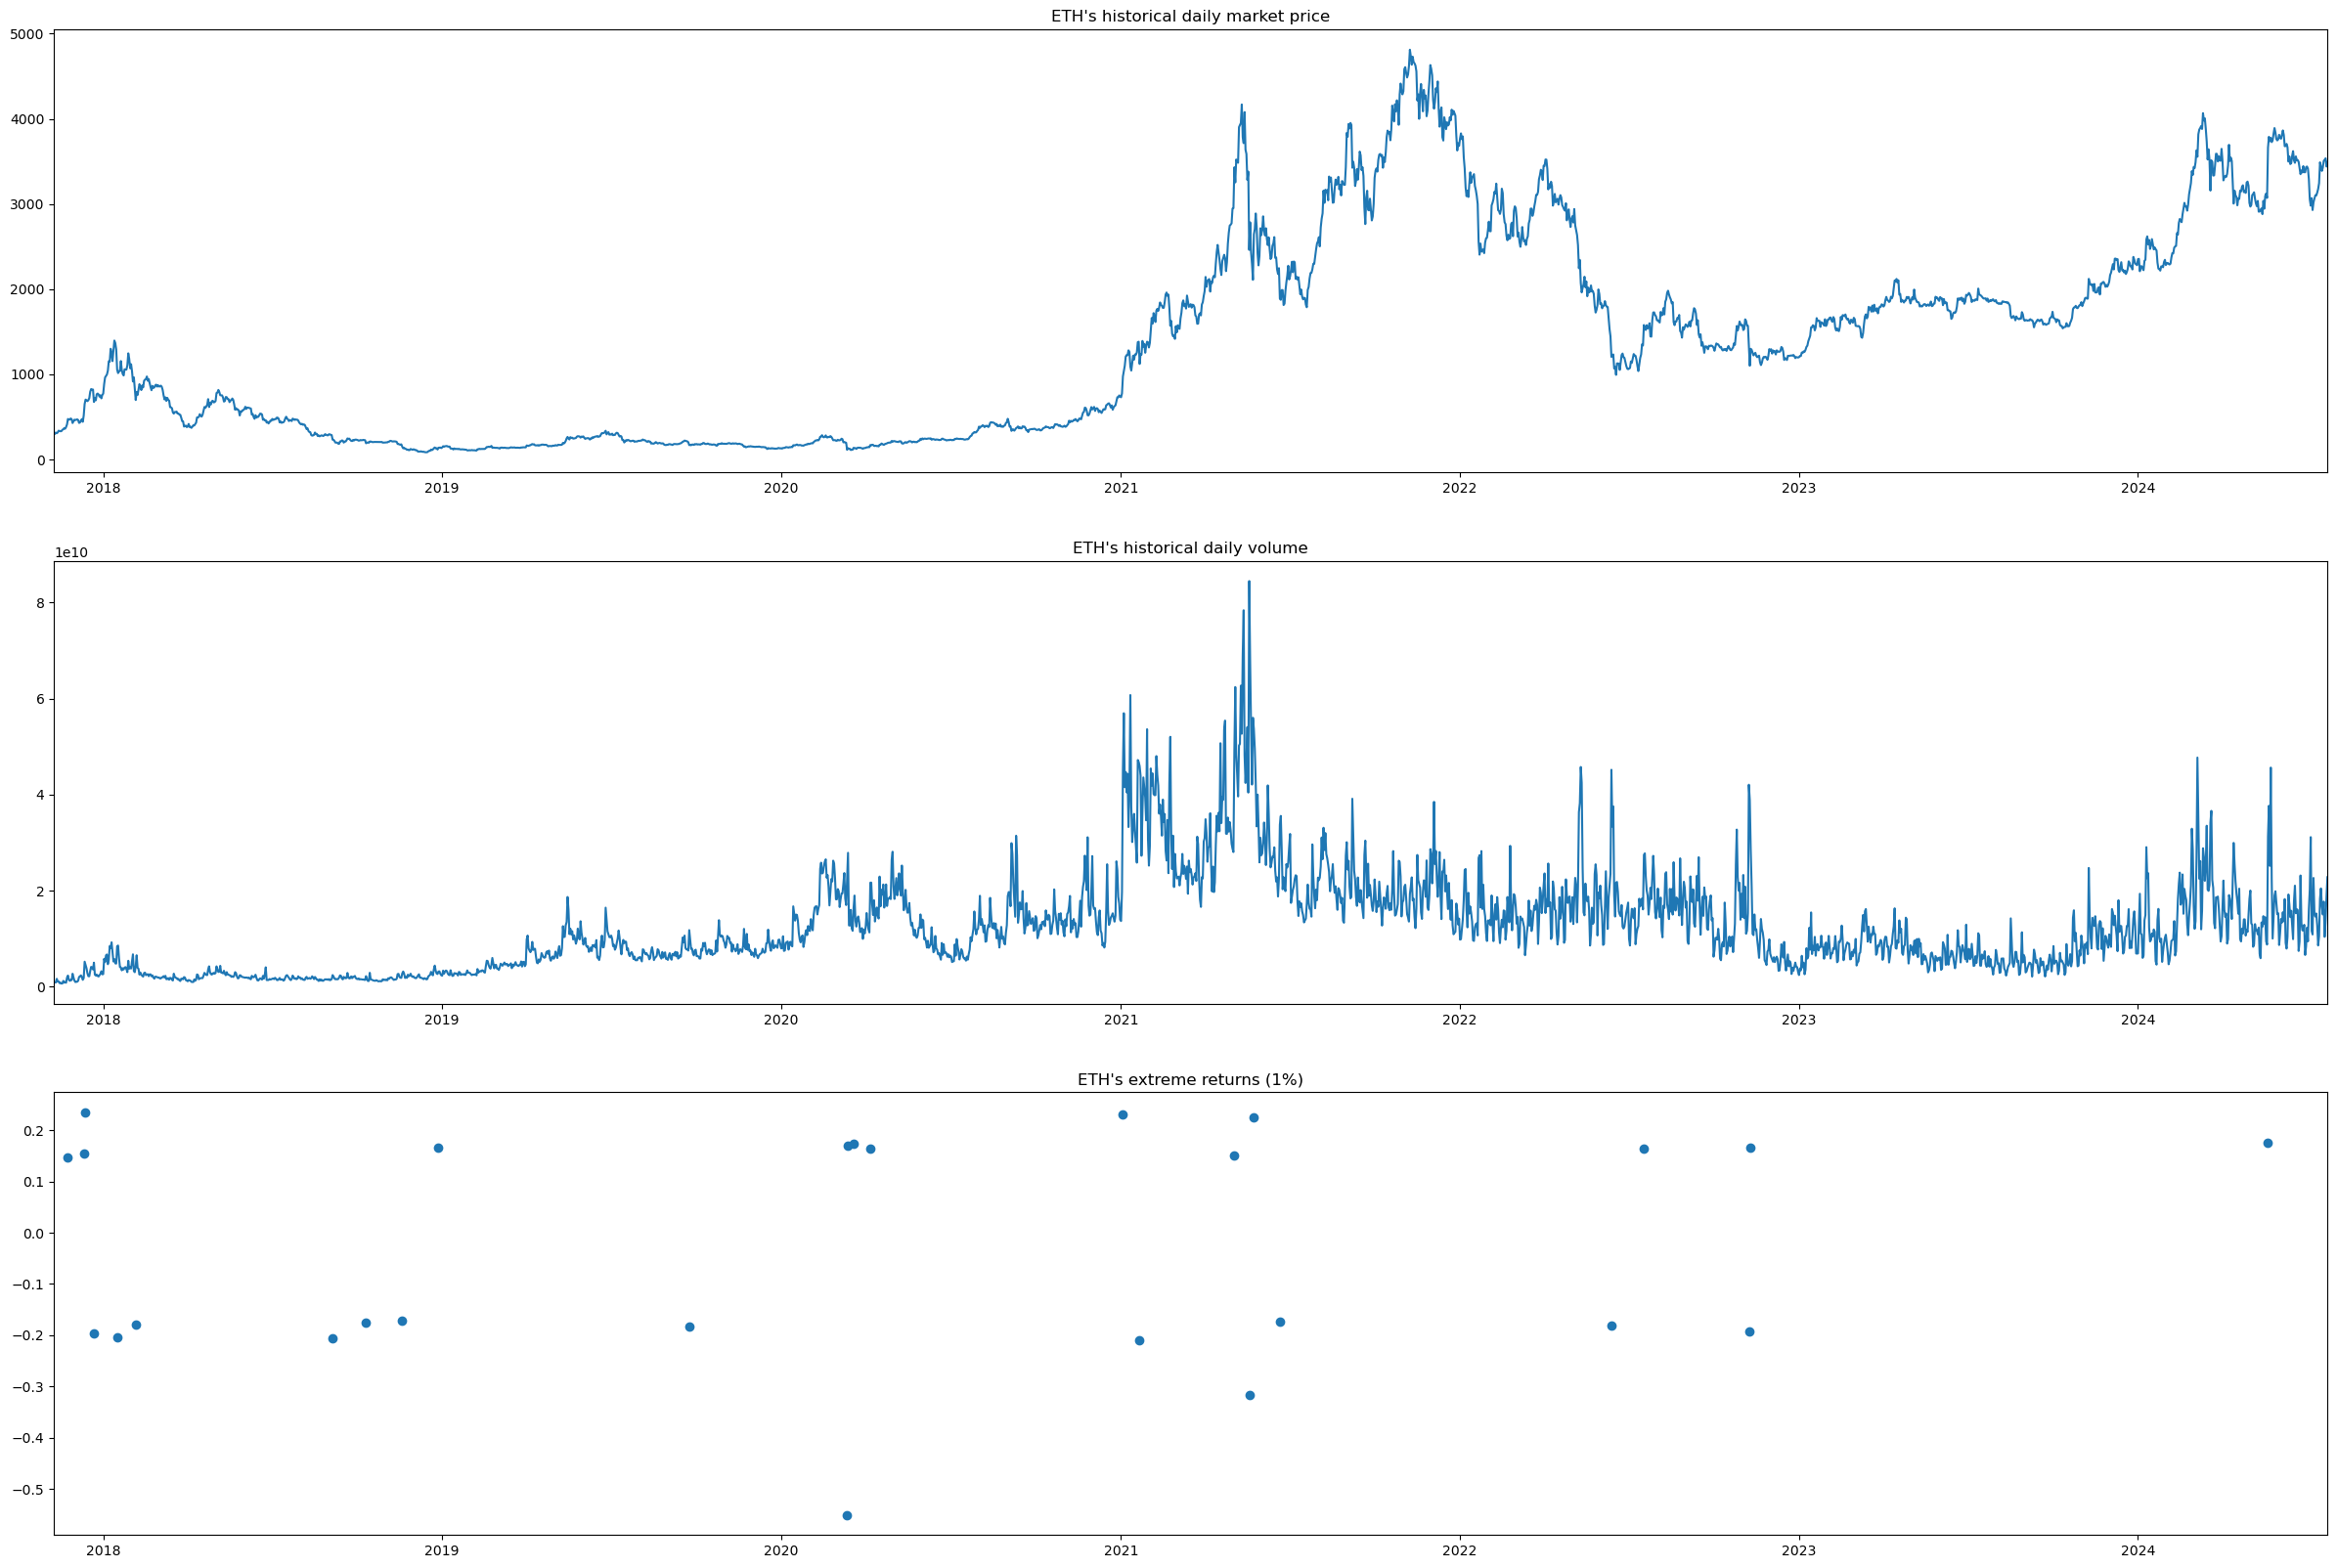

In [304]:
start_date, end_date = min(market.Date), max(market.Date)
extreme_mask = (market.log_returns <= market.log_returns.quantile(0.005)) | (market.log_returns >= market.log_returns.quantile(0.995))
fig, axs = plt.subplots(3, figsize=(30, 20))
axs[0].plot(pd.to_datetime(market['Date']),market['Adj Close'])
axs[0].set_title("ETH's historical daily market price")
axs[0].set_xlim(start_date,end_date)
axs[1].plot(pd.to_datetime(market['Date']),market['Volume'])
axs[1].set_title("ETH's historical daily volume")
axs[1].set_xlim(start_date,end_date)
axs[2].scatter(market[extreme_mask]['Date'],market[extreme_mask]['log_returns'])
axs[2].set_title("ETH's extreme returns (1%)")
axs[2].set_xlim(start_date,end_date)
plt.show()

## FTX collapse : November 2022

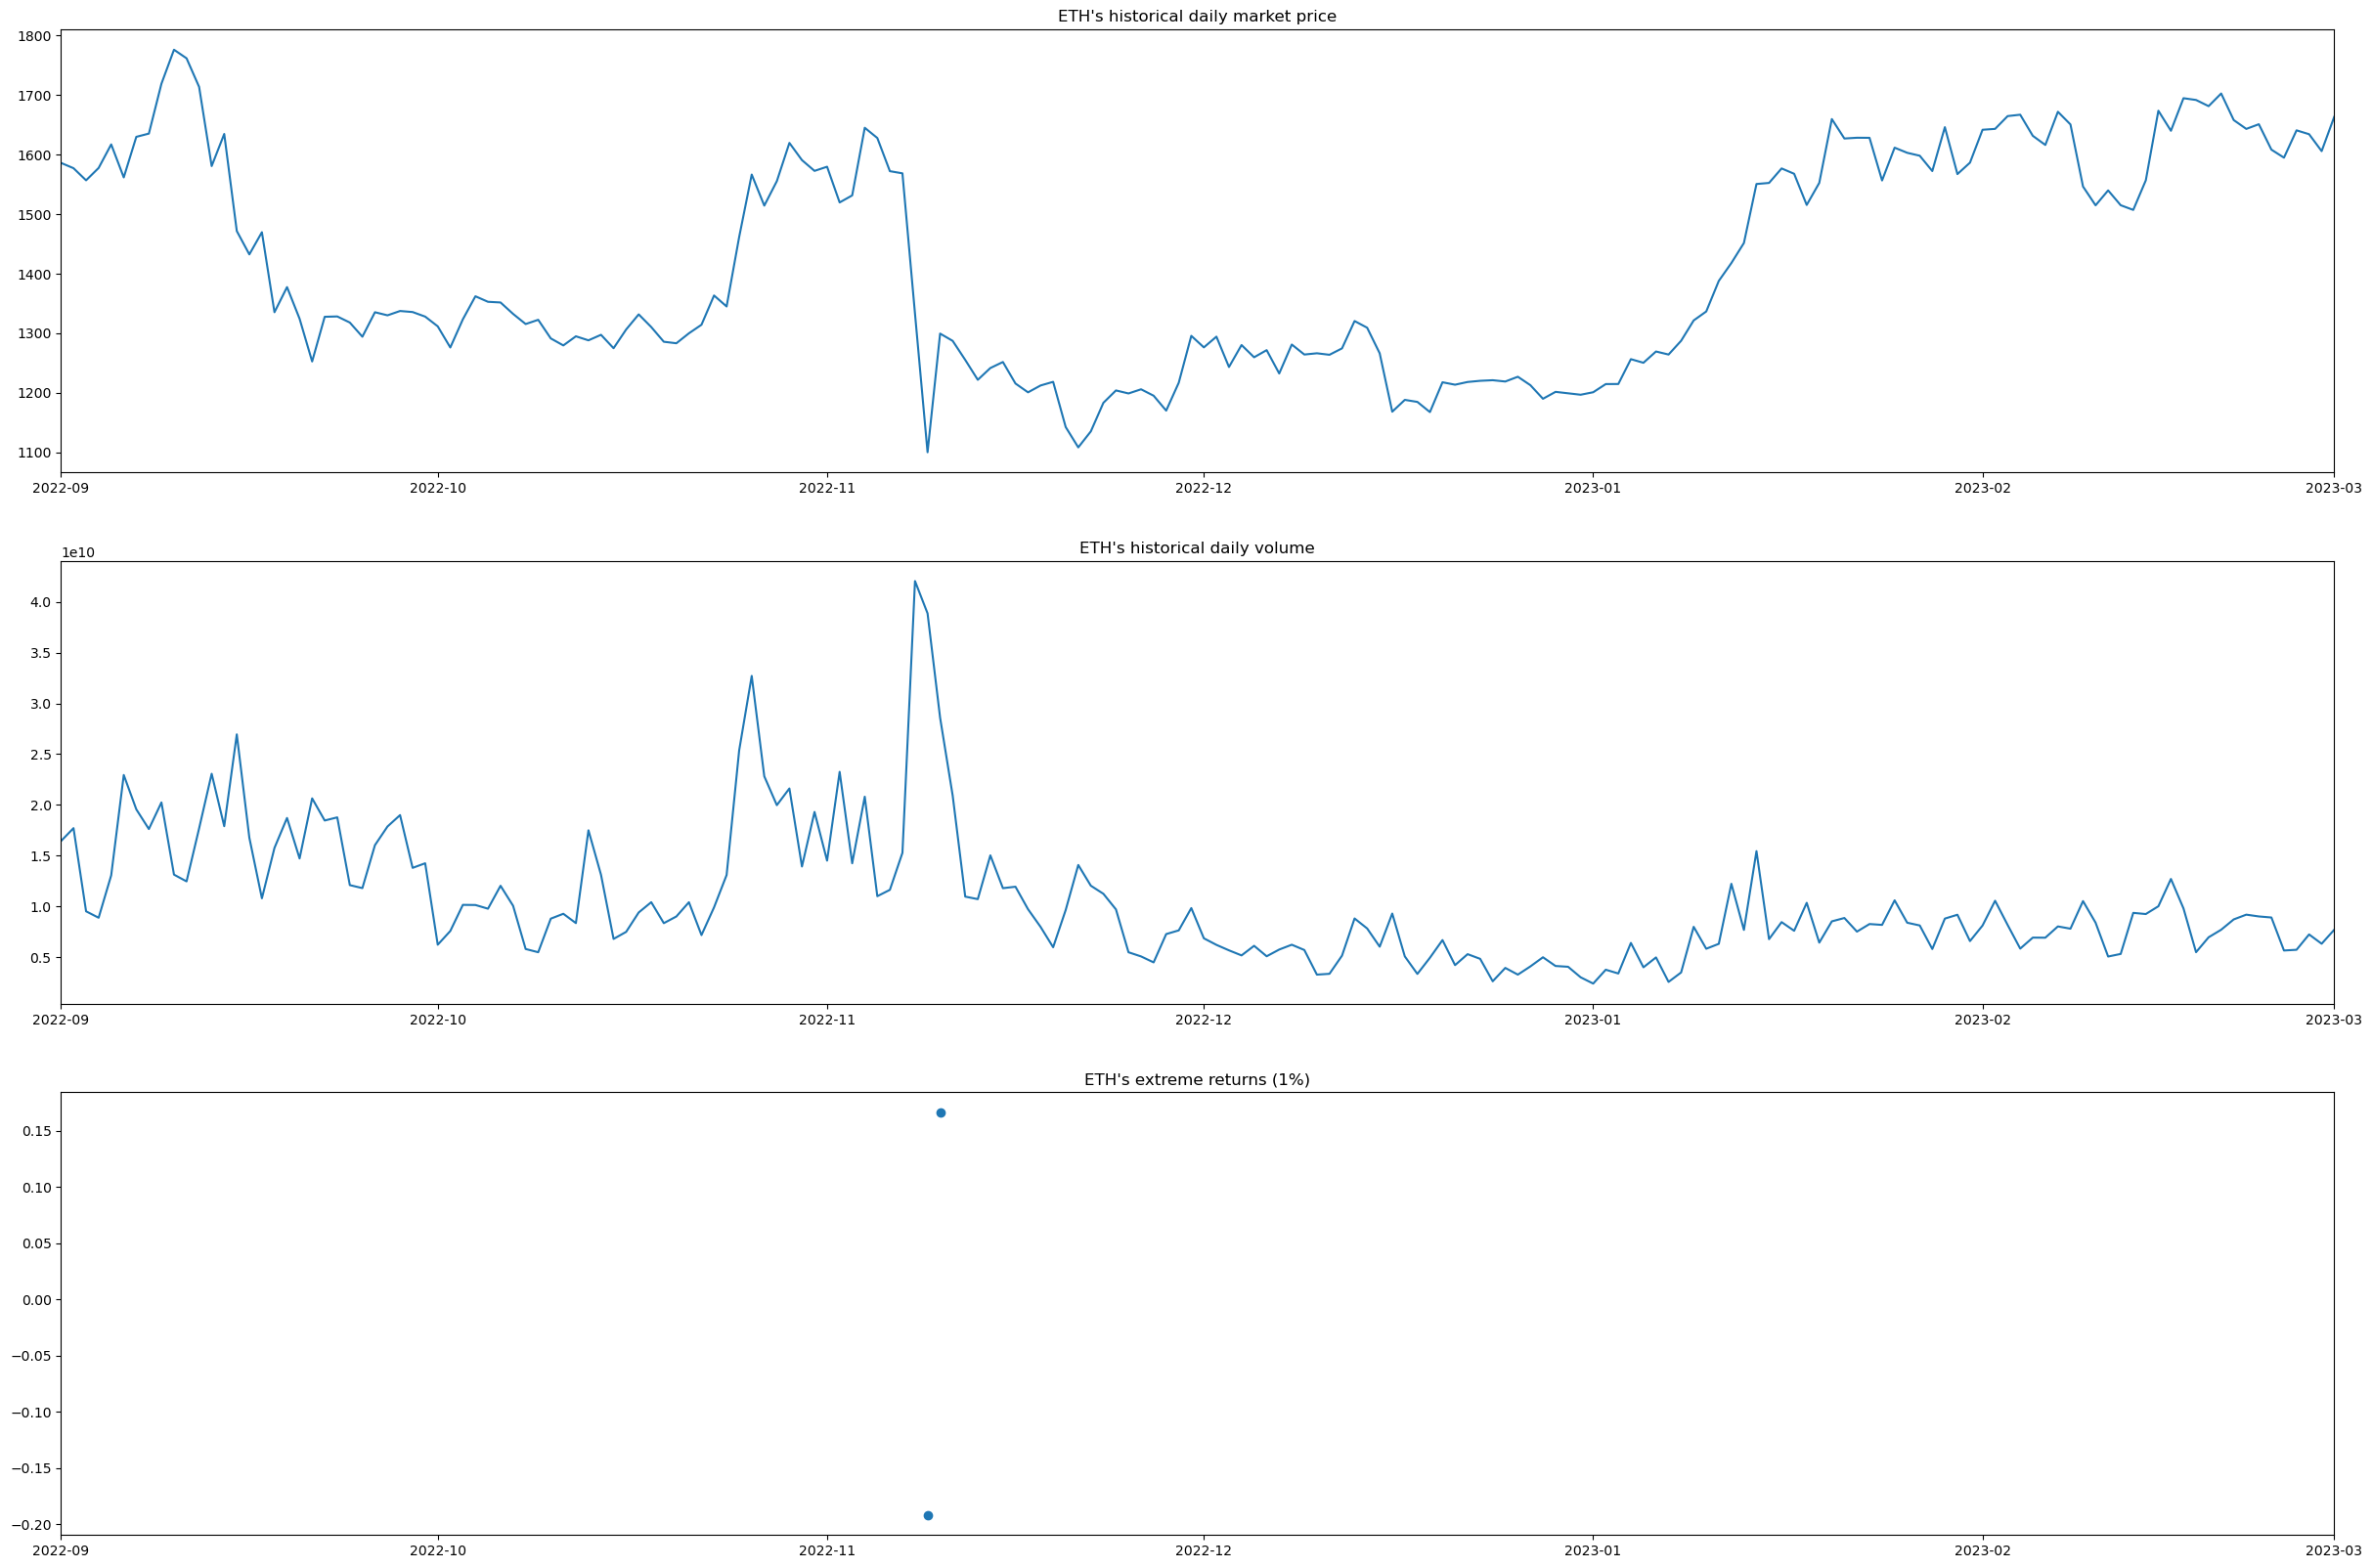

In [305]:
start_date, end_date = pd.Timestamp(2022,9,1), pd.Timestamp(2023,3,1)
extreme_mask = (market.log_returns <= market.log_returns.quantile(0.005)) | (market.log_returns >= market.log_returns.quantile(0.995))
ftx_mask = (market['Date'] >= start_date) & (market['Date'] <= end_date)
fig, axs = plt.subplots(3, figsize=(30, 20))
axs[0].plot(market[ftx_mask]['Date'],market[ftx_mask]['Adj Close'])
axs[0].set_title("ETH's historical daily market price")
axs[0].set_xlim(start_date,end_date)
axs[1].plot(market[ftx_mask]['Date'],market[ftx_mask]['Volume'])
axs[1].set_title("ETH's historical daily volume")
axs[1].set_xlim(start_date,end_date)
axs[2].scatter(pd.to_datetime(market[ftx_mask & extreme_mask]['Date']),market[ftx_mask & extreme_mask]['log_returns'])
axs[2].set_title("ETH's extreme returns (1%)")
axs[2].set_xlim(start_date,end_date)
plt.show()

In [306]:
market[ftx_mask]

Date         Open         High          Low        Close  \
1757 2022-09-01  1553.756348  1593.082764  1520.188354  1586.176758   
1758 2022-09-02  1586.017944  1643.183228  1551.877930  1577.220459   
1759 2022-09-03  1577.213745  1579.454346  1541.672119  1556.872681   
1760 2022-09-04  1556.895874  1578.009277  1543.698853  1577.641602   
1761 2022-09-05  1577.884033  1621.661377  1559.781860  1617.183228   
...         ...          ...          ...          ...          ...   
1934 2023-02-25  1608.658325  1608.865112  1567.631714  1594.914917   
1935 2023-02-26  1594.761108  1645.273438  1590.393066  1640.817139   
1936 2023-02-27  1640.763672  1662.575684  1615.387939  1634.326416   
1937 2023-02-28  1634.502441  1644.435791  1602.428101  1605.895142   
1938 2023-03-01  1606.040405  1663.433716  1601.548584  1663.433716   

        Adj Close       Volume  log_returns  
1757  1586.176758  16434276817     0.020697  
1758  1577.220459  17708478709    -0.005662  
1759  1556.872681   9516825994    -0.012985  
1760  1577.641602   8884144998     0.013252  
1761  1617.183228  13060541168     0.024755  
...           ...          ...          ...  
1934  1594.914917   5657686235    -0.008403  
1935  1640.817139   5727967432     0.028374  
1936  1634.326416   7239824677    -0.003964  
1937  1605.895142   6323676957    -0.017549  
1938  1663.433716   7701847224     0.035203  

[182 rows x 8 columns]

## Zoom in on Uniswap

In [4]:
contract = pd.read_csv('../../total_historical_swaps.csv', index_col=0)
contract['timestamp'] = pd.to_datetime(contract['timestamp'])

In [5]:
contract.head()

block_number           timestamp        price  \
0      15000000 2022-06-21 02:28:20  1120.919456   
1      15000000 2022-06-21 02:28:20  1120.849261   
2      15000000 2022-06-21 02:28:20  1120.702435   
3      15000000 2022-06-21 02:28:20  1120.699905   
4      15000000 2022-06-21 02:28:20  1120.650567   

                         sqrtPriceX96    tick            liquidity  \
0  2366423013171741668686499593734902  206101  6080156663830814986   
1  2366497111835569073969346630584718  206102  6080156663830814986   
2  2366652127713112510614767220147198  206103  6080156663830814986   
3  2366654798868440725727243535775566  206103  6080156663830814986   
4  2366706895255301332901499621679978  206103  6080156663830814986   

                                       sender  \
0  0xBEEFBaBEeA323F07c59926295205d3b7a17E8638   
1  0x0eae044f00B0aF300500F090eA00027097d03000   
2  0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4   
3  0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45   
4  0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45   

                                    recipient       amount0    amount1  \
0  0xBEEFBaBEeA323F07c59926295205d3b7a17E8638  82499.400000 -73.592768   
1  0x735a26a57A0A0069dfABd41595A970faF5E1ee8b  -6373.916520   5.689351   
2  0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4 -13333.069157  11.902236   
3  0x0698Fa3B48313c5160619bDB970dEB98e558Ea75   -229.733407   0.205093   
4  0xdb43eAfC1c3544626F59251d9378F641Dd1f252e  -4480.459593   4.000000   

                                    transaction_hash  
0  0xdac8ae61a79ca02a05918b5e3e901d77d8a7fffe2fe1...  
1  0x8b6d71ff4c9fe26948a04bc2b12c3c47fc259ad78c86...  
2  0xf536d21611d50d9abe91d22f7f81456acc4d6d0c0c42...  
3  0x501df5312db055c50e20045e7633e0965a98ae2a1963...  
4  0xb29886cb24fd609f59f1f741e25d446b154e50fc12d4...

### Contract Price

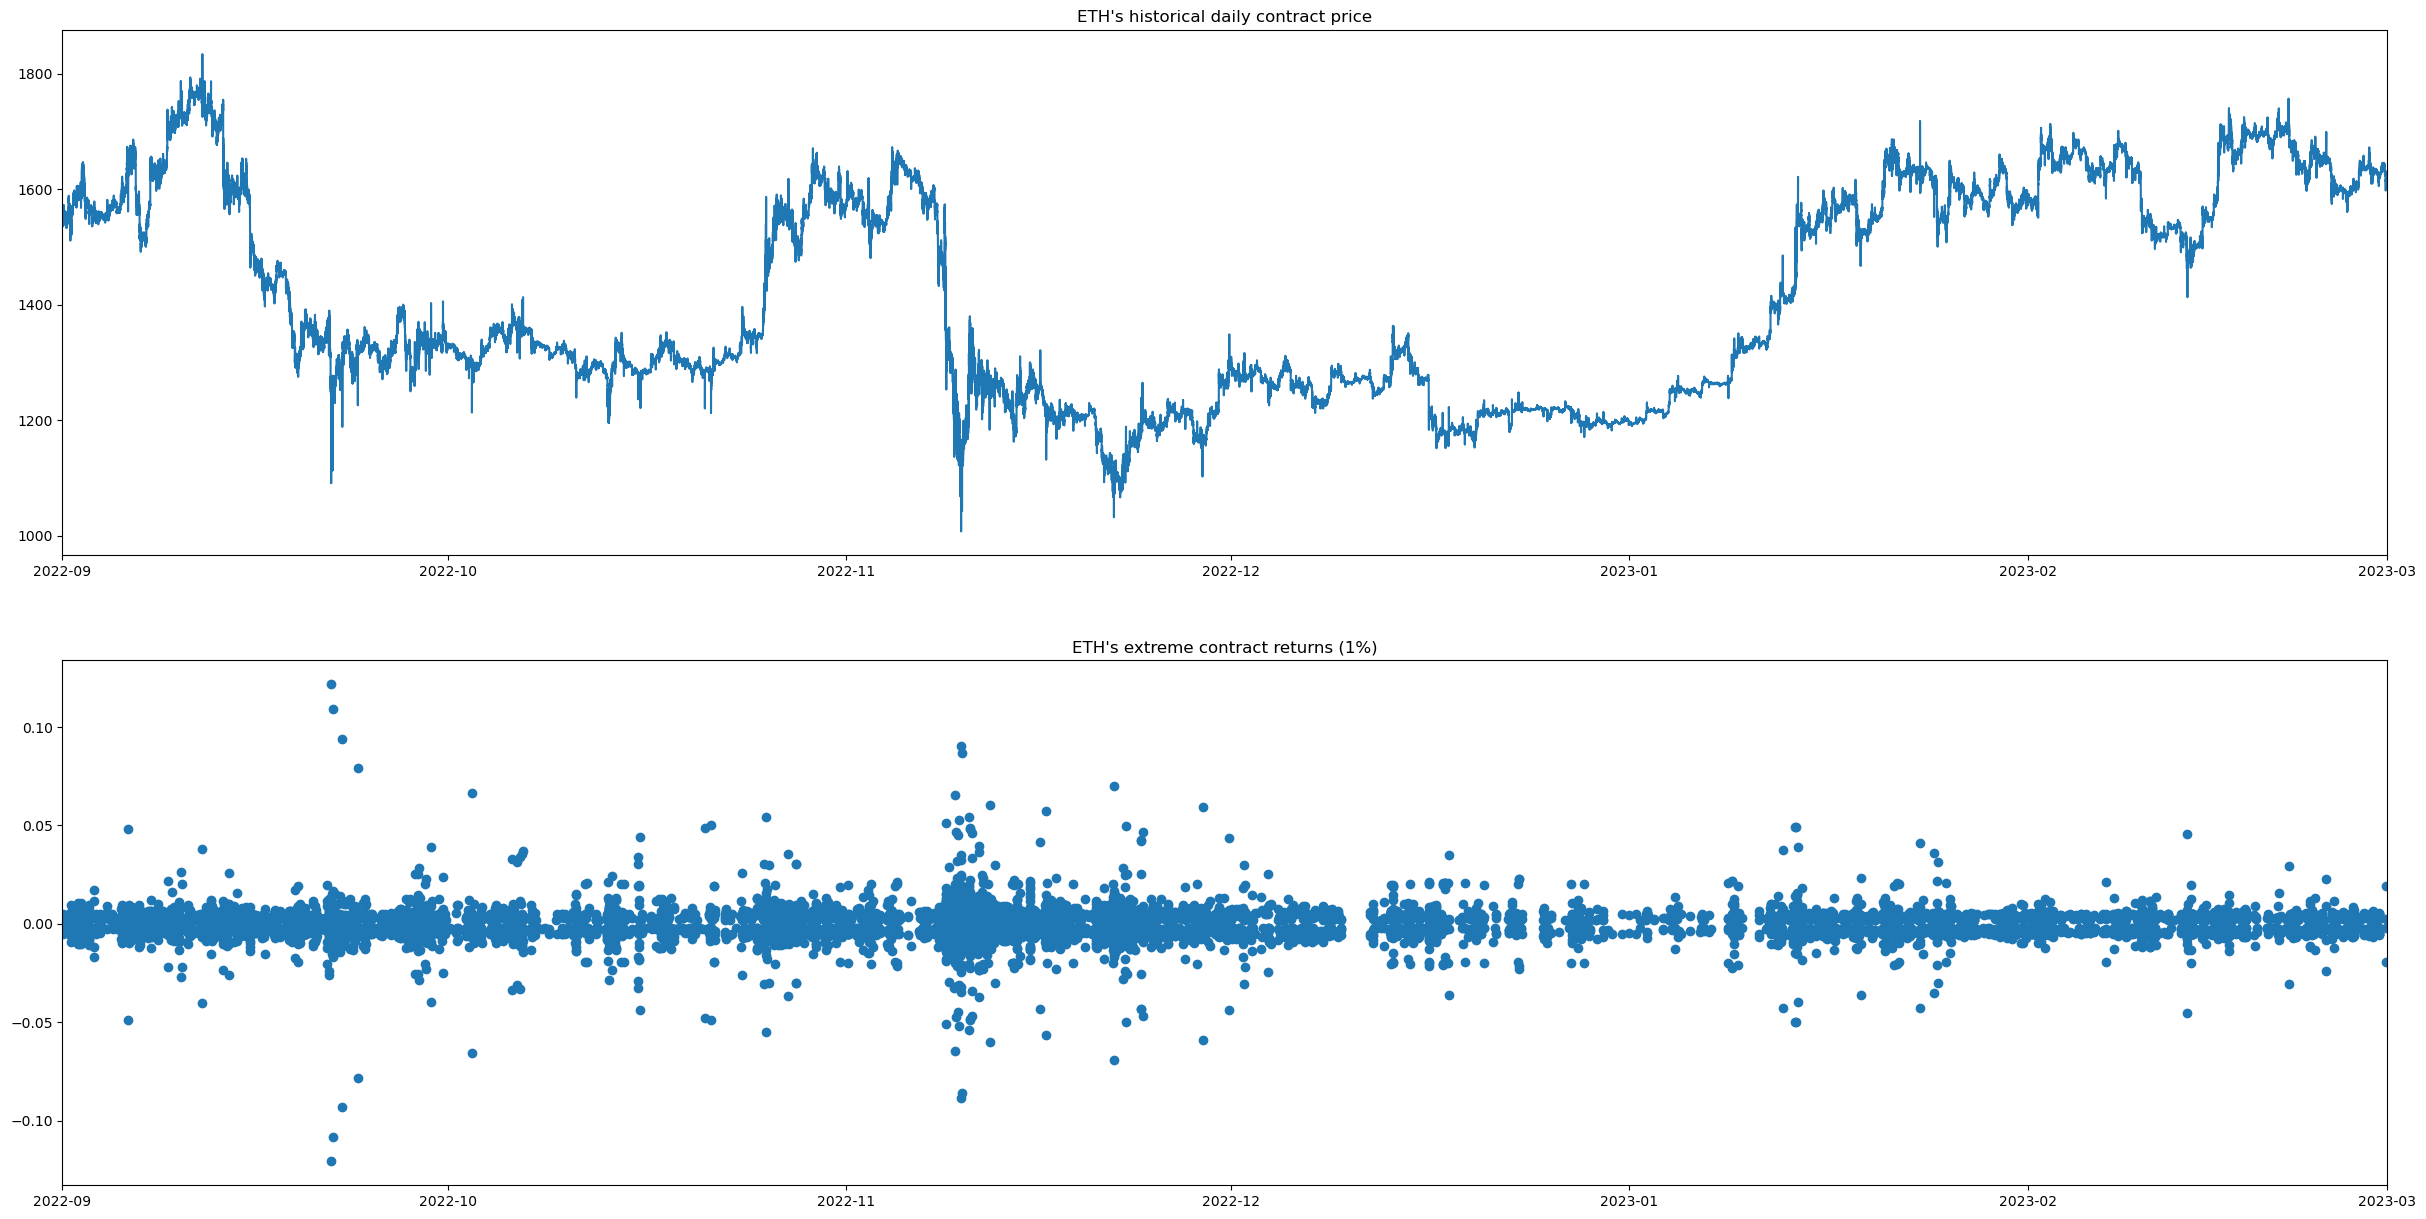

In [6]:
start_date, end_date = pd.Timestamp(2022,9,1), pd.Timestamp(2023,3,1)
stress_mask = (contract.timestamp <= end_date) & (contract.timestamp >= start_date)
contract_stressed = contract[stress_mask]
contract_stressed['log_returns'] = np.log(contract_stressed['price']).diff()
stress_extreme_mask = (contract_stressed.log_returns <= contract_stressed.log_returns.quantile(0.005)) | (contract_stressed.log_returns >= contract_stressed.log_returns.quantile(0.995))

fig, axs = plt.subplots(2, figsize=(30, 15))
axs[0].plot(contract_stressed['timestamp'],contract_stressed['price'])
axs[0].set_title("ETH's historical daily contract price")
axs[0].set_xlim(start_date,end_date)
axs[1].scatter(pd.to_datetime(contract_stressed[stress_extreme_mask]['timestamp']),contract_stressed[stress_extreme_mask]['log_returns'])
axs[1].set_title("ETH's extreme contract returns (1%)")
axs[1].set_xlim(start_date,end_date)
plt.show()

## Zoom on contract price

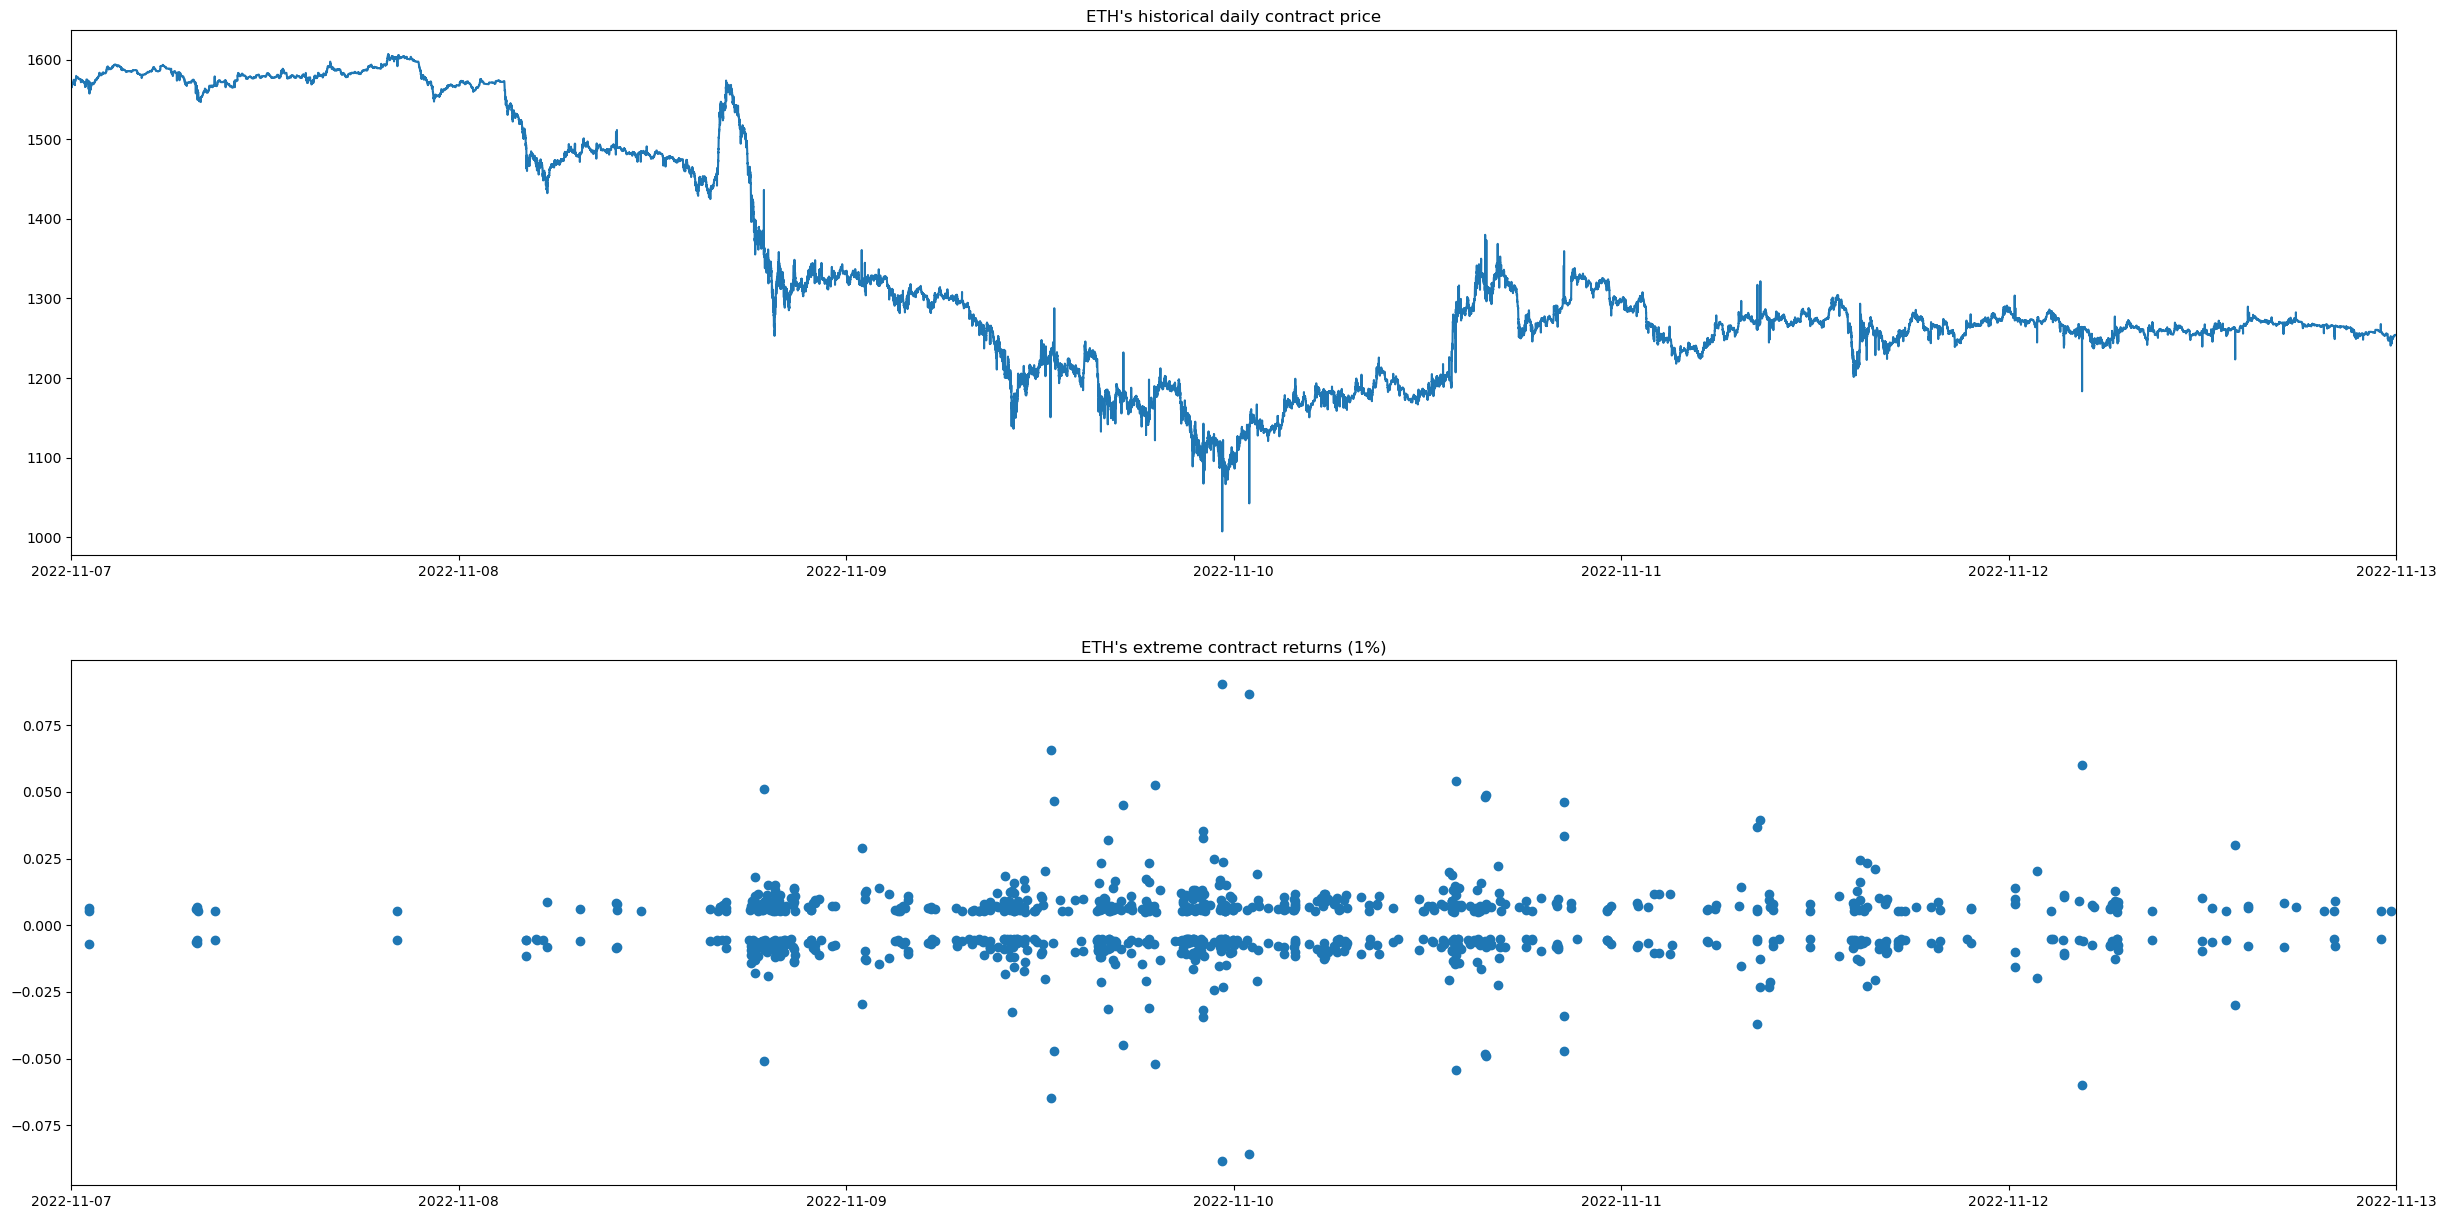

In [7]:
start_date, end_date = pd.Timestamp(2022,11,7), pd.Timestamp(2022,11,13)
zoom_mask = (contract.timestamp <= end_date) & (contract.timestamp >= start_date)
contract_zoomed = contract[zoom_mask]
contract_zoomed['log_returns'] = np.log(contract_zoomed['price']).diff()
zoom_extreme_mask = (contract_zoomed.log_returns <= contract_zoomed.log_returns.quantile(0.005)) | (contract_zoomed.log_returns >= contract_zoomed.log_returns.quantile(0.995))
fig, axs = plt.subplots(2, figsize=(30, 15))
axs[0].plot(contract_zoomed['timestamp'],contract_zoomed['price'])
axs[0].set_title("ETH's historical daily contract price")
axs[0].set_xlim(start_date,end_date)
axs[1].scatter(pd.to_datetime(contract_zoomed[zoom_extreme_mask]['timestamp']),contract_zoomed[zoom_extreme_mask]['log_returns'])
axs[1].set_title("ETH's extreme contract returns (1%)")
axs[1].set_xlim(start_date,end_date)
plt.show()

### Contract Volume (In USDC)

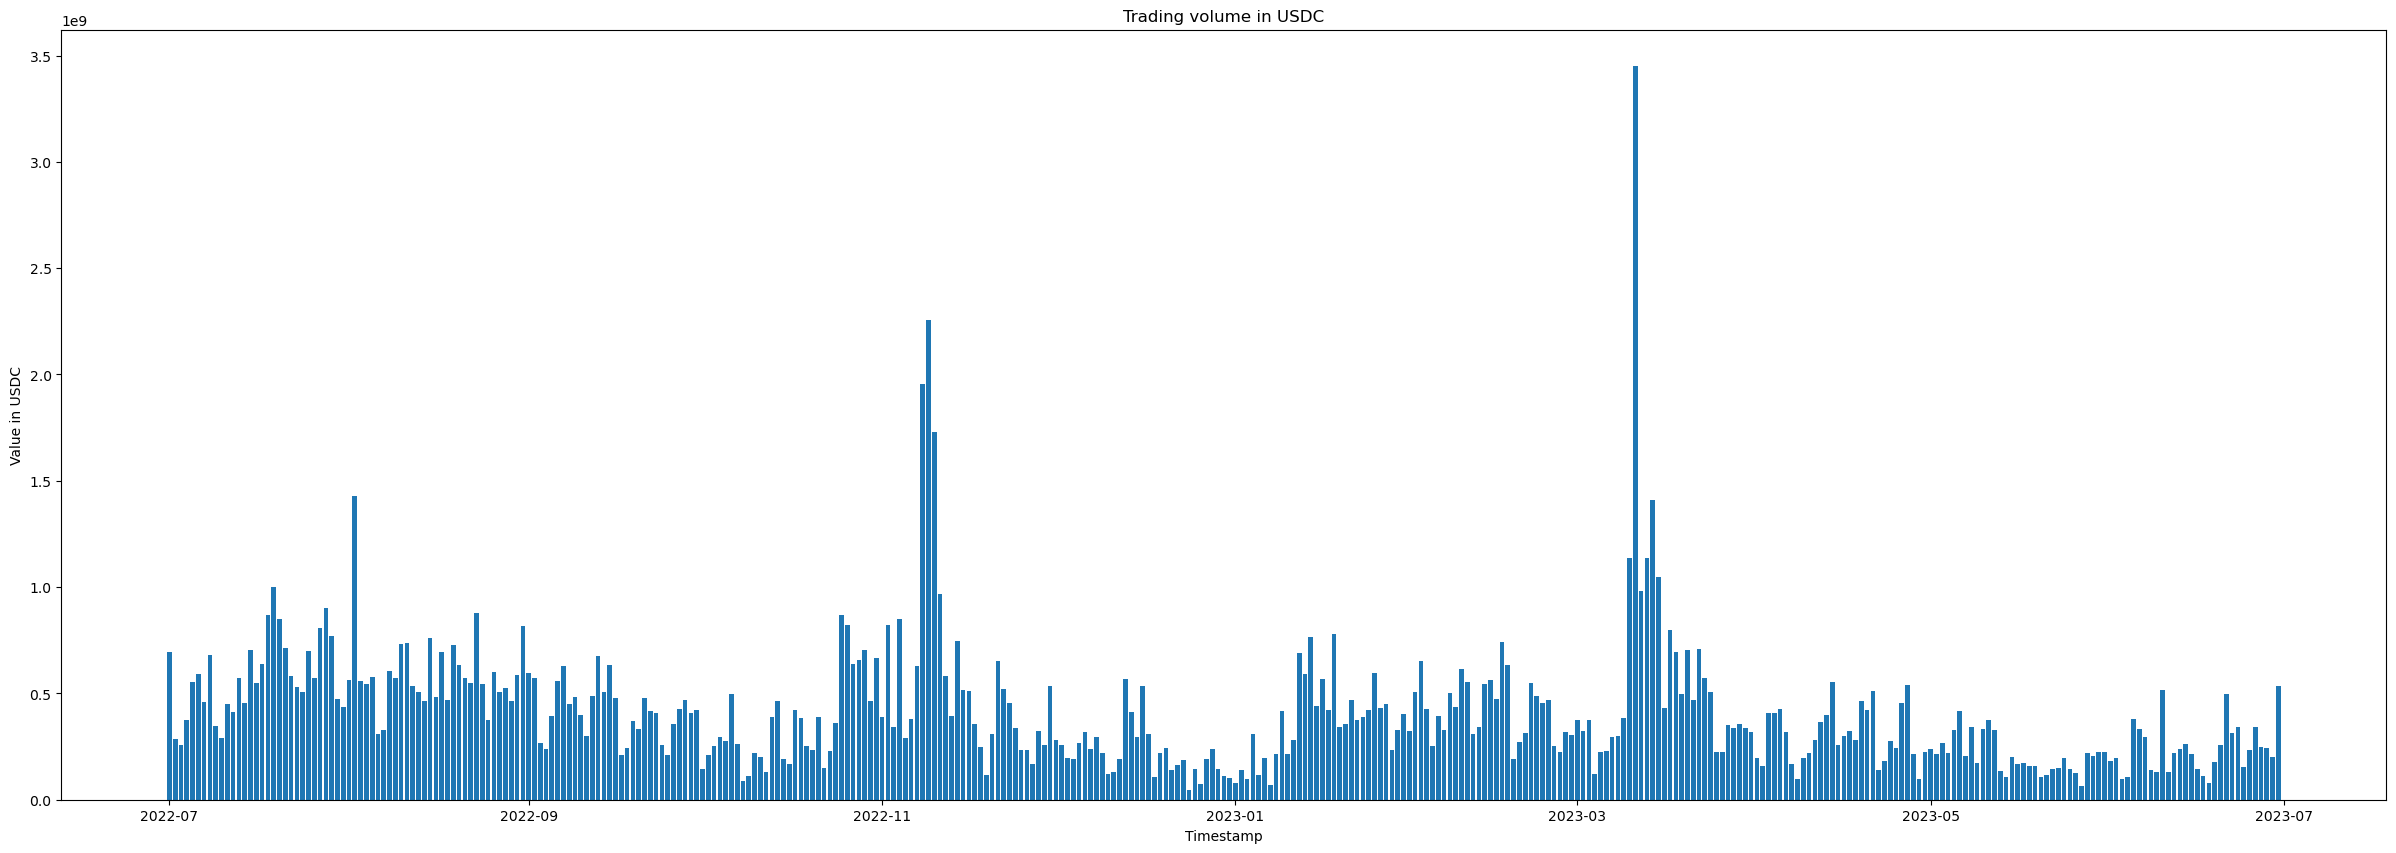

In [8]:
start_date, end_date = pd.Timestamp(2022,7,1), pd.Timestamp(2023,7,1)
stress_mask = (contract.timestamp <= end_date) & (contract.timestamp >= start_date)
contract_stressed_volume = contract[stress_mask][['timestamp','amount0', 'amount1']]
contract_stressed_volume['Day'] = contract_stressed_volume.timestamp.dt.floor('1d')
contract_stressed_volume['amount0'] = abs(contract_stressed_volume['amount0'])
contract_stressed_volume['amount1'] = abs(contract_stressed_volume['amount1'])
contract_stressed_volume = contract_stressed_volume[['amount0','amount1','Day']].groupby('Day').sum().reset_index()

plt.figure(figsize=(30,10))
plt.bar(contract_stressed_volume.Day, contract_stressed_volume.amount0)
plt.title('Trading volume in USDC')
plt.xlabel('Timestamp')
plt.ylabel('Value in USDC')
plt.show()

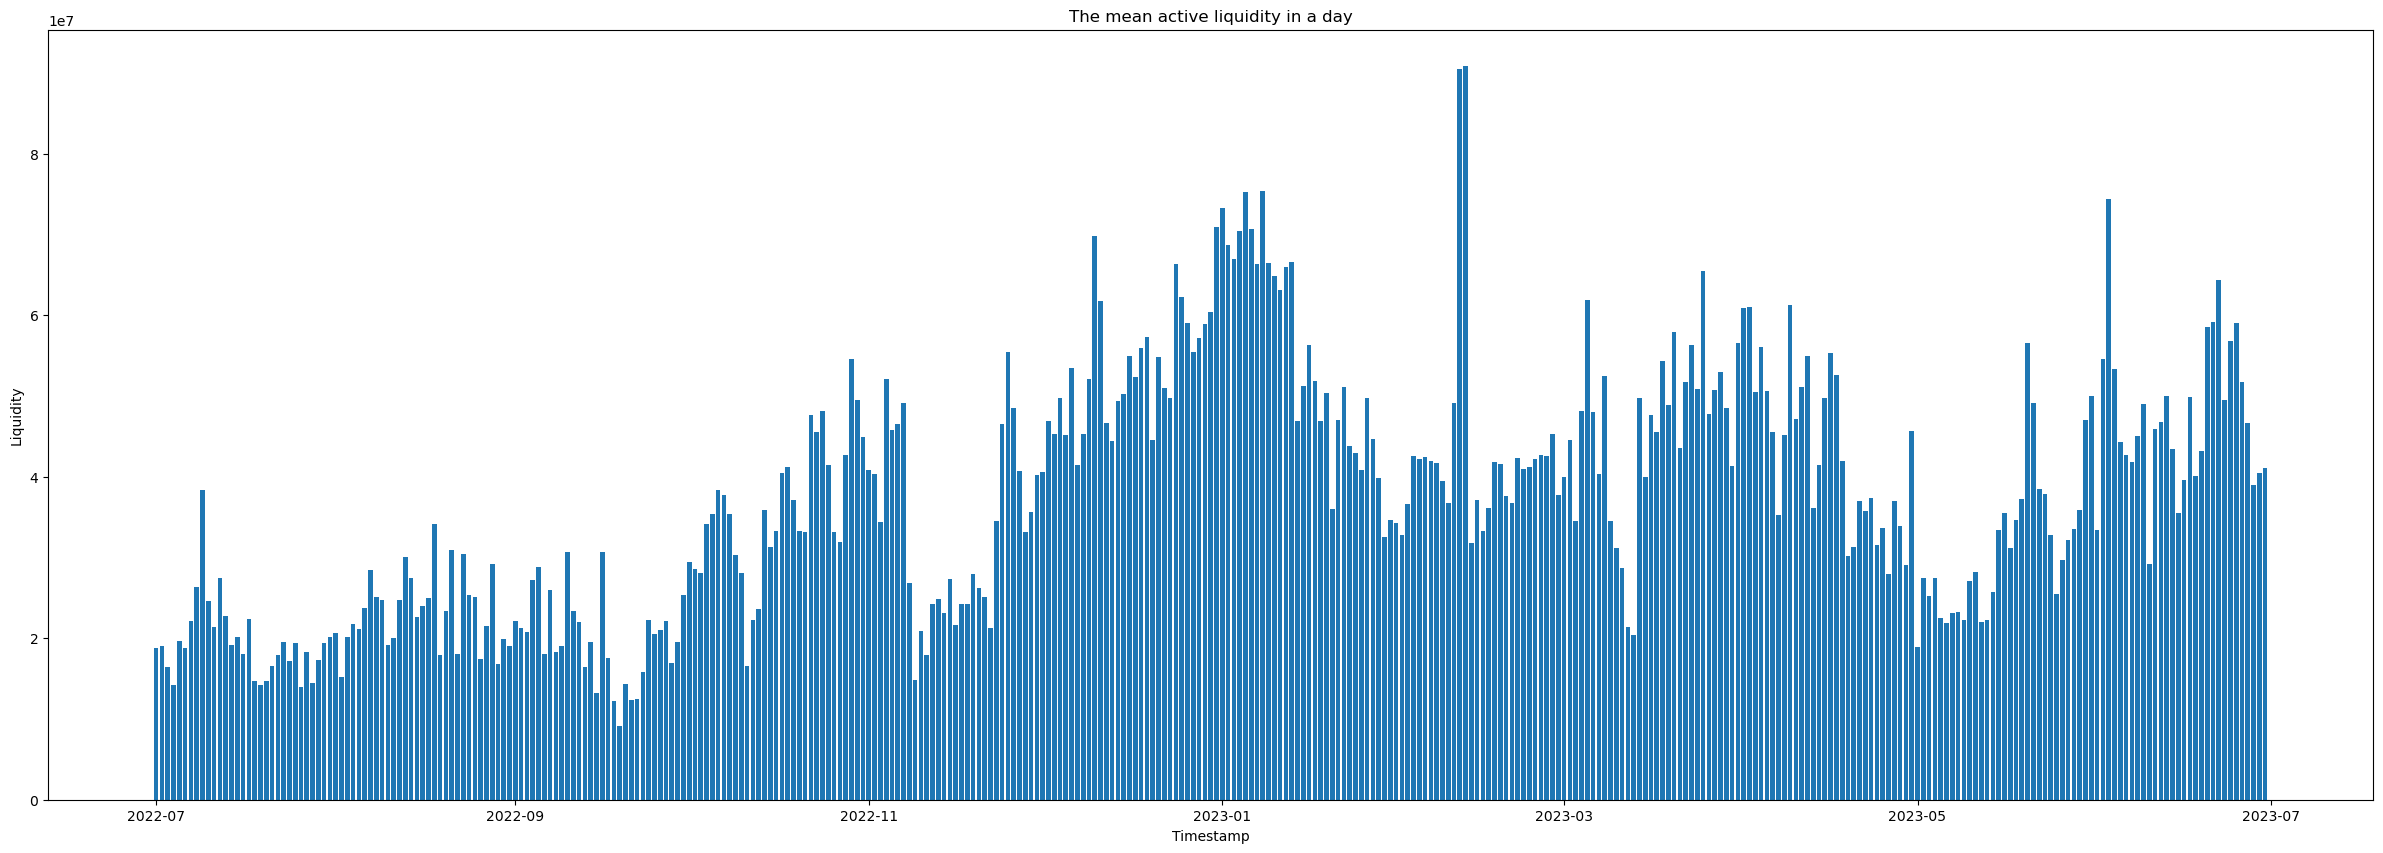

In [9]:
start_date, end_date = pd.Timestamp(2022,7,1), pd.Timestamp(2023,7,1)
stress_mask = (contract.timestamp <= end_date) & (contract.timestamp >= start_date)
contract_stressed_volume = contract[stress_mask][['timestamp','liquidity']]
contract_stressed_volume['Day'] = contract_stressed_volume.timestamp.dt.floor('1d')
contract_stressed_volume['liquidity'] = abs(contract_stressed_volume['liquidity'].astype(float)/(10**12))
contract_stressed_volume = contract_stressed_volume[['liquidity','Day']].groupby('Day').mean().reset_index()

plt.figure(figsize=(30,10))
plt.bar(contract_stressed_volume.Day, contract_stressed_volume.liquidity)
plt.title('The mean active liquidity in a day')
plt.xlabel('Timestamp')
plt.ylabel('Liquidity')
plt.show()

In [64]:
start_date, end_date = pd.Timestamp(2022,7,1), pd.Timestamp(2023,7,1)
stress_mask = (contract.timestamp <= end_date) & (contract.timestamp >= start_date)
contract_stressed_volume = contract[stress_mask][['timestamp','price']]
print(f"Average Impact:{abs(np.exp(np.log(contract_stressed_volume.price).diff())-1).mean()}, Std:{abs(np.exp(np.log(contract_stressed_volume.price).diff())-1).std()}")


Average Impact:0.00014751370848858445, Std:0.0006945720069140136


In [59]:
start_date, end_date = pd.Timestamp(2022,7,1), pd.Timestamp(2023,7,1)
stress_mask = (contract.timestamp <= end_date) & (contract.timestamp >= start_date)
contract_stressed_volume = contract[stress_mask][['timestamp']]
contract_stressed_volume['Swap Count'] = 1
contract_stressed_volume['minute'] = contract_stressed_volume.timestamp.dt.floor('1min')
contract_stressed_volume = contract_stressed_volume[['Swap Count','minute']].groupby('minute').count().reset_index()

In [61]:
contract_stressed_volume['Swap Count'].mean(), contract_stressed_volume['Swap Count'].std()

(5.469216180927679, 3.8828603925286322)

Aggregate data to daily

In [313]:
contract_stressed['Day'] = contract_stressed.timestamp.dt.date
daily_contract_stressed = contract_stressed.groupby('Day').aggregate(lambda x: x.iloc[-1]).reset_index() #closing price
daily_contract_stressed['log_returns'] = np.log(daily_contract_stressed['price']).diff()

## Comparison between contract and market prices

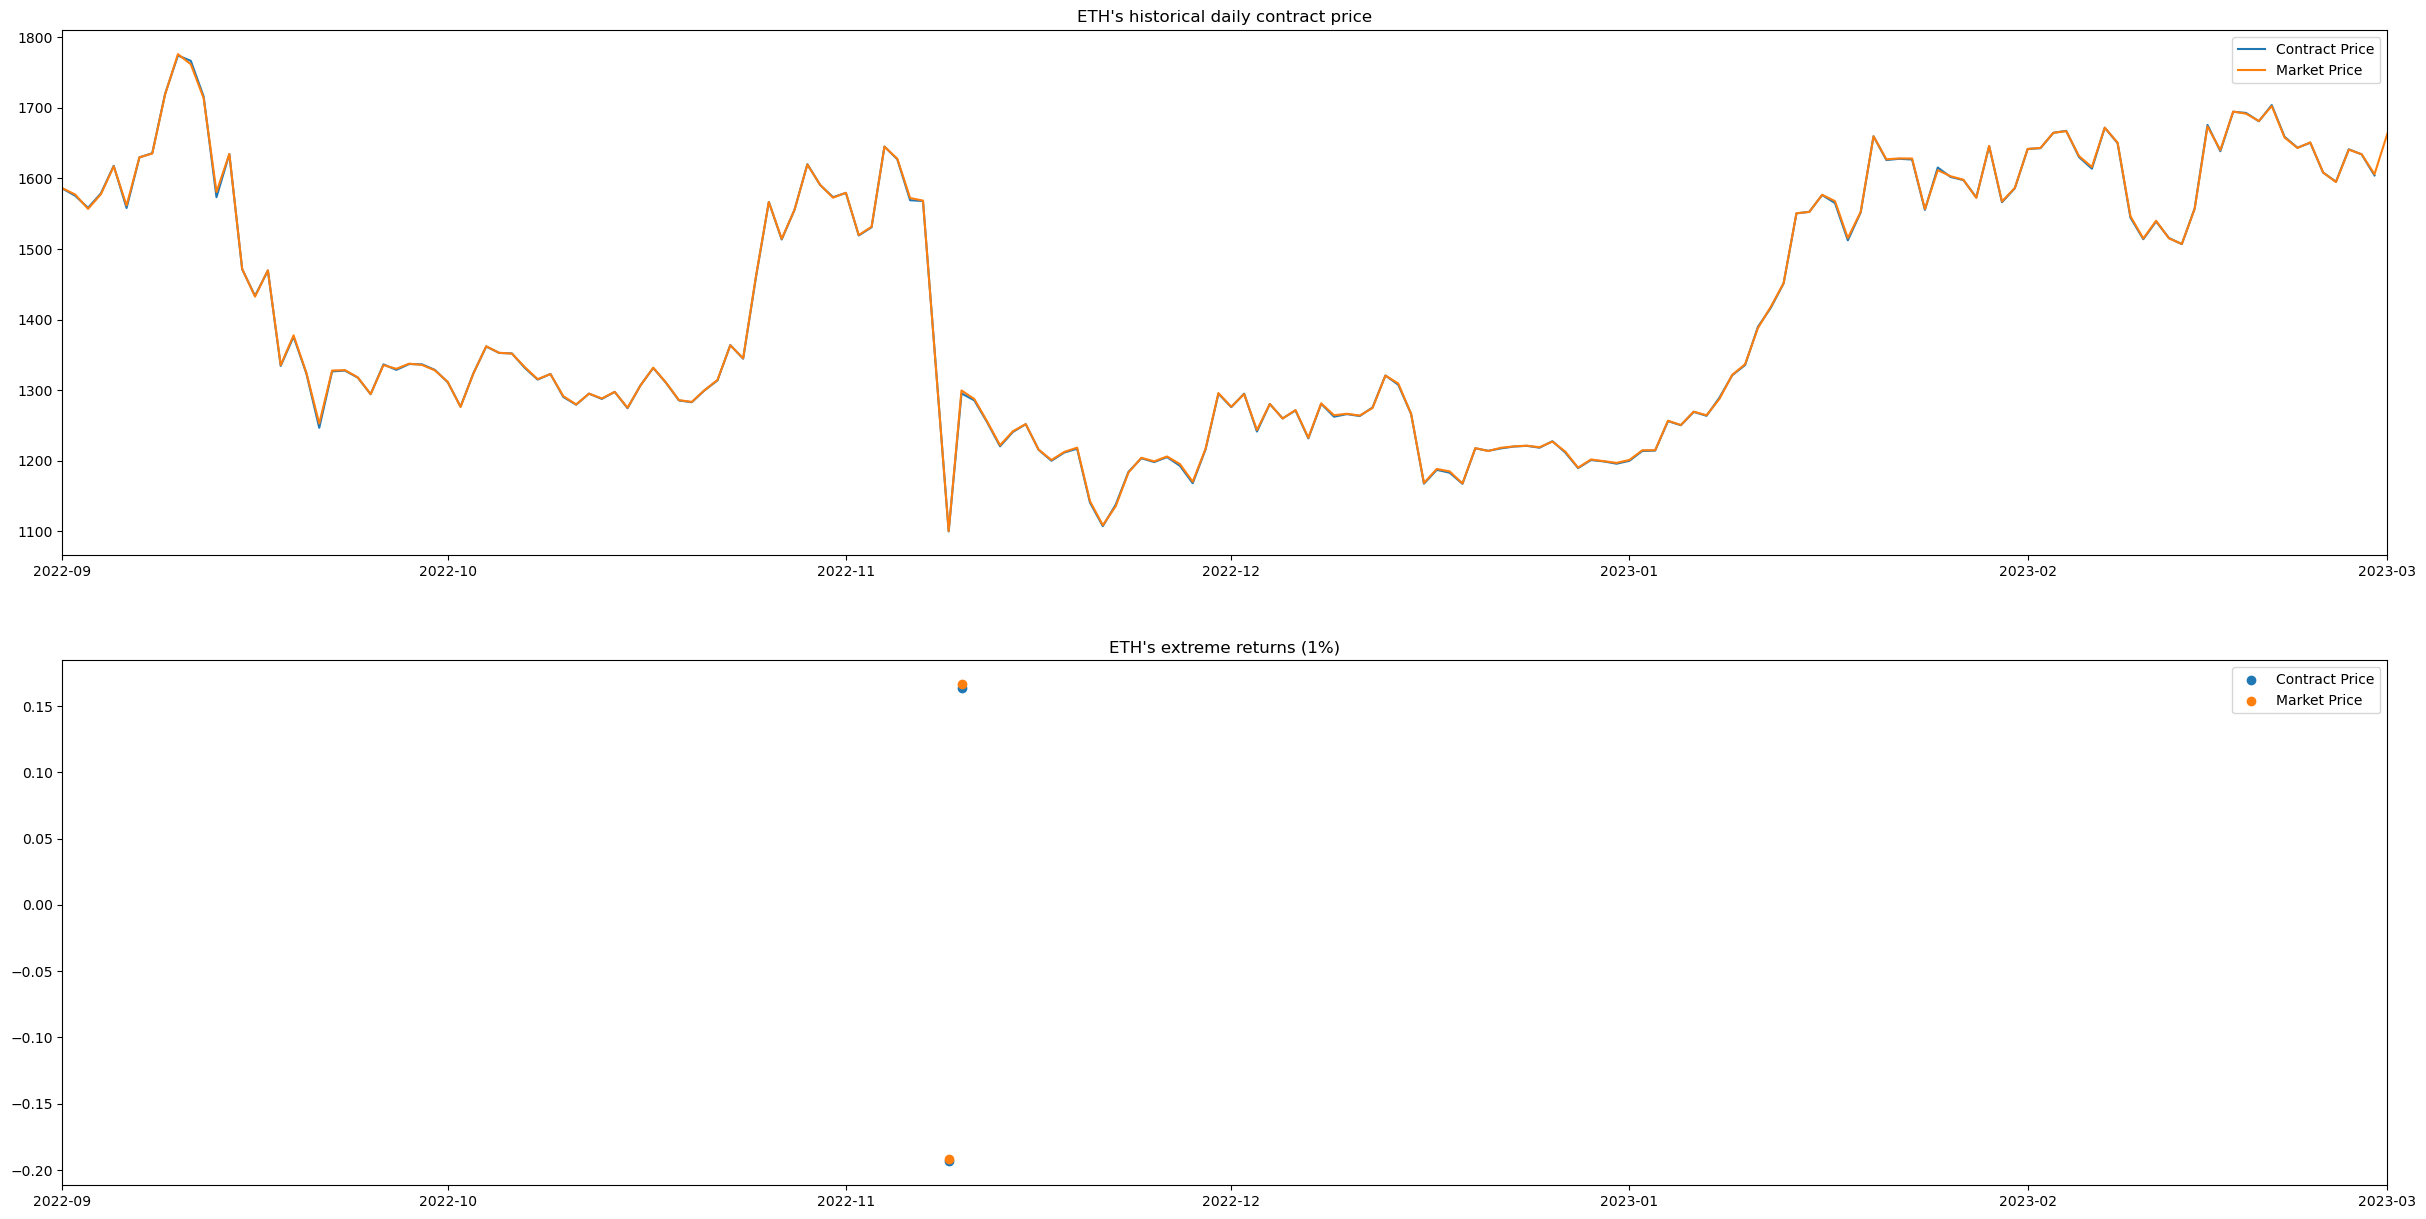

In [314]:
start_date, end_date = pd.Timestamp(2022,9,1), pd.Timestamp(2023,3,1)
daily_stress_extreme_mask = (daily_contract_stressed.log_returns <= daily_contract_stressed.log_returns.quantile(0.005)) | (daily_contract_stressed.log_returns >= daily_contract_stressed.log_returns.quantile(0.995))
fig, axs = plt.subplots(2, figsize=(30, 15))
axs[0].plot(daily_contract_stressed['timestamp'].dt.date,daily_contract_stressed['price'], label = 'Contract Price')
axs[0].plot(market[ftx_mask]['Date'],market[ftx_mask]['Adj Close'], label = 'Market Price')
#axs[0].plot(timedelta(1)+market[ftx_mask]['Date'],market[ftx_mask]['Adj Close'], label = 'Market Price')
axs[0].legend()
axs[0].set_title("ETH's historical daily contract price")
axs[0].set_xlim(start_date,end_date)
axs[1].scatter(pd.to_datetime(daily_contract_stressed[daily_stress_extreme_mask]['timestamp'].dt.date),daily_contract_stressed[daily_stress_extreme_mask]['log_returns'], label = 'Contract Price')
axs[1].scatter(pd.to_datetime(market[ftx_mask & extreme_mask]['Date']),market[ftx_mask & extreme_mask]['log_returns'], label = 'Market Price')
axs[1].set_title("ETH's extreme returns (1%)")
axs[1].legend()
axs[1].set_xlim(start_date,end_date)
plt.show()

### Liquidity Provision analysis

In [32]:
mints = pd.read_csv("../../historical_mints.csv")
burns = pd.read_csv("../../historical_burns.csv")
mints['timestamp'] = pd.to_datetime(mints['timestamp'])
burns['timestamp'] = pd.to_datetime(burns['timestamp'])

In [33]:
mints['Day'] = mints.timestamp.dt.date
burns['Day'] = burns.timestamp.dt.date
mints['liquidity'] = mints['liquidity'].astype(float)/(10**12)
burns['liquidity'] = burns['liquidity'].astype(float)/(10**12)

In [34]:
mints_count = mints[['Day']]
mints_count['count'] = 1
mints_count = mints_count.groupby('Day').count().reset_index()

burns_count = burns[['Day']]
burns_count['count'] = 1
burns_count = burns_count.groupby('Day').count().reset_index()

# Mints and Burns frequency

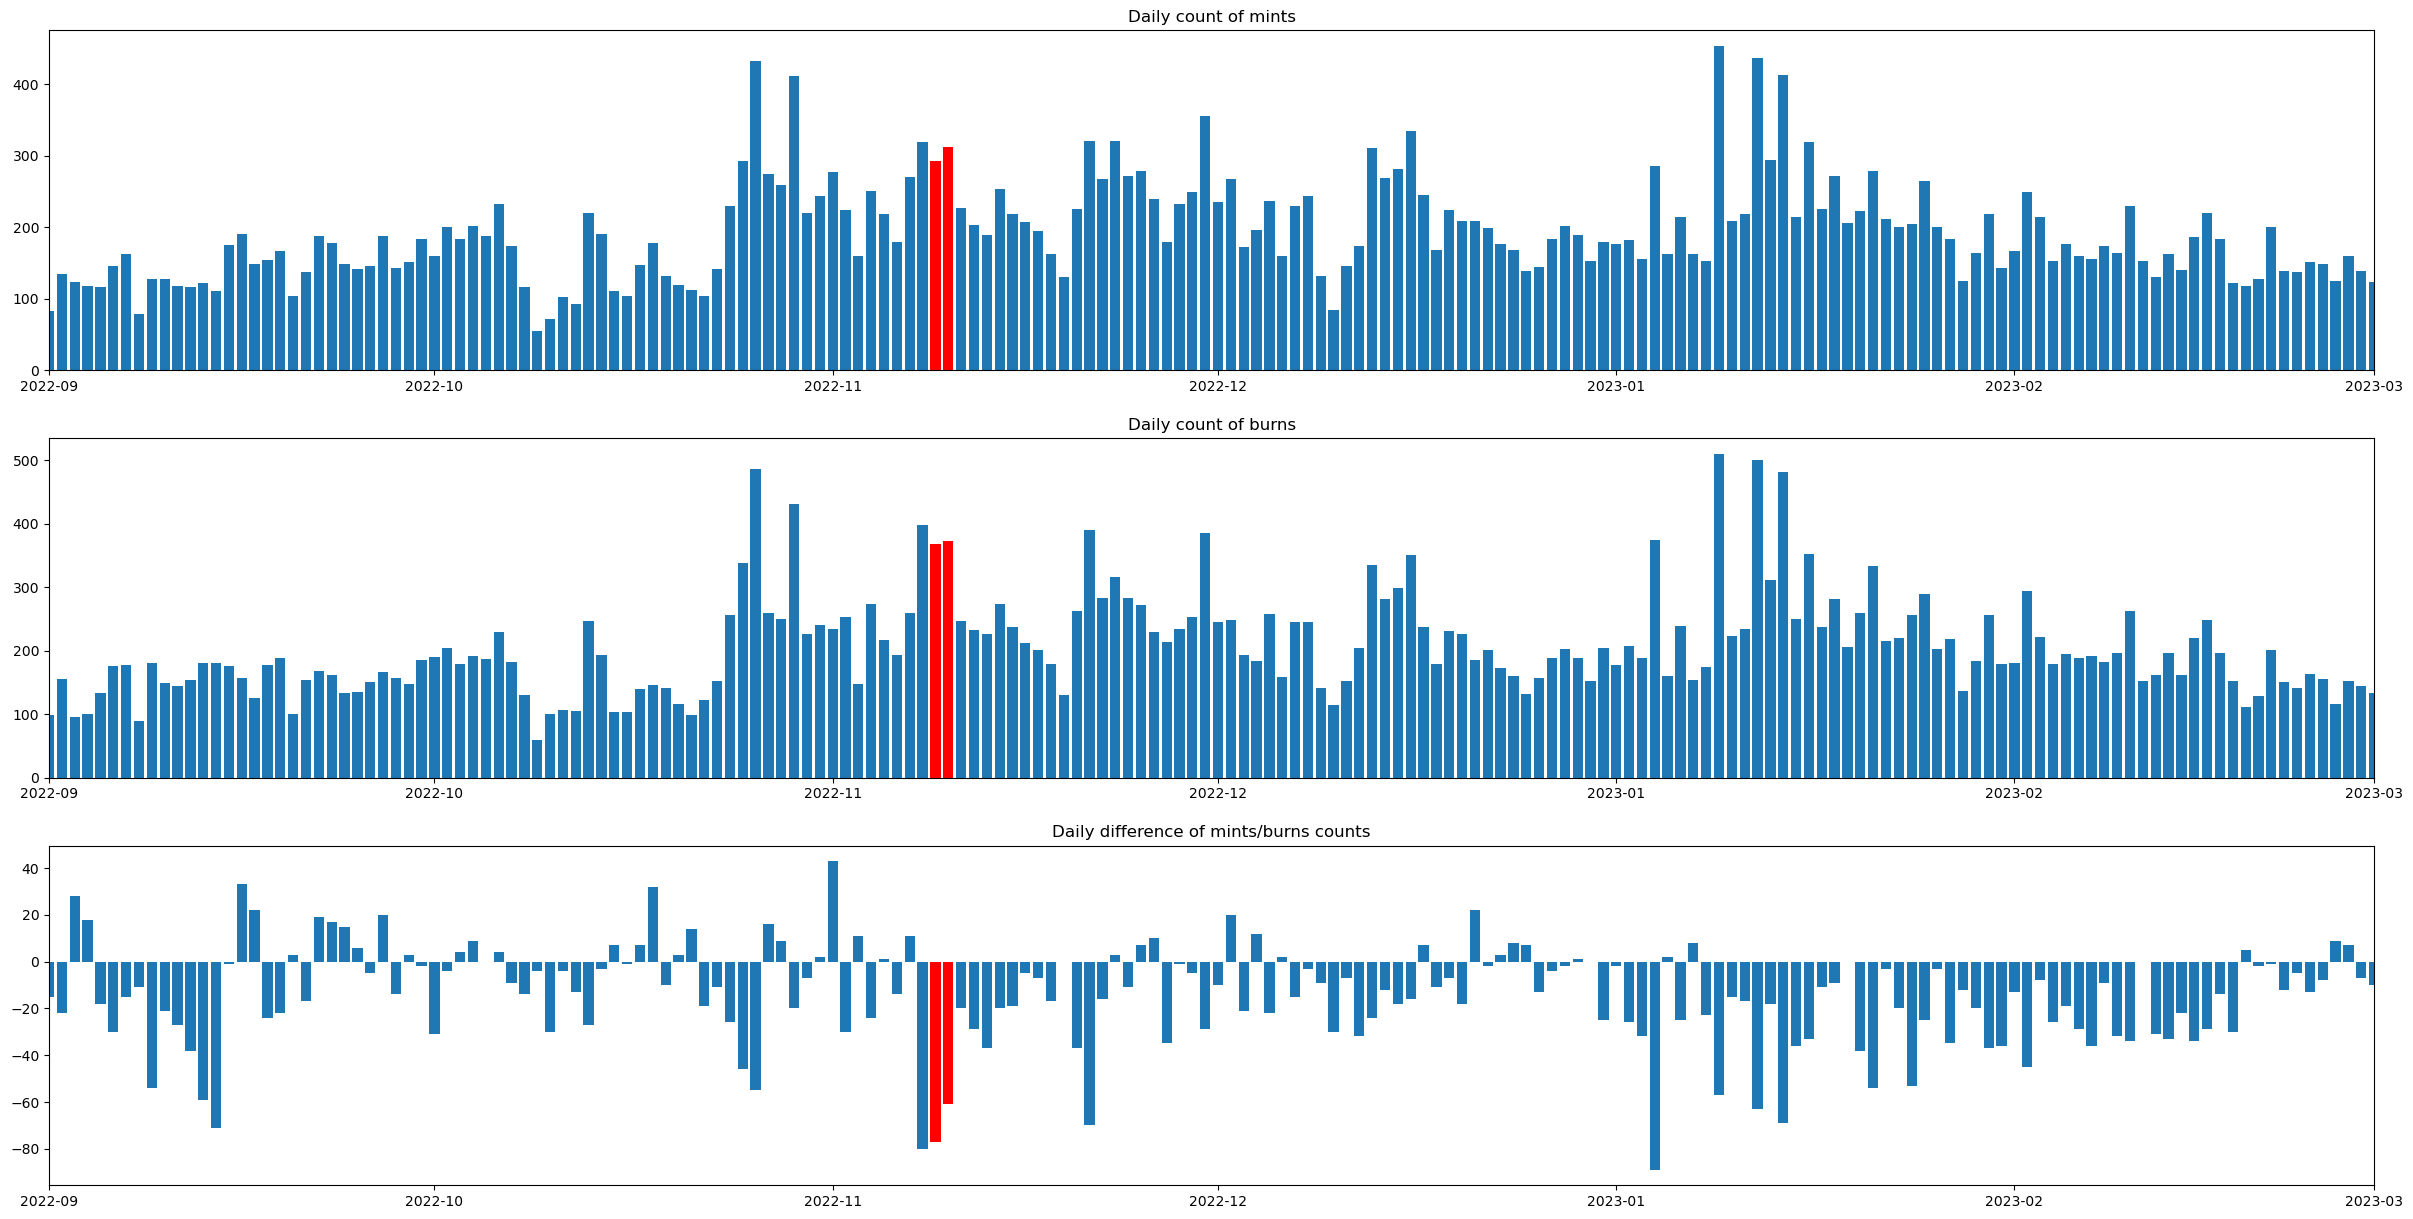

In [35]:
start_date, end_date = pd.Timestamp(2022,9,1), pd.Timestamp(2023,3,1)
mints_zoom_mask = (mints_count.Day <= end_date.date()) & (mints_count.Day >= start_date.date())
mints_count_zoomed = mints_count[mints_zoom_mask]

burns_zoom_mask = (burns_count.Day <= end_date.date()) & (burns_count.Day >= start_date.date())
burns_count_zoomed = burns_count[burns_zoom_mask]

fig, axs = plt.subplots(3, figsize=(30, 15))
axs[0].bar(mints_count_zoomed['Day'], mints_count_zoomed['count'])
axs[0].bar(mints_count_zoomed[mints_count_zoomed['Day'] == date(2022,11,9)]['Day'], mints_count_zoomed[mints_count_zoomed['Day'] == date(2022,11,9)]['count'], color='red')
axs[0].bar(mints_count_zoomed[mints_count_zoomed['Day'] == date(2022,11,10)]['Day'], mints_count_zoomed[mints_count_zoomed['Day'] == date(2022,11,10)]['count'], color='red')
axs[0].set_title("Daily count of mints")
axs[0].set_xlim(start_date,end_date)
axs[1].bar(burns_count_zoomed['Day'], burns_count_zoomed['count'])
axs[1].bar(burns_count_zoomed[burns_count_zoomed['Day'] == date(2022,11,9)]['Day'], burns_count_zoomed[burns_count_zoomed['Day'] == date(2022,11,9)]['count'], color='red')
axs[1].bar(burns_count_zoomed[burns_count_zoomed['Day'] == date(2022,11,10)]['Day'], burns_count_zoomed[burns_count_zoomed['Day'] == date(2022,11,10)]['count'], color='red')
axs[1].set_title("Daily count of burns")
axs[1].set_xlim(start_date,end_date)
axs[2].bar(burns_count_zoomed['Day'], mints_count_zoomed['count'] - burns_count_zoomed['count'])
axs[2].bar(burns_count_zoomed[burns_count_zoomed['Day'] == date(2022,11,9)]['Day'], mints_count_zoomed[mints_count_zoomed['Day'] == date(2022,11,9)]['count'] - burns_count_zoomed[burns_count_zoomed['Day'] == date(2022,11,9)]['count'], color='red')
axs[2].bar(burns_count_zoomed[burns_count_zoomed['Day'] == date(2022,11,10)]['Day'], mints_count_zoomed[mints_count_zoomed['Day'] == date(2022,11,10)]['count'] - burns_count_zoomed[burns_count_zoomed['Day'] == date(2022,11,10)]['count'],color='red')
axs[2].set_title("Daily difference of mints/burns counts")
axs[2].set_xlim(start_date,end_date)
plt.show()

In [36]:
mints_volume = mints[['Day','liquidity']]
mints_volume = mints_volume.groupby('Day').sum().reset_index()

burns_volume = burns[['Day','liquidity']]
burns_volume = burns_volume.groupby('Day').sum().reset_index()

# Mints and Burns volume

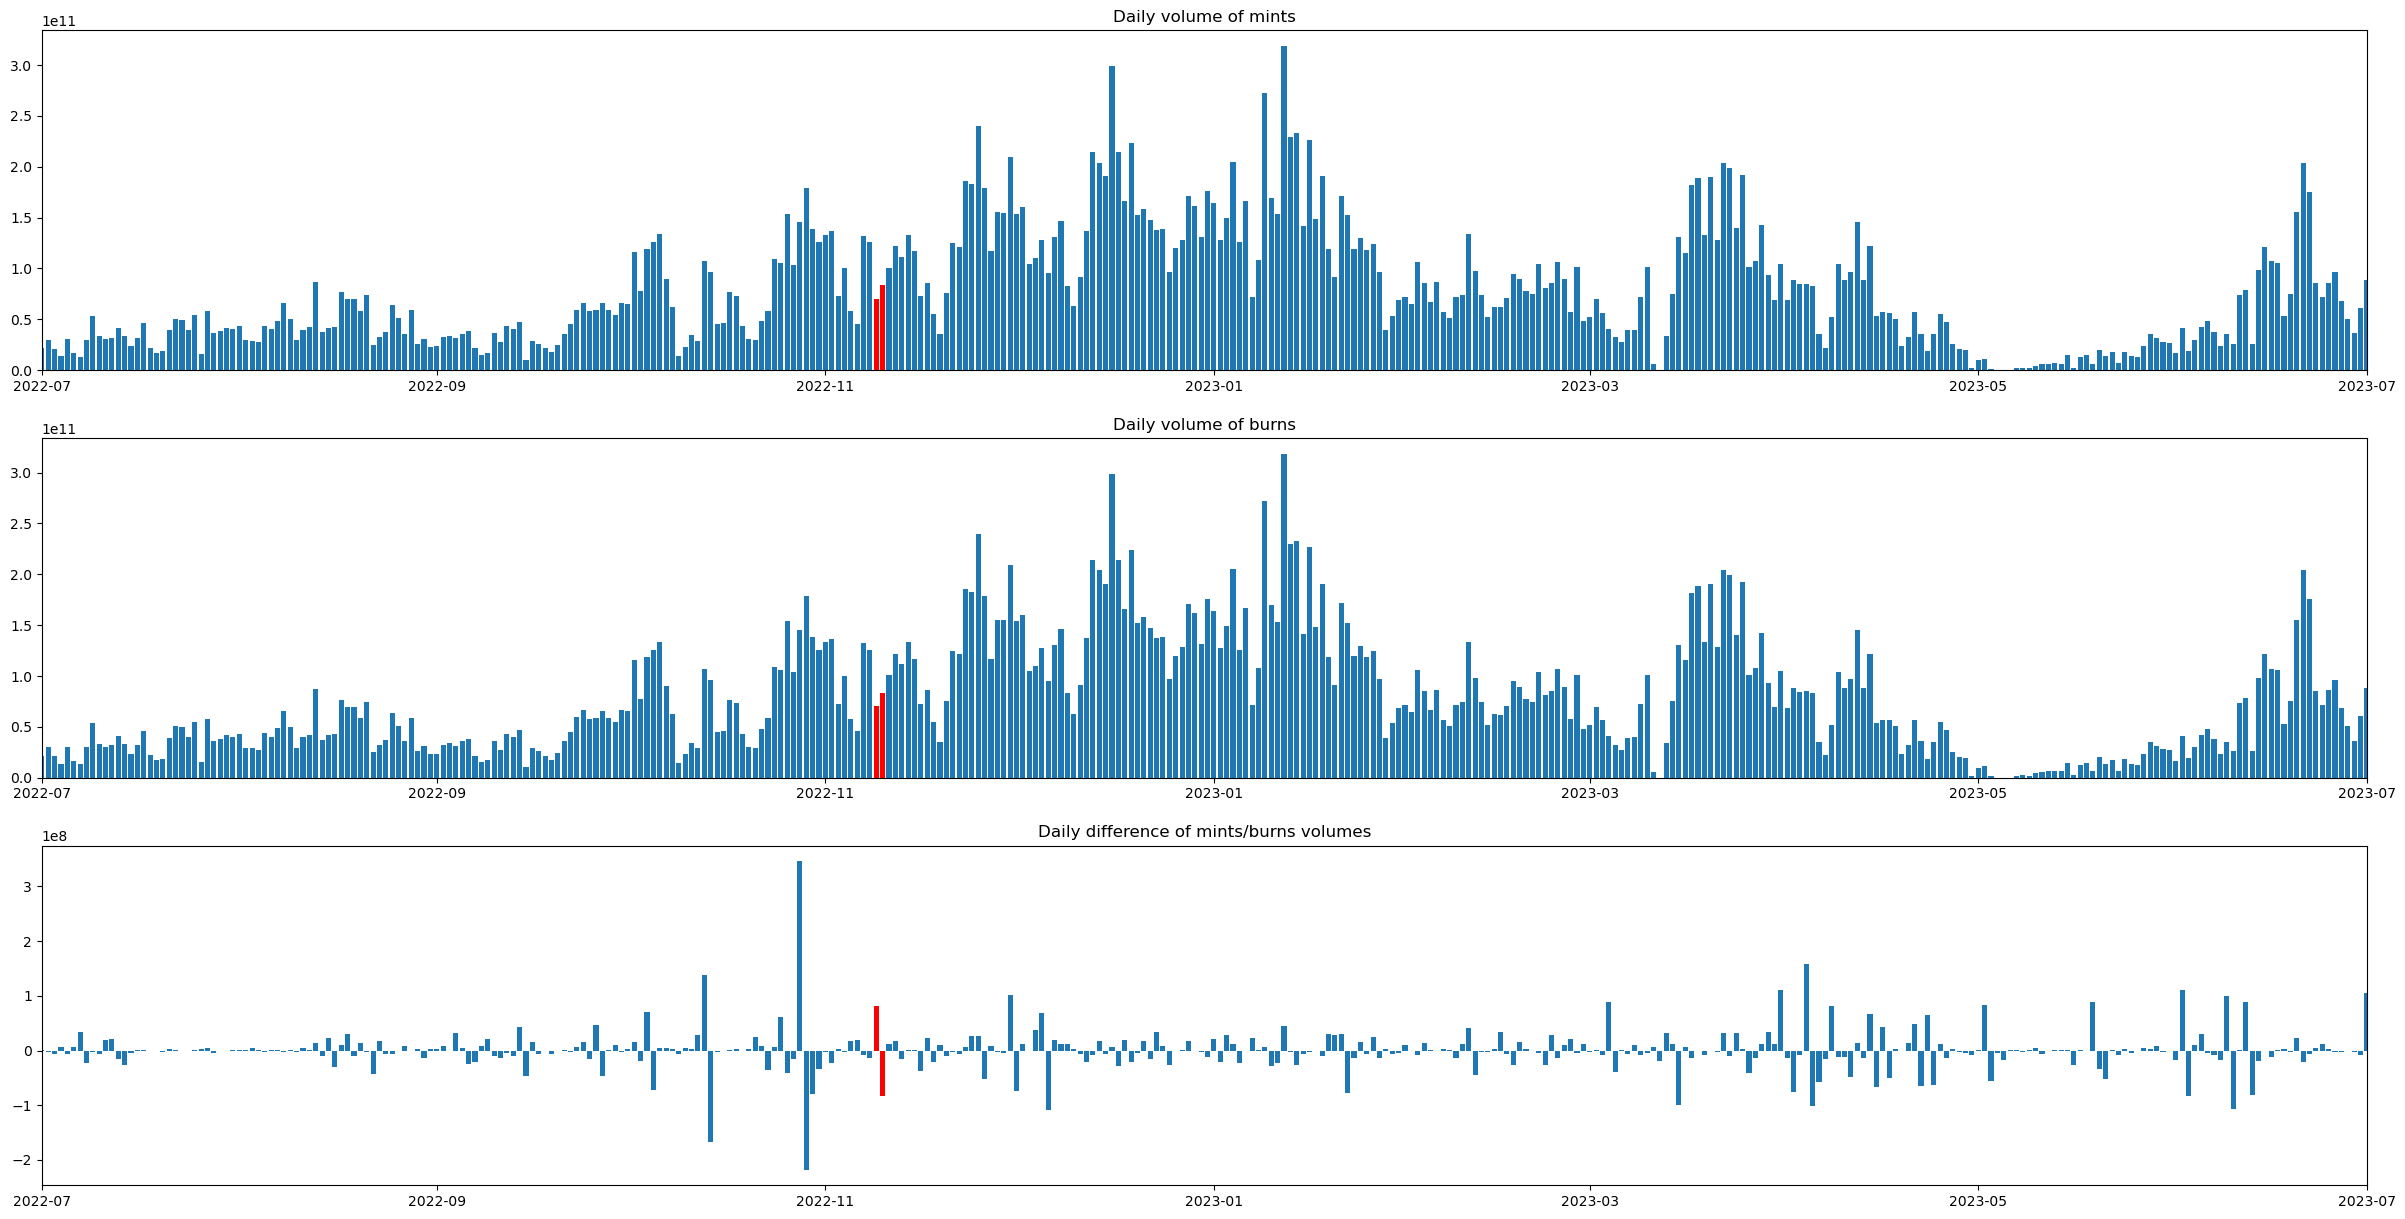

In [37]:
start_date, end_date = pd.Timestamp(2022,7,1), pd.Timestamp(2023,7,1)
mints_zoom_mask = (mints_volume.Day <= end_date.date()) & (mints_volume.Day >= start_date.date())
mints_volume_zoomed = mints_volume[mints_zoom_mask]

burns_zoom_mask = (burns_volume.Day <= end_date.date()) & (burns_volume.Day >= start_date.date())
burns_volume_zoomed = burns_volume[burns_zoom_mask]

fig, axs = plt.subplots(3, figsize=(30, 15))
axs[0].bar(mints_volume_zoomed['Day'], mints_volume_zoomed['liquidity'])
axs[0].bar(mints_volume_zoomed[mints_volume_zoomed['Day'] == date(2022,11,9)]['Day'], mints_volume_zoomed[mints_volume_zoomed['Day'] == date(2022,11,9)]['liquidity'], color='red')
axs[0].bar(mints_volume_zoomed[mints_volume_zoomed['Day'] == date(2022,11,10)]['Day'], mints_volume_zoomed[mints_volume_zoomed['Day'] == date(2022,11,10)]['liquidity'], color='red')
axs[0].set_title("Daily volume of mints")
axs[0].set_xlim(start_date,end_date)
axs[1].bar(burns_volume_zoomed['Day'], burns_volume_zoomed['liquidity'])
axs[1].bar(burns_volume_zoomed[burns_volume_zoomed['Day'] == date(2022,11,9)]['Day'], burns_volume_zoomed[burns_volume_zoomed['Day'] == date(2022,11,9)]['liquidity'], color='red')
axs[1].bar(burns_volume_zoomed[burns_volume_zoomed['Day'] == date(2022,11,10)]['Day'], burns_volume_zoomed[burns_volume_zoomed['Day'] == date(2022,11,10)]['liquidity'], color='red')
axs[1].set_title("Daily volume of burns")
axs[1].set_xlim(start_date,end_date)
axs[2].bar(burns_volume_zoomed['Day'], mints_volume_zoomed['liquidity'] - burns_volume_zoomed['liquidity'])
axs[2].bar(burns_volume_zoomed[burns_volume_zoomed['Day'] == date(2022,11,9)]['Day'], mints_volume_zoomed[mints_volume_zoomed['Day'] == date(2022,11,9)]['liquidity'] - burns_volume_zoomed[burns_volume_zoomed['Day'] == date(2022,11,9)]['liquidity'], color='red')
axs[2].bar(burns_volume_zoomed[burns_volume_zoomed['Day'] == date(2022,11,10)]['Day'], mints_volume_zoomed[mints_volume_zoomed['Day'] == date(2022,11,10)]['liquidity'] - burns_volume_zoomed[burns_volume_zoomed['Day'] == date(2022,11,10)]['liquidity'],color='red')
axs[2].set_title("Daily difference of mints/burns volumes")
axs[2].set_xlim(start_date,end_date)
plt.show()

# Mints and Burns' widths

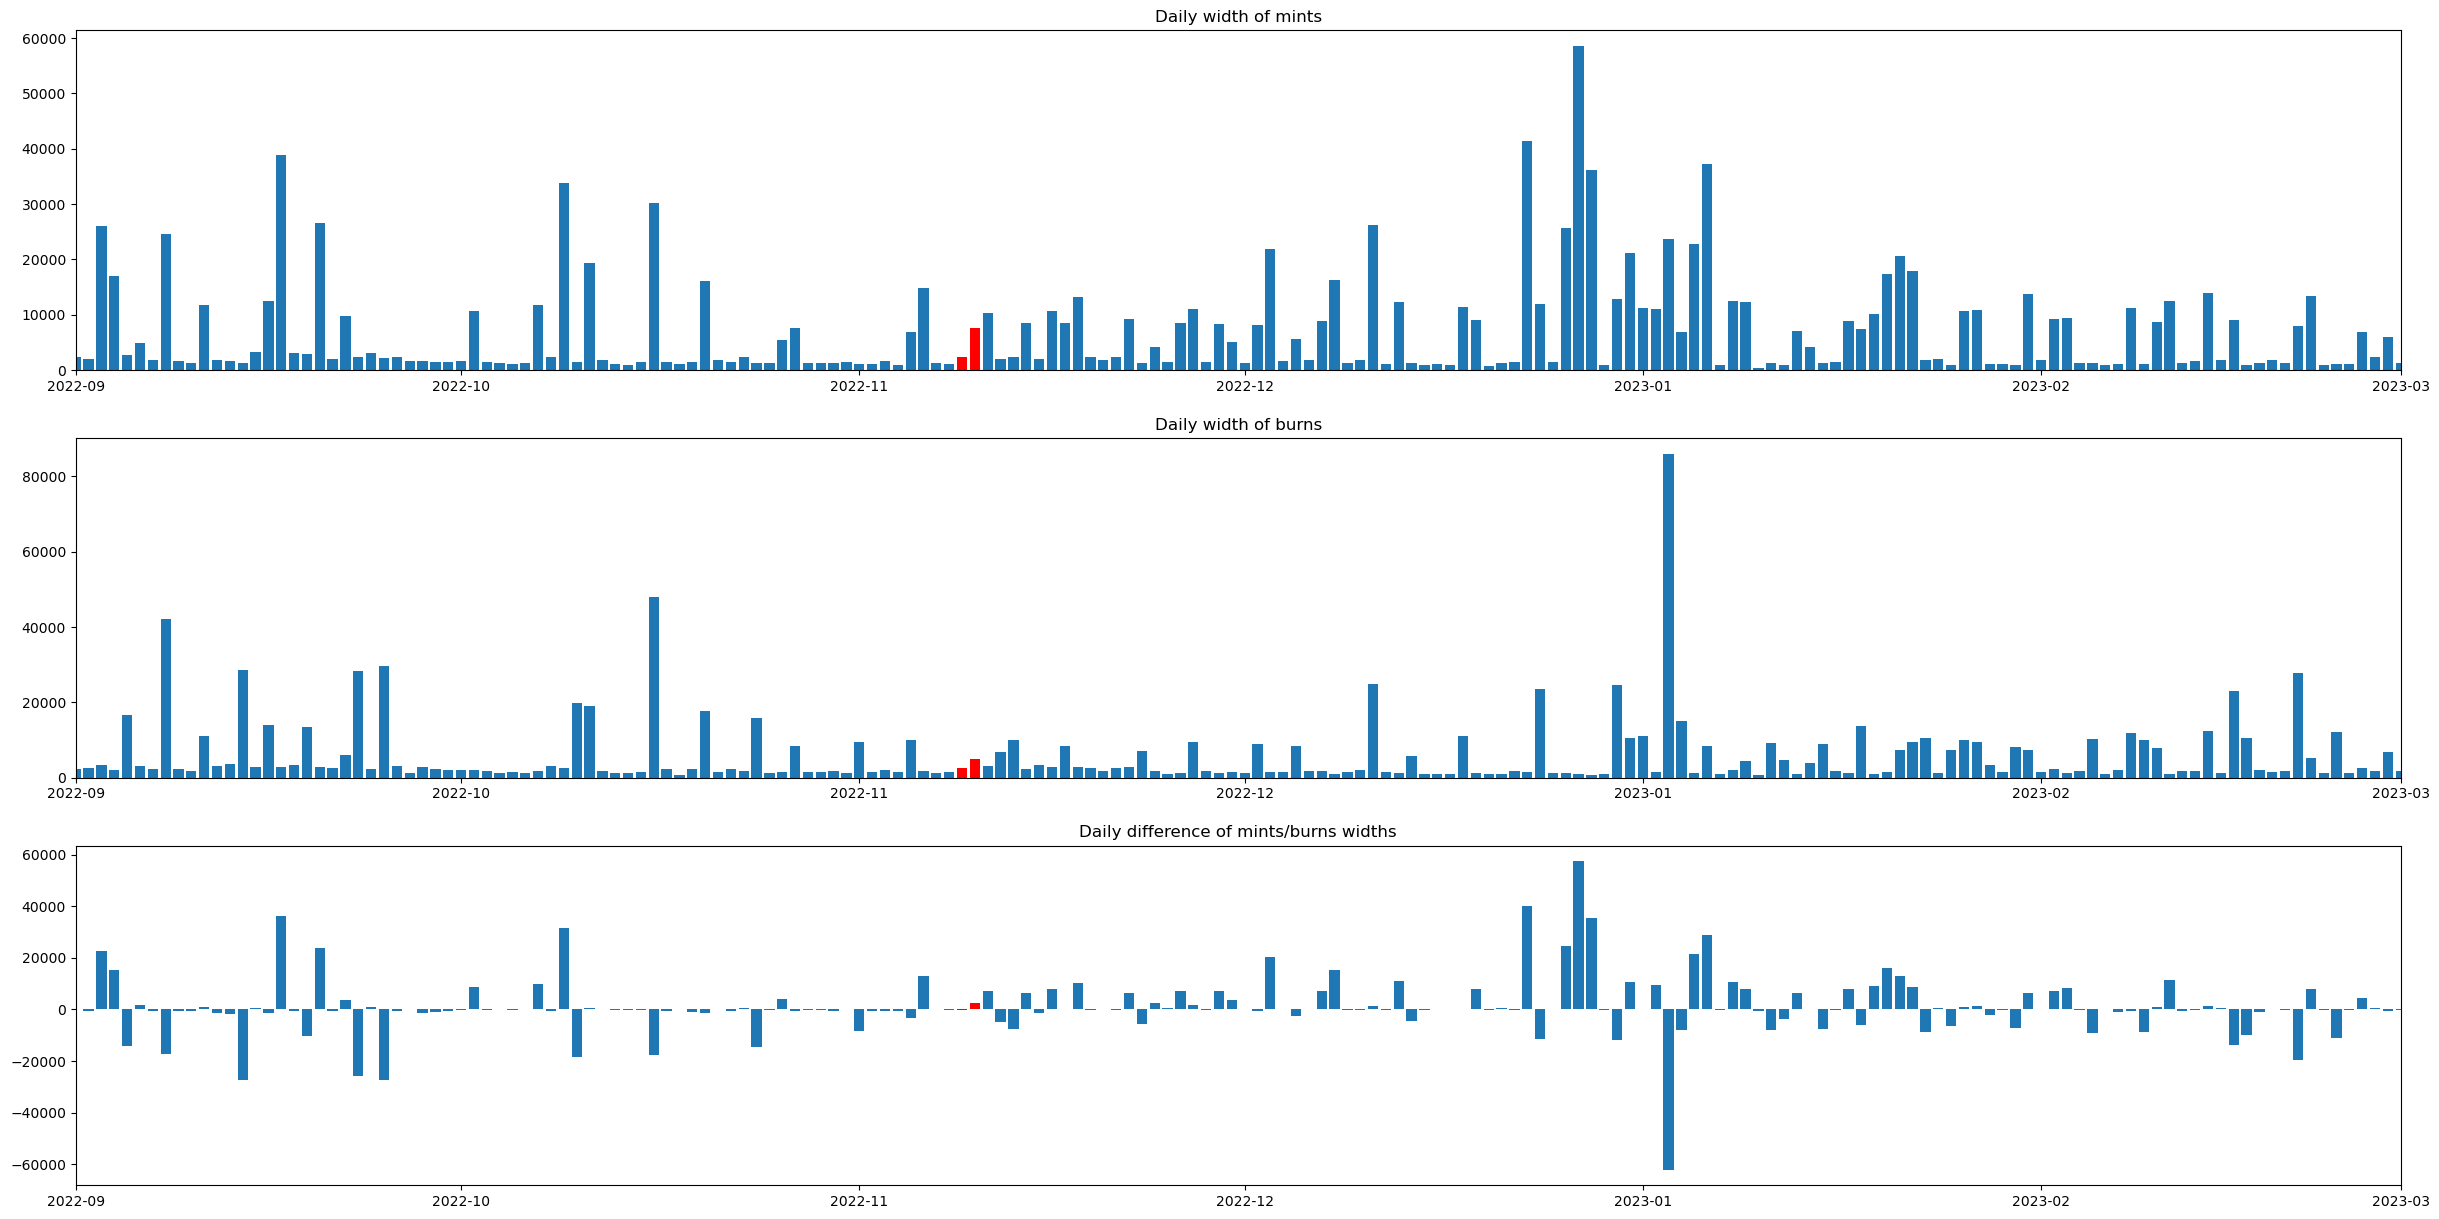

In [38]:
mints_width = mints[['Day','tickLower','tickUpper']]
mints_width['width'] = mints.tickUpper - mints.tickLower
mints_width = mints_width.groupby('Day').mean().reset_index()

burns_width = burns[['Day','tickLower','tickUpper']]
burns_width['width'] = burns.tickUpper - burns.tickLower
burns_width = burns_width.groupby('Day').mean().reset_index()

start_date, end_date = pd.Timestamp(2022,9,1), pd.Timestamp(2023,3,1)
mints_zoom_mask = (mints_width.Day <= end_date.date()) & (mints_width.Day >= start_date.date())
mints_width_zoomed = mints_width[mints_zoom_mask]

burns_zoom_mask = (burns_width.Day <= end_date.date()) & (burns_width.Day >= start_date.date())
burns_width_zoomed = burns_width[burns_zoom_mask]

fig, axs = plt.subplots(3, figsize=(30, 15))
axs[0].bar(mints_width_zoomed['Day'], mints_width_zoomed['width'])
axs[0].bar(mints_width_zoomed[mints_width_zoomed['Day'] == date(2022,11,9)]['Day'], mints_width_zoomed[mints_width_zoomed['Day'] == date(2022,11,9)]['width'], color='red')
axs[0].bar(mints_width_zoomed[mints_width_zoomed['Day'] == date(2022,11,10)]['Day'], mints_width_zoomed[mints_width_zoomed['Day'] == date(2022,11,10)]['width'], color='red')
axs[0].set_title("Daily width of mints")
axs[0].set_xlim(start_date,end_date)
axs[1].bar(burns_width_zoomed['Day'], burns_width_zoomed['width'])
axs[1].bar(burns_width_zoomed[burns_width_zoomed['Day'] == date(2022,11,9)]['Day'], burns_width_zoomed[burns_width_zoomed['Day'] == date(2022,11,9)]['width'], color='red')
axs[1].bar(burns_width_zoomed[burns_width_zoomed['Day'] == date(2022,11,10)]['Day'], burns_width_zoomed[burns_width_zoomed['Day'] == date(2022,11,10)]['width'], color='red')
axs[1].set_title("Daily width of burns")
axs[1].set_xlim(start_date,end_date)
axs[2].bar(burns_width_zoomed['Day'], mints_width_zoomed['width'] - burns_width_zoomed['width'])
axs[2].bar(burns_width_zoomed[burns_width_zoomed['Day'] == date(2022,11,9)]['Day'], mints_width_zoomed[mints_width_zoomed['Day'] == date(2022,11,9)]['width'] - burns_width_zoomed[burns_width_zoomed['Day'] == date(2022,11,9)]['width'], color='red')
axs[2].bar(burns_width_zoomed[burns_width_zoomed['Day'] == date(2022,11,10)]['Day'], mints_width_zoomed[mints_width_zoomed['Day'] == date(2022,11,10)]['width'] - burns_width_zoomed[burns_width_zoomed['Day'] == date(2022,11,10)]['width'],color='red')
axs[2].set_title("Daily difference of mints/burns widths")
axs[2].set_xlim(start_date,end_date)
plt.show()

## Ranking LPs by volume

In [322]:
start_date, end_date= pd.Timestamp(2022, 6, 1), pd.Timestamp(2024, 11, 15)
mints[(mints.Day <= end_date.date()) & (mints.Day >= start_date.date())][['owner','liquidity']].groupby('owner').sum().reset_index().sort_values(by='liquidity', ascending=False).iloc[:20]

owner     liquidity
53  0xC36442b4a4522E871399CD717aBDD847Ab11FE88  1.628007e+14
47  0xA69babEF1cA67A37Ffaf7a485DfFF3382056e78C  9.715607e+12
23  0x51C72848c68a965f66FA7a88855F9f7784502a7F  1.334307e+12
32  0x6b75d8AF000000e20B7a7DDf000Ba900b4009A80  1.199177e+11
21  0x5050e08626c499411B5D0E0b5AF0E83d3fD82EDF  1.894115e+10
1   0x0000Cd00001700b10049DfC947103E00E1C62683  2.056917e+09
2   0x0D3C2261747B2079f6aBD459642421A8087aead5  1.350518e+08
50  0xB0000000aa4f00aF1200C8B2BefB6300853F0069  9.777391e+07
0   0x000000d40B595B94918a28b27d1e2C66F43A51d3  7.529782e+07
15  0x3D6f08ae8C2931E27e95811E42F5d70164759a94  3.922935e+07
55  0xD1fDF0144be118C30a53E1d08Cc1E61d600E508e  7.960631e+06
38  0x86426AD2B71f41a5d545E5e2F63c76913D93E1A5  5.510052e+06
16  0x3bc1588f8D987C9ED07B3796AA50ccBF10514326  5.490122e+06
26  0x55781b86fA7123710791d21079f131D251213Aa6  3.823120e+06
25  0x5574C2C266ce1a5483e9ac926aE6e1253FC725Bd  3.103473e+06
3   0x0f7b93C7b855E667fe4AE29F45D473803727EA98  2.338204e+06
37  0x7CAEC5E4a3906d0919895d113F7Ed9b3a0cbf826  1.673675e+06
42  0x9683D433621A83aA7dd290106e1da85251317F55  1.611076e+06
7   0x2D83E353C83bC5A2F34fA88D82cF8A98987c9f2F  1.374858e+06
4   0x13704DF51DceA93524c6811E60abdA47554eb703  1.060477e+06

# Amounts of Tokens Minted and Burned by LPs excluding the top 4

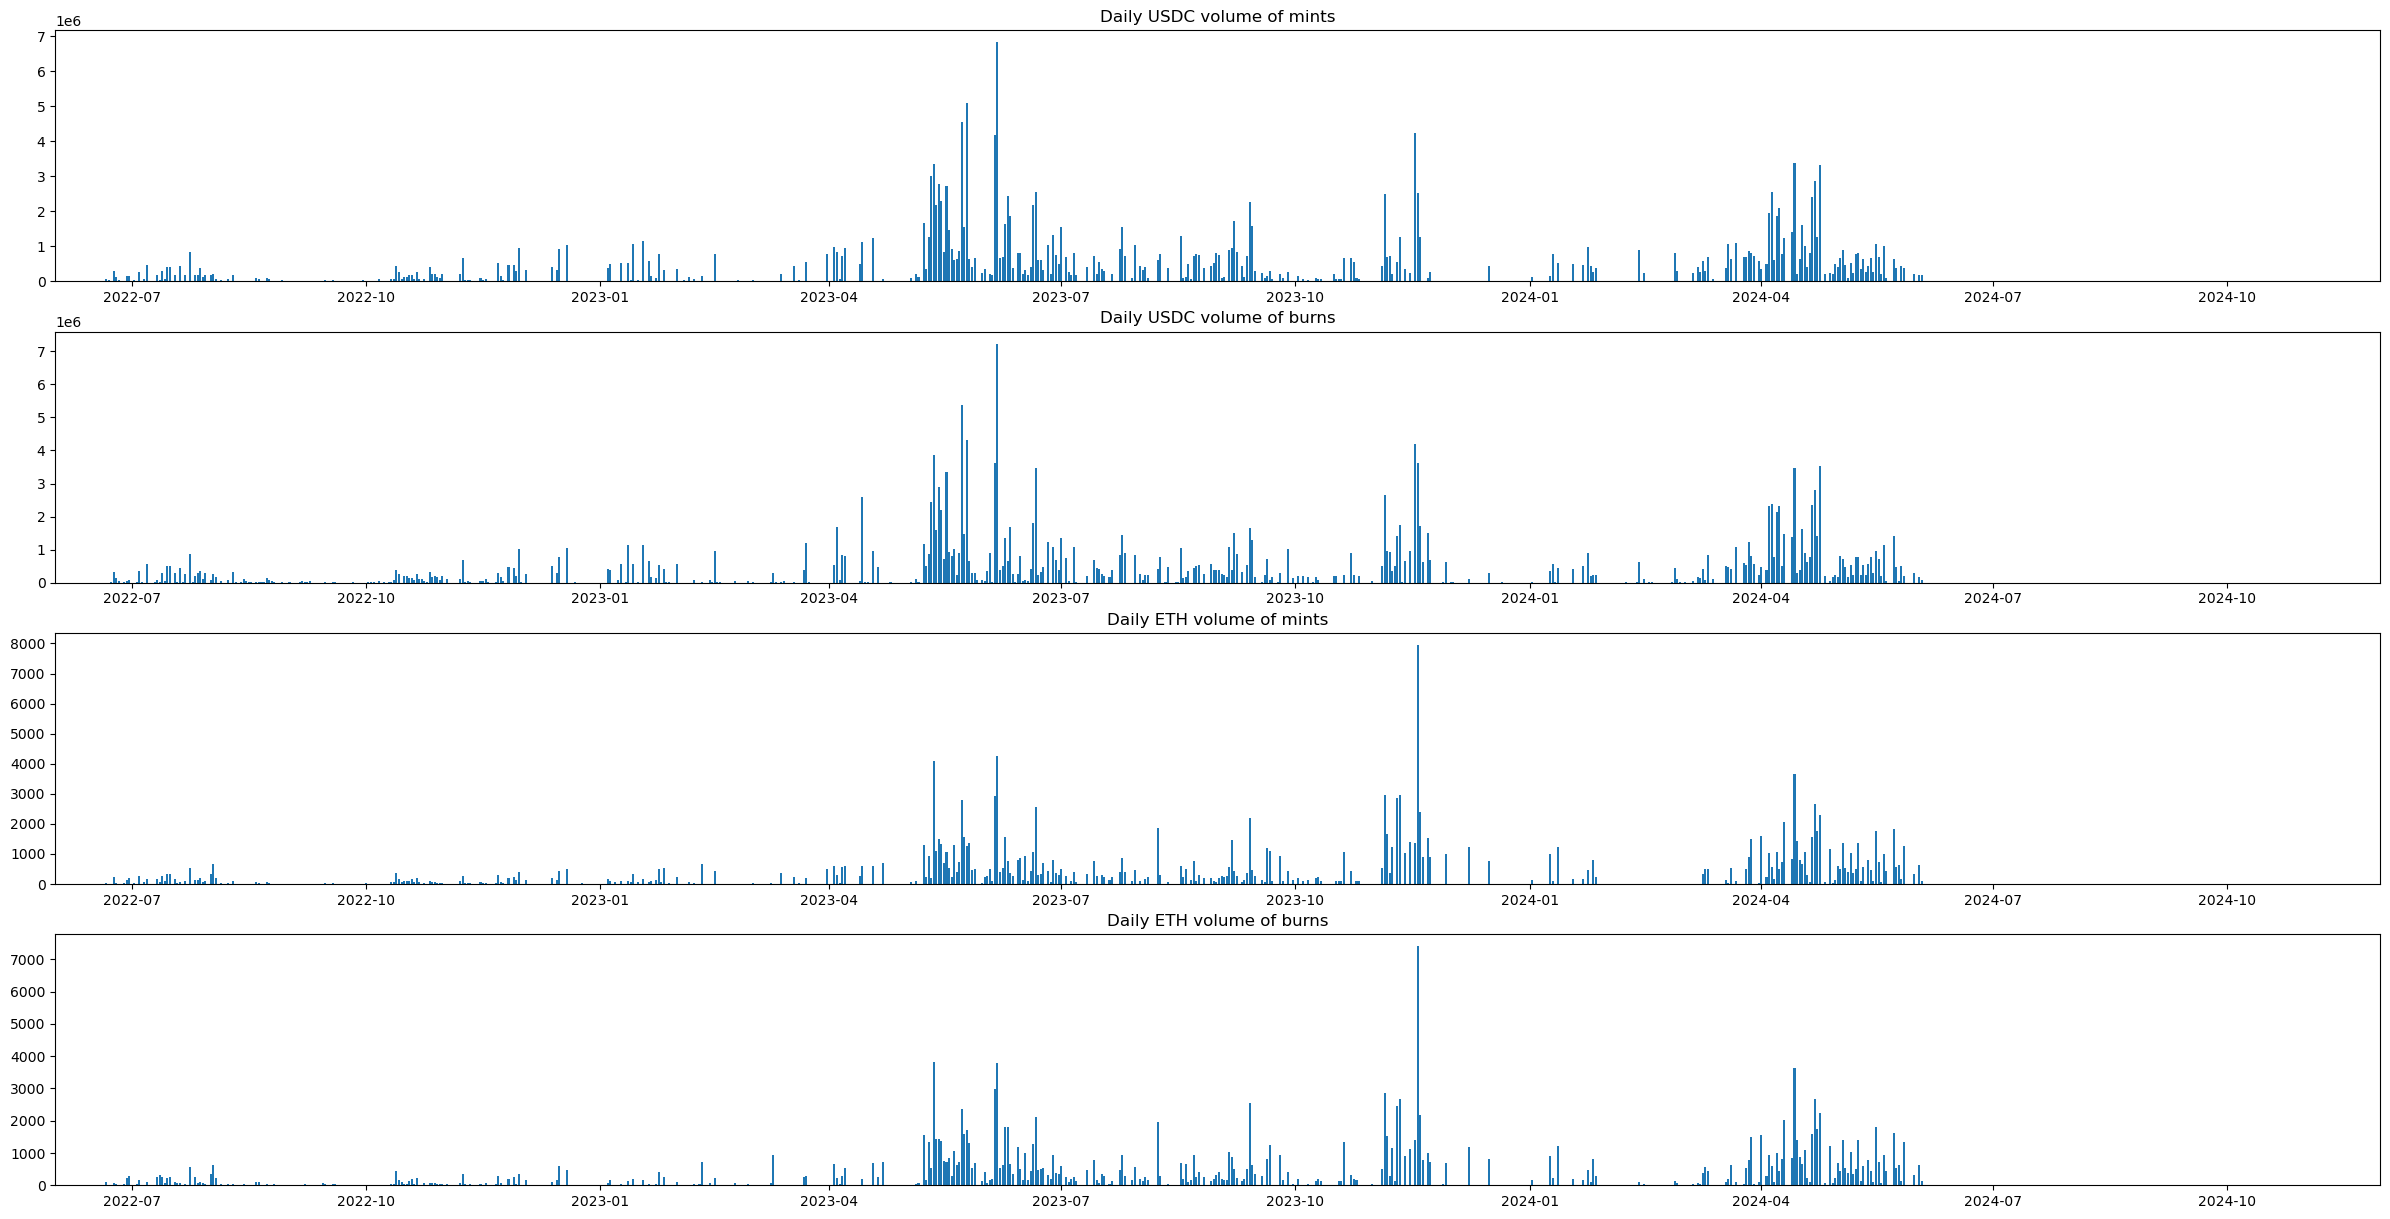

In [323]:
start_date, end_date= pd.Timestamp(2022, 6, 1), pd.Timestamp(2024, 11, 30)
excluded = list(burns[(burns.Day <= end_date.date()) & (burns.Day >= start_date.date())][['owner','liquidity']].groupby('owner').count().reset_index().sort_values(by='liquidity').iloc[-4:]['owner'])
mints1 = mints[(~mints['owner'].isin(excluded)) & (mints.Day <= end_date.date()) & (mints.Day >= start_date.date())][['amount0','amount1','Day']].groupby('Day').sum().reset_index()
burns1 = burns[(~burns['owner'].isin(excluded)) & (burns.Day <= end_date.date()) & (burns.Day >= start_date.date())][['amount0','amount1','Day']].groupby('Day').sum().reset_index()

fig, axs = plt.subplots(4, figsize=(30, 15))
axs[0].set_xlim(start_date, end_date)
axs[0].bar(mints1.Day, mints1.amount0)
axs[0].set_title("Daily USDC volume of mints")
axs[1].set_xlim(start_date, end_date)
axs[1].bar(burns1.Day, burns1.amount0)
axs[1].set_title("Daily USDC volume of burns")
axs[2].set_xlim(start_date, end_date)
axs[2].bar(mints1.Day, mints1.amount1)
axs[2].set_title("Daily ETH volume of mints")
axs[3].set_xlim(start_date, end_date)
axs[3].bar(burns1.Day, burns1.amount1)
axs[3].set_title("Daily ETH volume of burns")
plt.show()

# Zooming on the FTX collapse

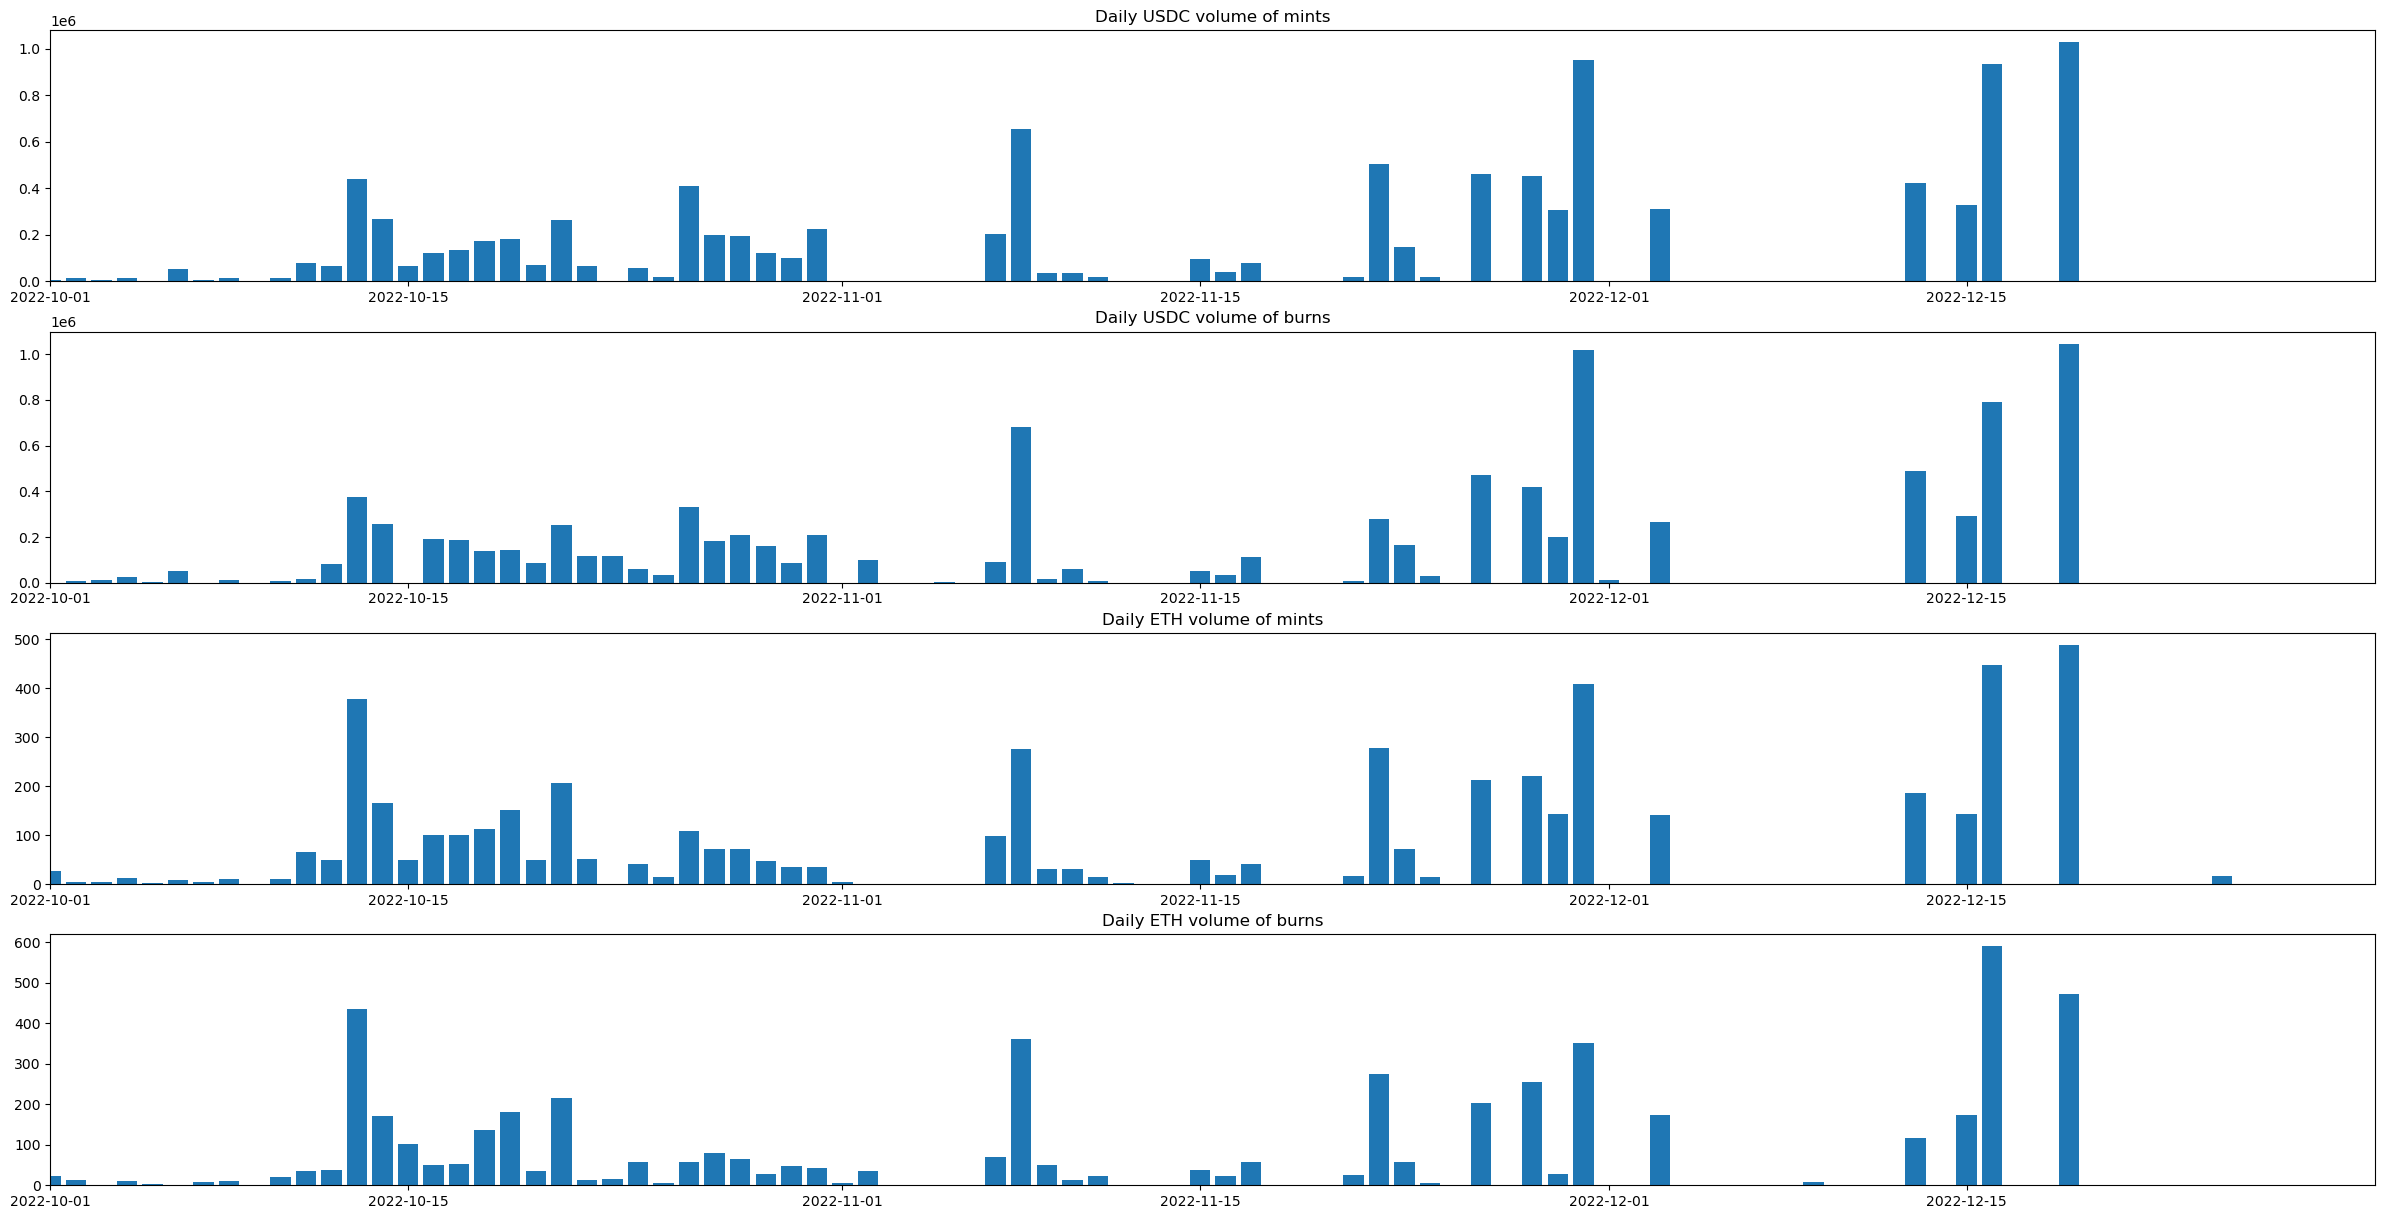

In [324]:
start_date, end_date= pd.Timestamp(2022, 10, 1), pd.Timestamp(2022, 12, 31)
excluded = list(burns[(burns.Day <= end_date.date()) & (burns.Day >= start_date.date())][['owner','liquidity']].groupby('owner').count().reset_index().sort_values(by='liquidity').iloc[-4:]['owner'])
mints1 = mints[(~mints['owner'].isin(excluded)) & (mints.Day <= end_date.date()) & (mints.Day >= start_date.date())][['amount0','amount1','Day']].groupby('Day').sum().reset_index()
burns1 = burns[(~burns['owner'].isin(excluded)) & (burns.Day <= end_date.date()) & (burns.Day >= start_date.date())][['amount0','amount1','Day']].groupby('Day').sum().reset_index()

fig, axs = plt.subplots(4, figsize=(30, 15))
axs[0].set_xlim(start_date, end_date)
axs[0].bar(mints1.Day, mints1.amount0)
axs[0].set_title("Daily USDC volume of mints")
axs[1].set_xlim(start_date, end_date)
axs[1].bar(burns1.Day, burns1.amount0)
axs[1].set_title("Daily USDC volume of burns")
axs[2].set_xlim(start_date, end_date)
axs[2].bar(mints1.Day, mints1.amount1)
axs[2].set_title("Daily ETH volume of mints")
axs[3].set_xlim(start_date, end_date)
axs[3].bar(burns1.Day, burns1.amount1)
axs[3].set_title("Daily ETH volume of burns")
plt.show()

## Looking at the (by far) top LP

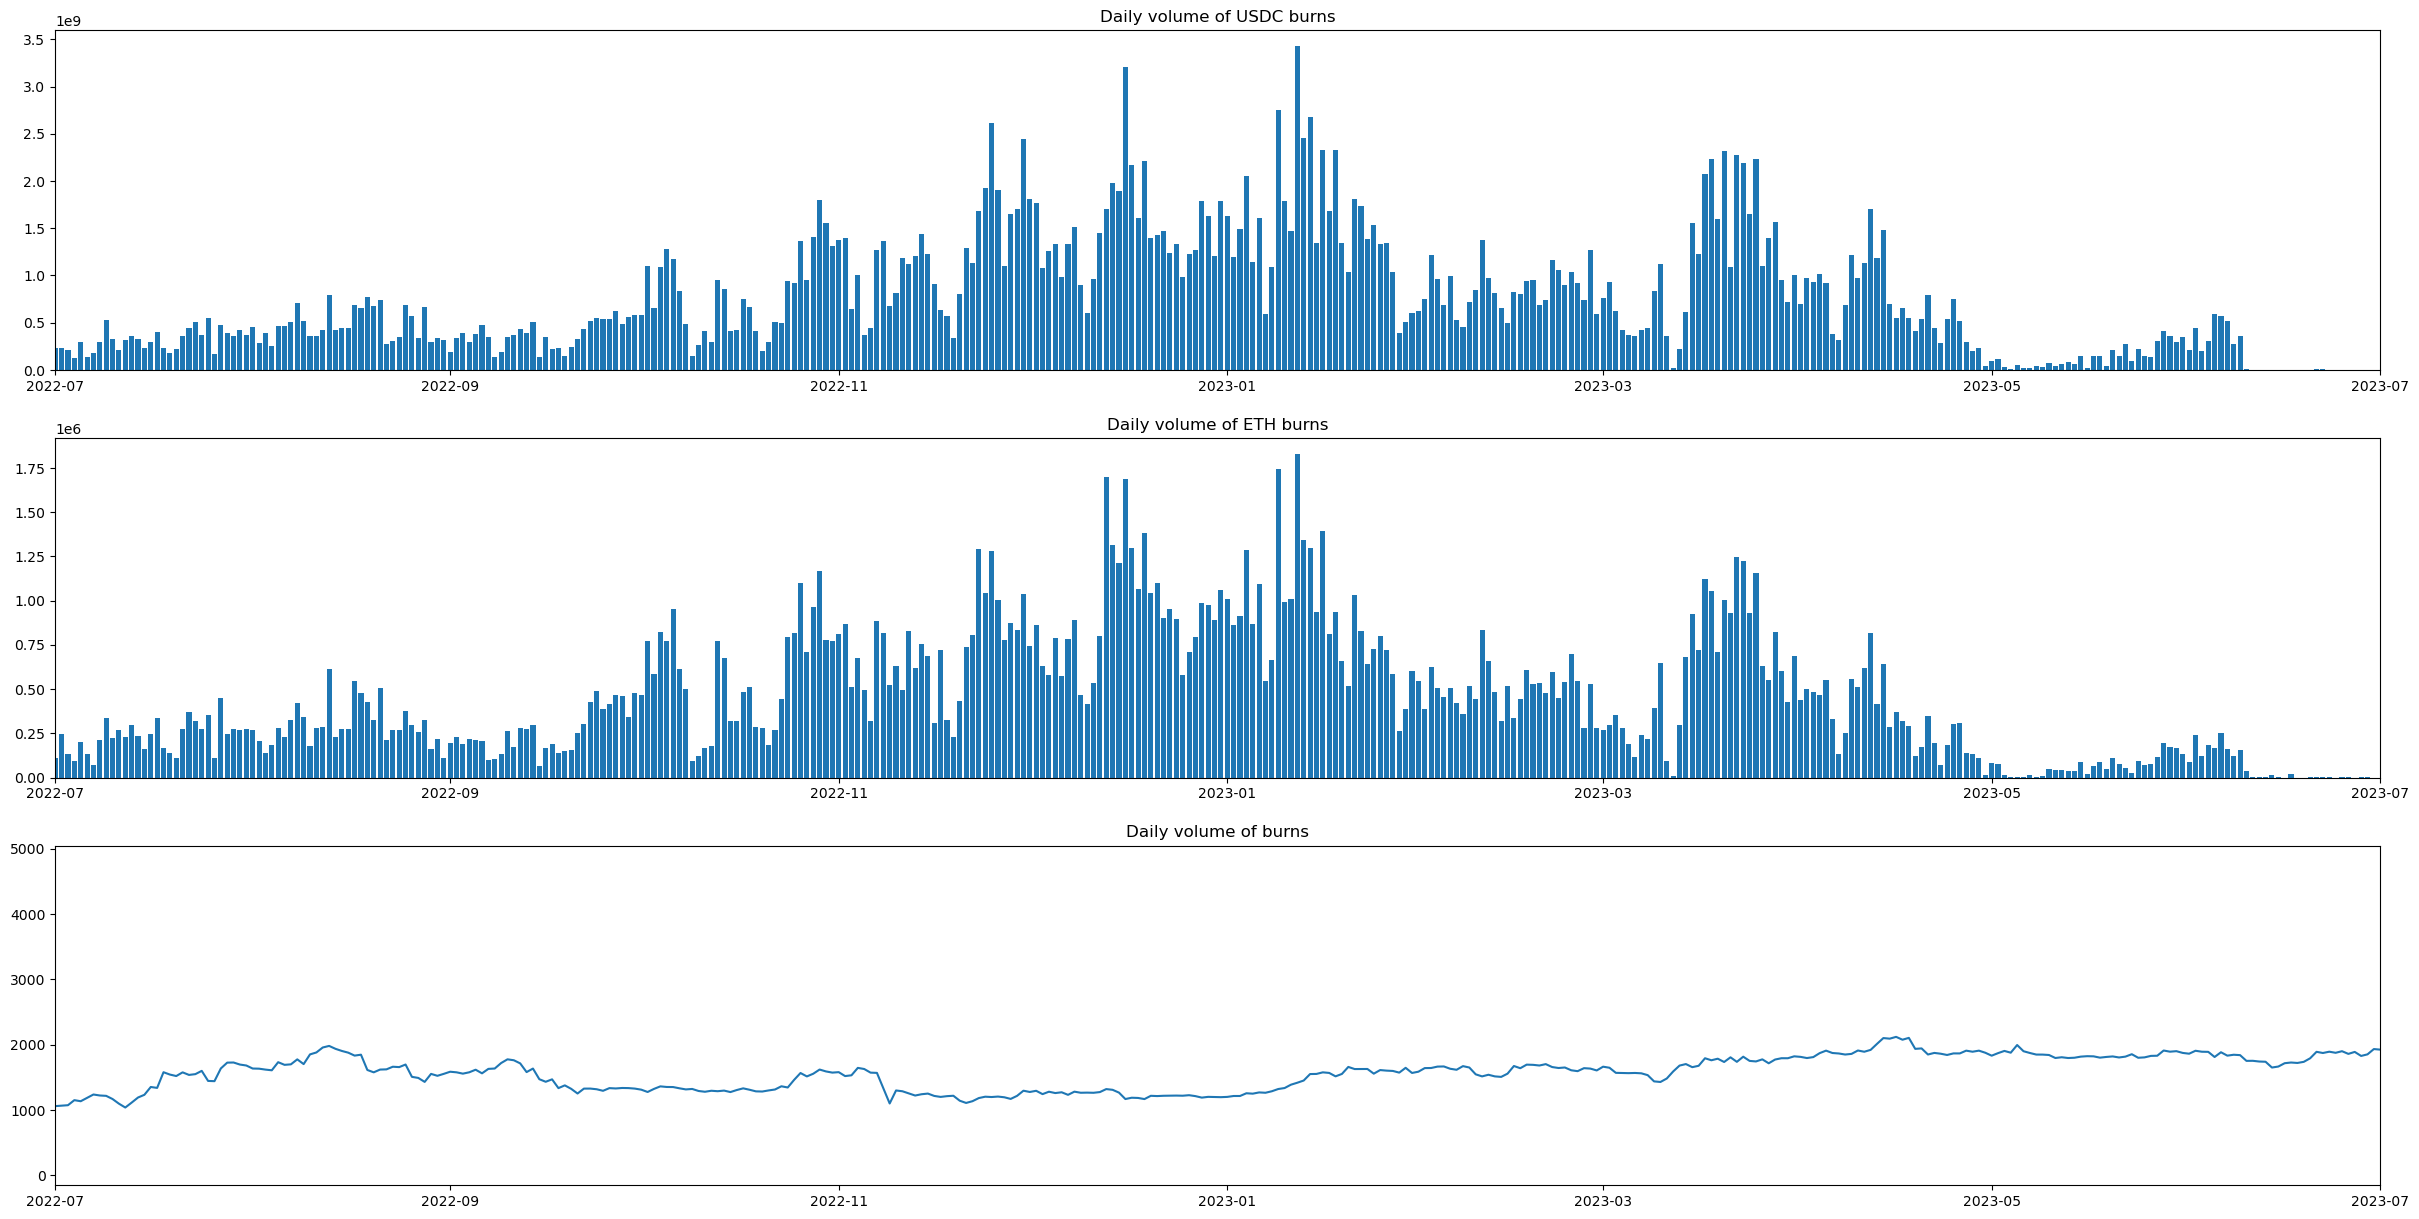

In [325]:
hist_bur = burns[(burns['owner']=='0xC36442b4a4522E871399CD717aBDD847Ab11FE88')][['amount0','amount1','Day']].groupby('Day').sum().reset_index()
hist_bur.head()
start_timestamp, end_timestamp = pd.Timestamp(2022, 7, 1), pd.Timestamp(2023, 7, 1)
fig, axs = plt.subplots(3, figsize=(30, 15))
axs[0].set_xlim(start_timestamp, end_timestamp)
axs[0].bar(hist_bur.Day, hist_bur.amount0)
axs[0].set_title("Daily volume of USDC burns")
axs[1].set_xlim(start_timestamp, end_timestamp)
axs[1].bar(hist_bur.Day, hist_bur.amount1)
axs[1].set_title("Daily volume of ETH burns")
axs[2].set_xlim(start_timestamp, end_timestamp)
axs[2].plot(market.Date, market['Adj Close'])
axs[2].set_title("Daily volume of burns")
plt.show()

In [45]:
def plot_user_dist(id,df, start_date, end_date):
    """
    id : user id
    df : mints/burns dataframe
    [start_date, end_date] : range
    
    """
    dist = df[(df['owner']==id) & (df.Day <= end_date.date()) & (df.Day >= start_date.date())]
    if not len(dist):
        return [], []
    
    # Step 2: Create a list of points where intervals start and end
    points = set()
    for row in dist.itertuples():
        points.add(row.tickLower)
        points.add(row.tickUpper)
    points = sorted(points)

    # Step 3: Calculate the sum of values for each segment between points
    segments = []
    for i in range(len(points) - 1):
        start = points[i]
        end = points[i + 1]
        value_sum = dist[(dist['tickLower'] < end) & (dist['tickUpper'] > start)]['liquidity'].sum()
        segments.append((start, end, value_sum))

    # Step 4: Plot the results
    x = []
    y = []
    for start, end, value_sum in segments:
        x.extend([start, end])
        y.extend([value_sum, value_sum])
    xp, yp = [(10 ** 12)/((1.0001)**x[0])], [0]
    for i in range(len(x)):
        xp.append((10 ** 12)/((1.0001)**x[i]))
        yp.append(y[i])
    xp.append((10 ** 12)/((1.0001)**x[-1]))
    yp.append(0)
    return xp, yp


## Mints and Burns distribution between 07/11/2022 and 11/11/2022 (FTX)
### Min and Max daily price in red

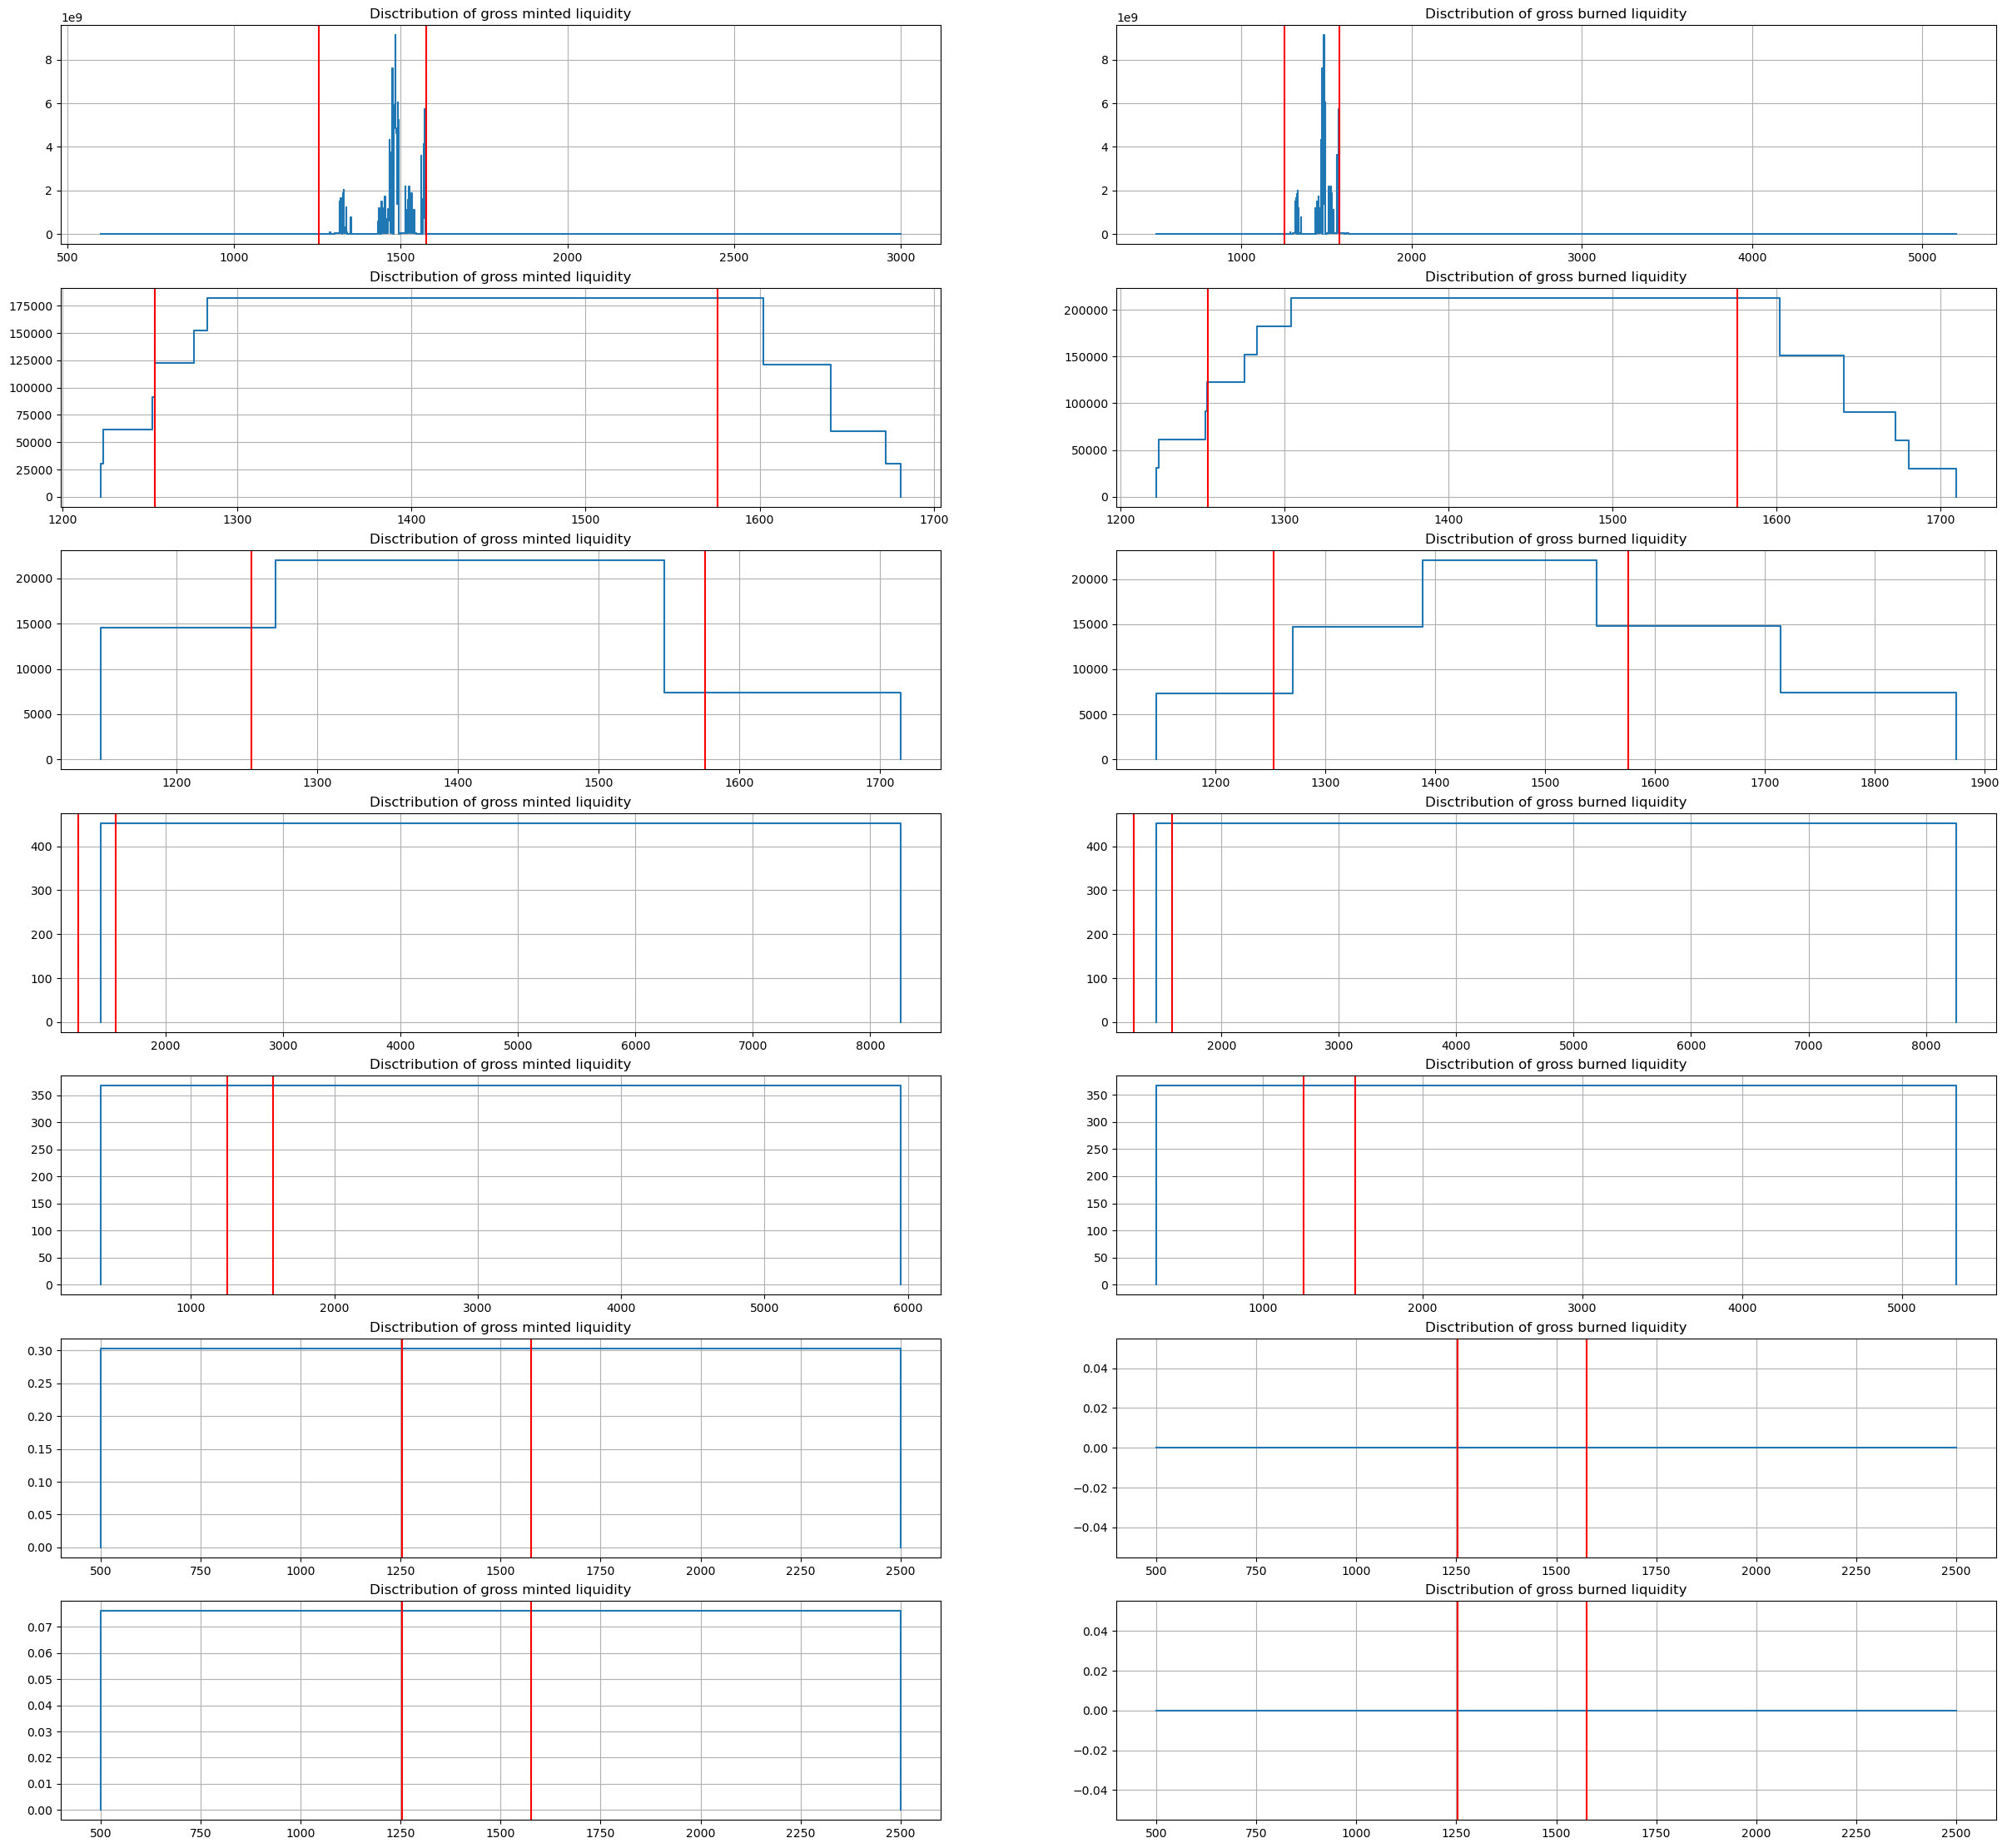

In [327]:
start_date, end_date = pd.Timestamp(2022,11,8), pd.Timestamp(2022,11,8)
owners = list(burns[(burns.Day <= end_date.date()) & (burns.Day >= start_date.date())][['owner','liquidity']].groupby('owner').sum().reset_index().sort_values(by='liquidity', ascending=False)['owner'].unique())
fig, axs = plt.subplots(len(owners),2,figsize=(30, 4*len(owners)))
for i in range(len(owners)):
    p,l = plot_user_dist(owners[i], mints, start_date, end_date) 

    axs[i][0].step(p, l, where='post')
    axs[i][0].set_title('Disctribution of gross minted liquidity')
    axs[i][0].grid(True)
    axs[i][0].axvline(contract_stressed[(contract_stressed.Day <= end_date.date()) & (contract_stressed.Day >= start_date.date())].price.min(), color='red')
    axs[i][0].axvline(contract_stressed[(contract_stressed.Day <= end_date.date()) & (contract_stressed.Day >= start_date.date())].price.max(), color='red')
    p,l = plot_user_dist(owners[i], burns, start_date, end_date) 

    axs[i][1].step(p, l, where='post')
    axs[i][1].set_title('Disctribution of gross burned liquidity')
    axs[i][1].grid(True)
    axs[i][1].axvline(contract_stressed[(contract_stressed.Day <= end_date.date()) & (contract_stressed.Day >= start_date.date())].price.min(), color='red')
    axs[i][1].axvline(contract_stressed[(contract_stressed.Day <= end_date.date()) & (contract_stressed.Day >= start_date.date())].price.max(), color='red')

plt.show()

## Amount of Tokens Minted/Burned just before and during the collapse

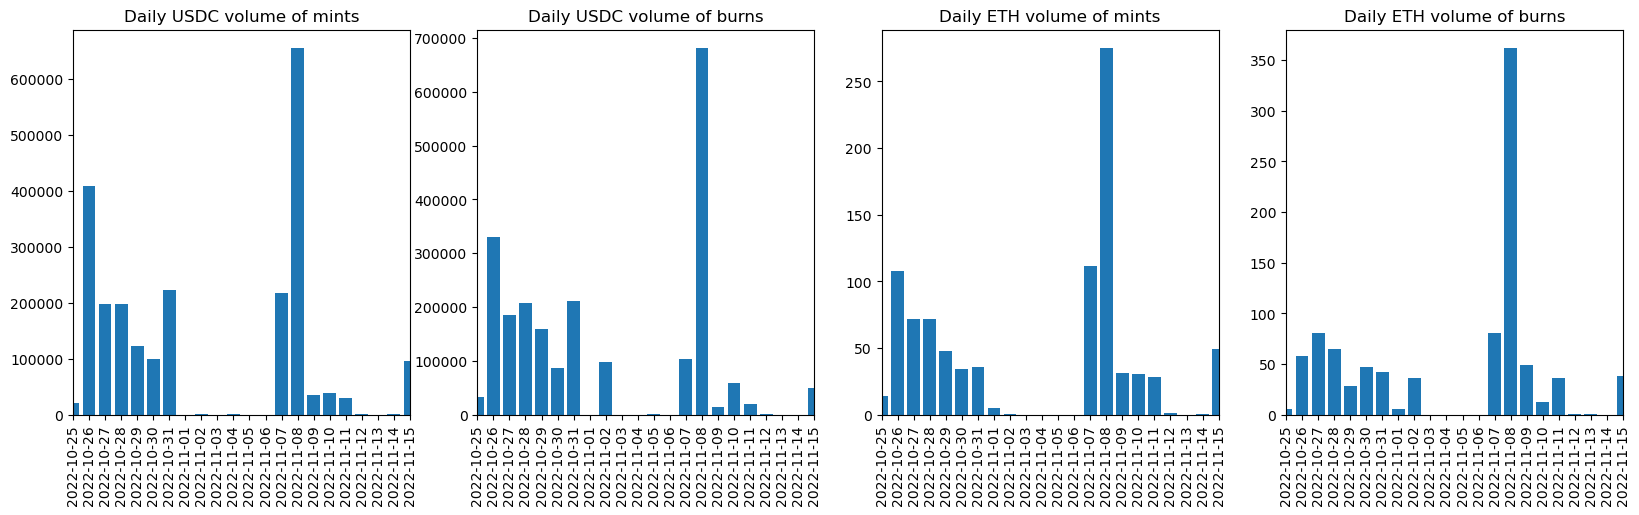

In [328]:
start_date, end_date= pd.Timestamp(2022, 10, 25), pd.Timestamp(2022, 11, 15)
excluded = list(burns[['owner','liquidity']].groupby('owner').count().reset_index().sort_values(by='liquidity').iloc[-4:]['owner'])
mints1 = mints[(~mints['owner'].isin(excluded)) & (mints.Day <= end_date.date()) & (mints.Day >= start_date.date())][['amount0','amount1','Day']].groupby('Day').sum().reset_index()
burns1 = burns[(~burns['owner'].isin(excluded)) & (burns.Day <= end_date.date()) & (burns.Day >= start_date.date())][['amount0','amount1','Day']].groupby('Day').sum().reset_index()

fig, axs = plt.subplots(1,4, figsize=(20, 5))
axs[0].set_xlim(start_date, end_date)
axs[0].bar(mints1.Day, mints1.amount0)
axs[0].set_title("Daily USDC volume of mints")
axs[0].set_xticks(burns1.Day)
axs[0].set_xticklabels(burns1.Day,rotation=90)
axs[1].set_xlim(start_date, end_date)
axs[1].bar(burns1.Day, burns1.amount0)
axs[1].set_title("Daily USDC volume of burns")
axs[1].set_xticks(burns1.Day)
axs[1].set_xticklabels(burns1.Day,rotation=90)
axs[2].set_xlim(start_date, end_date)
axs[2].bar(mints1.Day, mints1.amount1)
axs[2].set_title("Daily ETH volume of mints")
axs[2].set_xticks(burns1.Day)
axs[2].set_xticklabels(burns1.Day,rotation=90)
axs[3].set_xlim(start_date, end_date)
axs[3].bar(burns1.Day, burns1.amount1)
axs[3].set_title("Daily ETH volume of burns")
axs[3].set_xticks(burns1.Day)
axs[3].set_xticklabels(burns1.Day,rotation=90)
plt.show()

## Focus on top LP Mints/Burnd daily distribution during the collapse

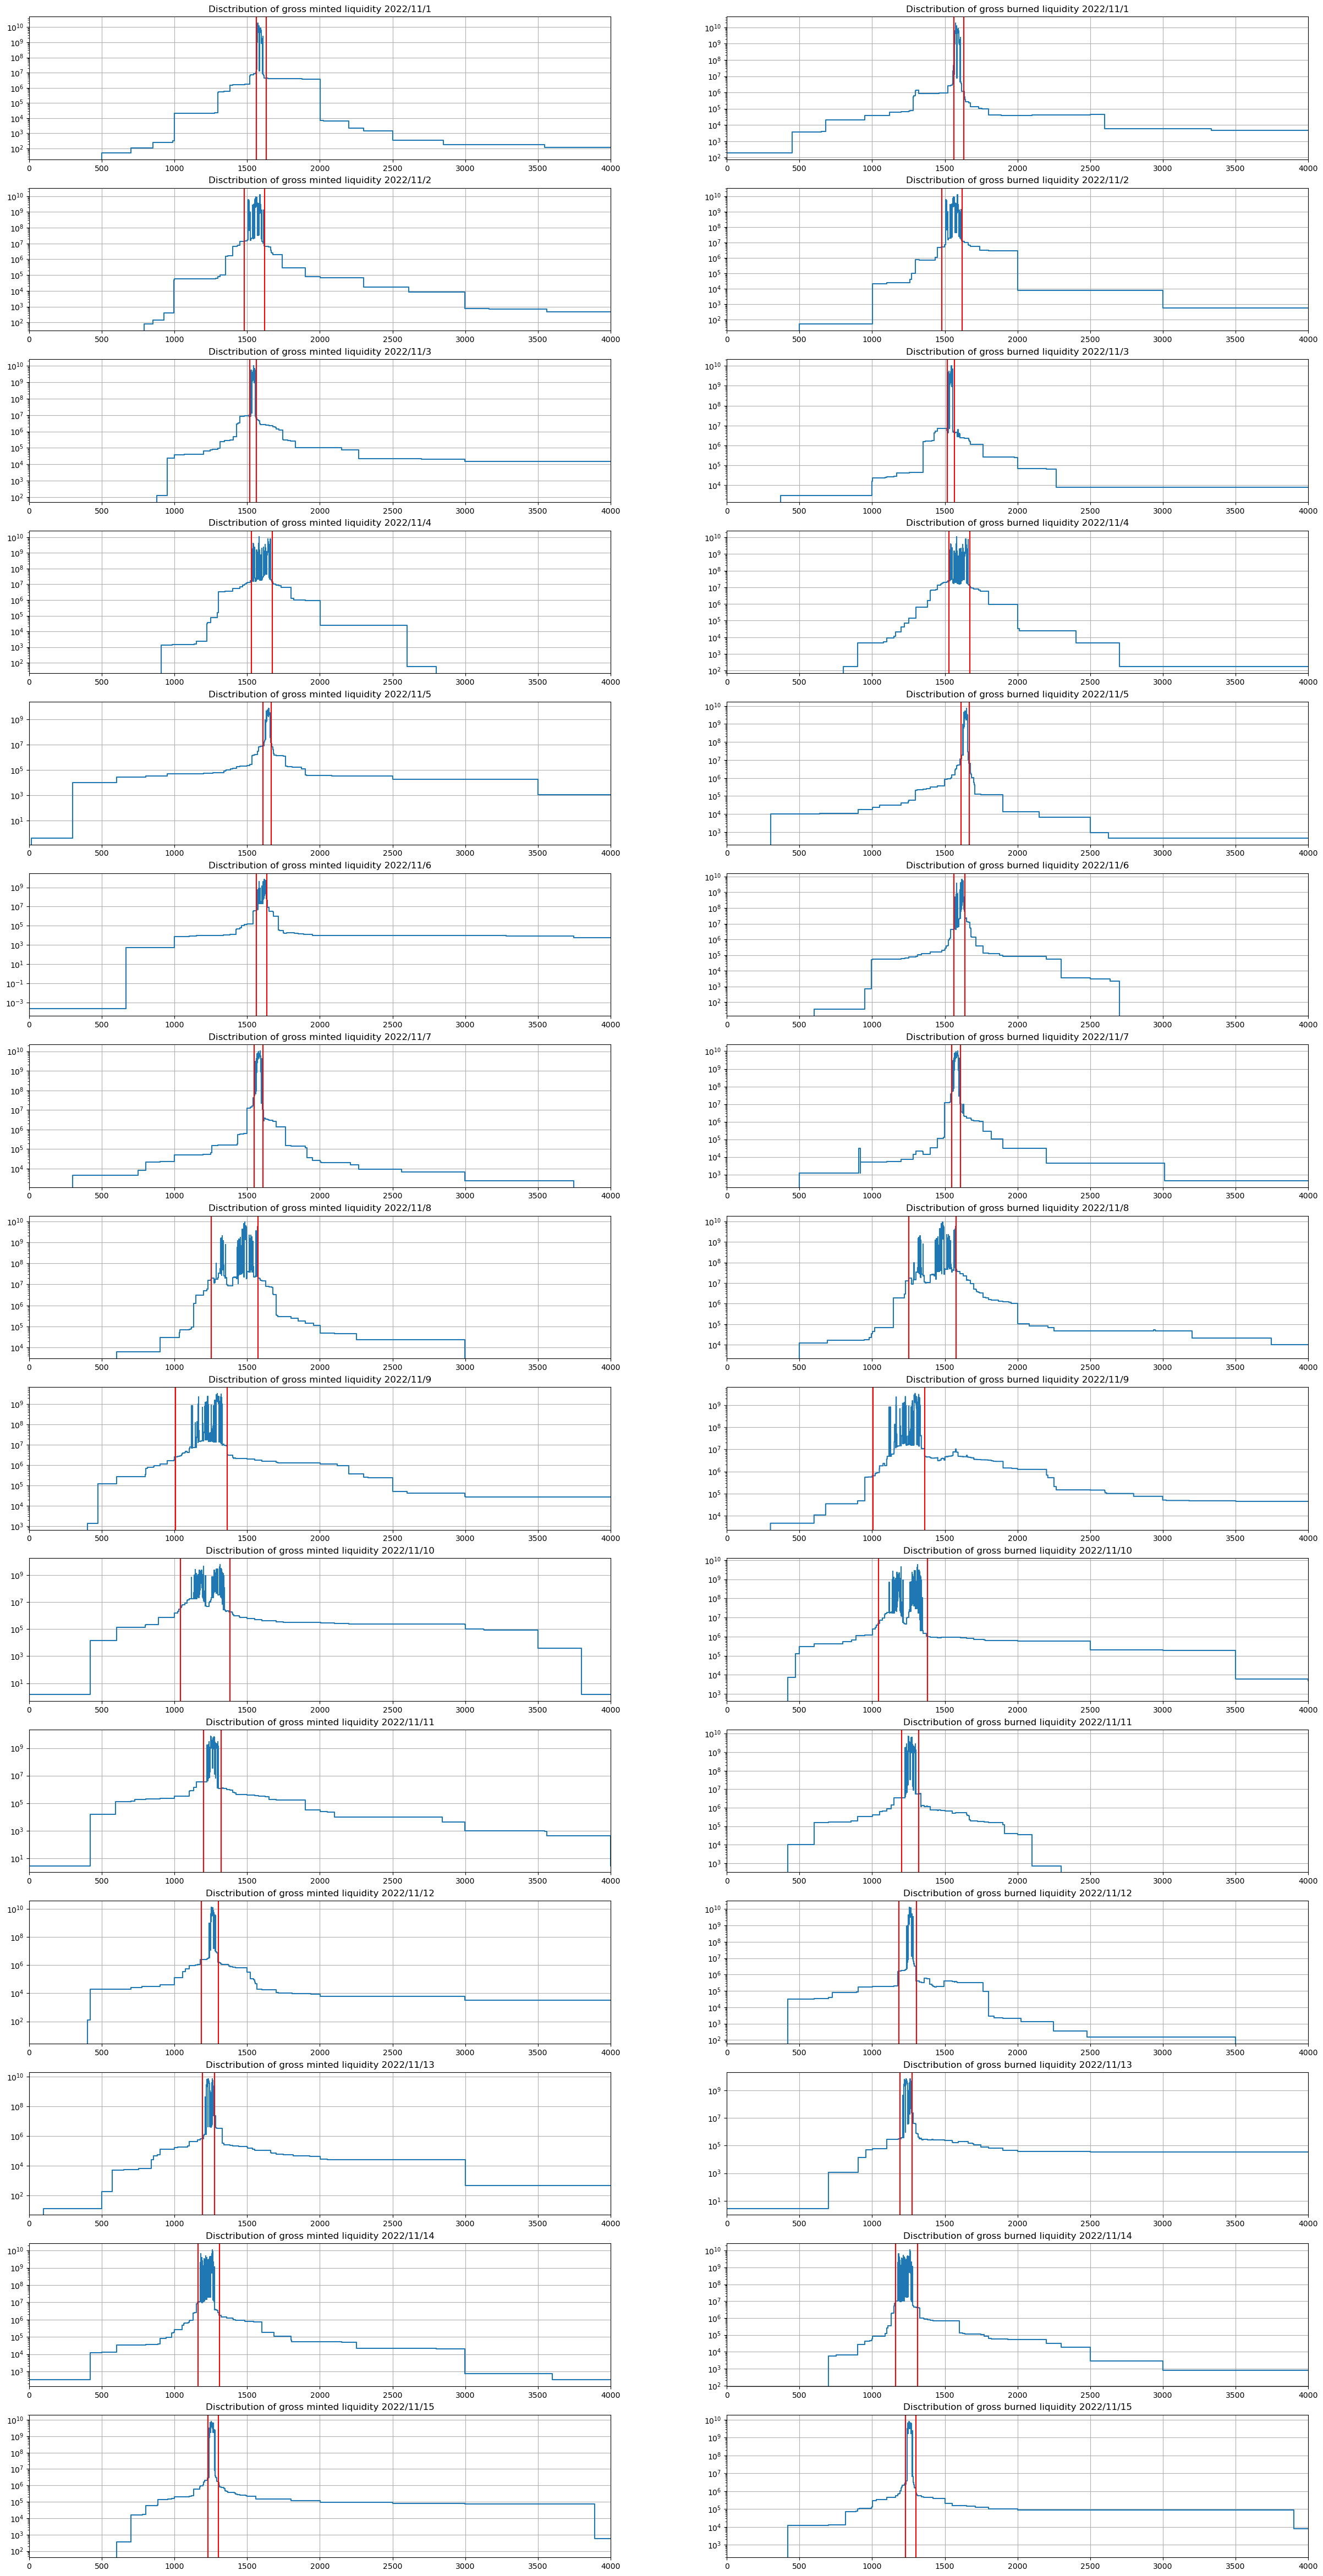

In [329]:
fig, axs = plt.subplots(15,2,figsize=(30, 60))
for i in range(15):
    start_date, end_date = pd.Timestamp(2022,11,1+i), pd.Timestamp(2022,11,1+i)
    p,l = plot_user_dist('0xC36442b4a4522E871399CD717aBDD847Ab11FE88', mints, start_date, end_date) 
    axs[i][0].step(p, l, where='post')
    axs[i][0].set_title(f'Disctribution of gross minted liquidity 2022/11/{1+i}')
    axs[i][0].grid(True)
    axs[i][0].set_xlim(0,4000)
    axs[i][0].set_yscale('log')
    axs[i][0].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,1+i).date()].price.min(), color='red')
    axs[i][0].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,1+i).date()].price.max(), color='red')
    p,l = plot_user_dist('0xC36442b4a4522E871399CD717aBDD847Ab11FE88', burns, start_date, end_date) 
    axs[i][1].step(p, l, where='post')
    axs[i][1].set_title(f'Disctribution of gross burned liquidity 2022/11/{1+i}')
    axs[i][1].grid(True)
    axs[i][1].set_xlim(0,4000)
    axs[i][1].set_yscale('log')
    axs[i][1].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,1+i).date()].price.min(), color='red')
    axs[i][1].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,1+i).date()].price.max(), color='red')
plt.show()

## Focus on 2nd top LP (for the corresponding period)  Mints/Burnd daily distribution during the collapse

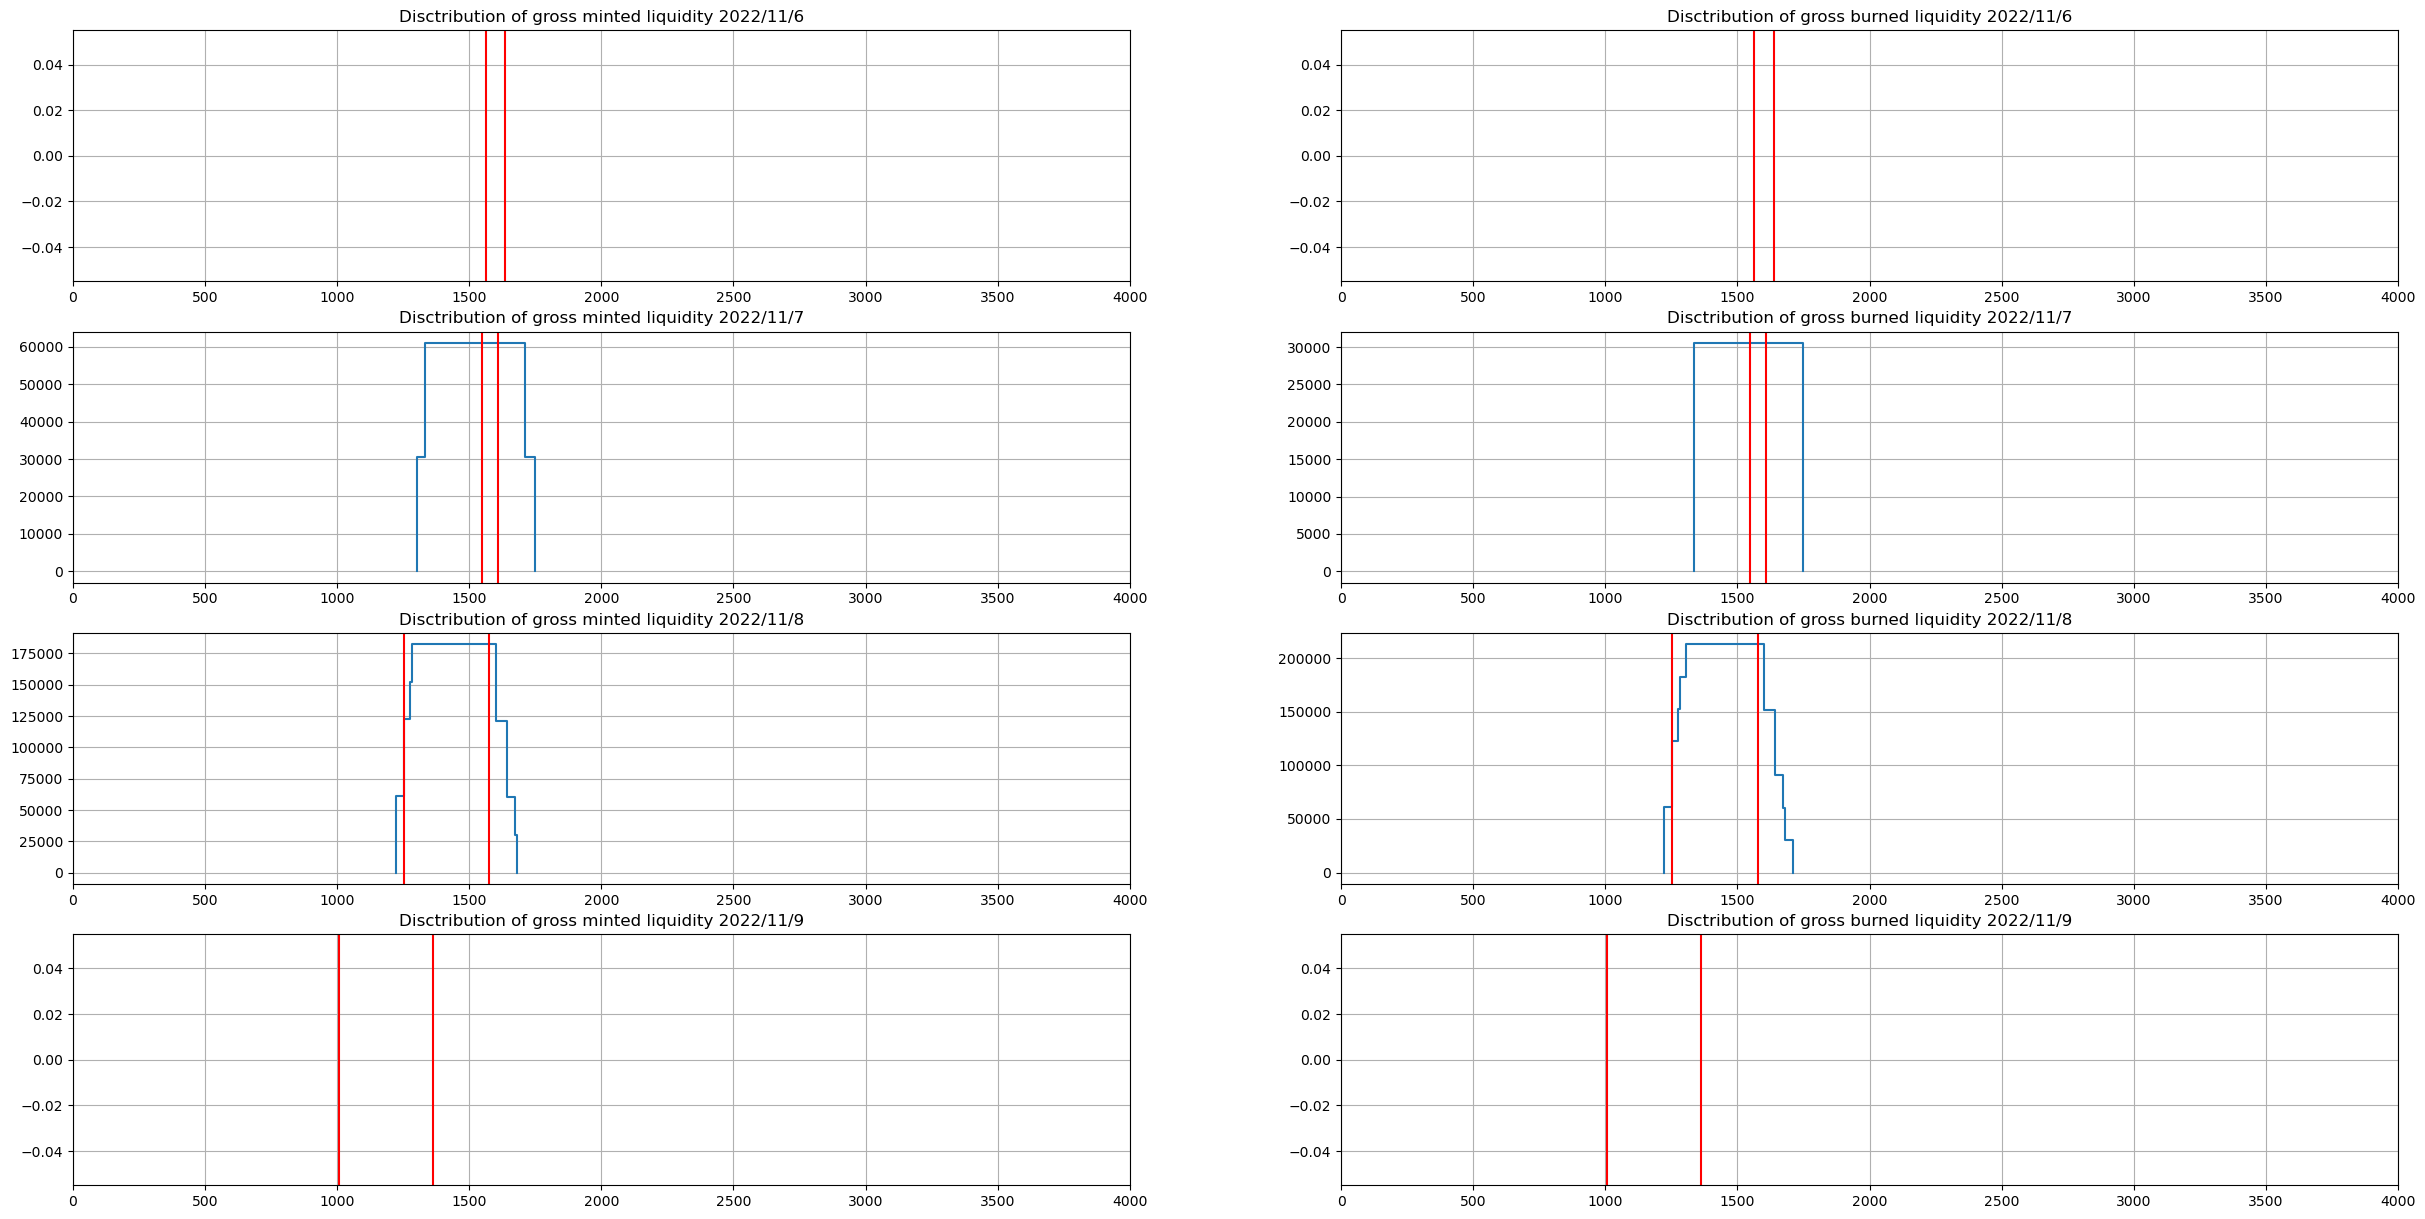

In [330]:
fig, axs = plt.subplots(4,2,figsize=(30, 15))
for i in range(4):
    start_date, end_date = pd.Timestamp(2022,11,6+i), pd.Timestamp(2022,11,6+i)
    p,l = plot_user_dist('0x86426AD2B71f41a5d545E5e2F63c76913D93E1A5', mints, start_date, end_date) 
    axs[i][0].step(p, l, where='post')
    axs[i][0].set_title(f'Disctribution of gross minted liquidity 2022/11/{6+i}')
    axs[i][0].grid(True)
    axs[i][0].set_xlim(0,4000)
    axs[i][0].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,6+i).date()].price.min(), color='red')
    axs[i][0].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,6+i).date()].price.max(), color='red')
    p,l = plot_user_dist('0x86426AD2B71f41a5d545E5e2F63c76913D93E1A5', burns, start_date, end_date) 
    axs[i][1].step(p, l, where='post')
    axs[i][1].set_title(f'Disctribution of gross burned liquidity 2022/11/{6+i}')
    axs[i][1].grid(True)
    axs[i][1].set_xlim(0,4000)
    axs[i][1].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,6+i).date()].price.min(), color='red')
    axs[i][1].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,6+i).date()].price.max(), color='red')
plt.show()

## Focus on 3rd top LP (for the corresponding period)  Mints/Burnd daily distribution during the collapse

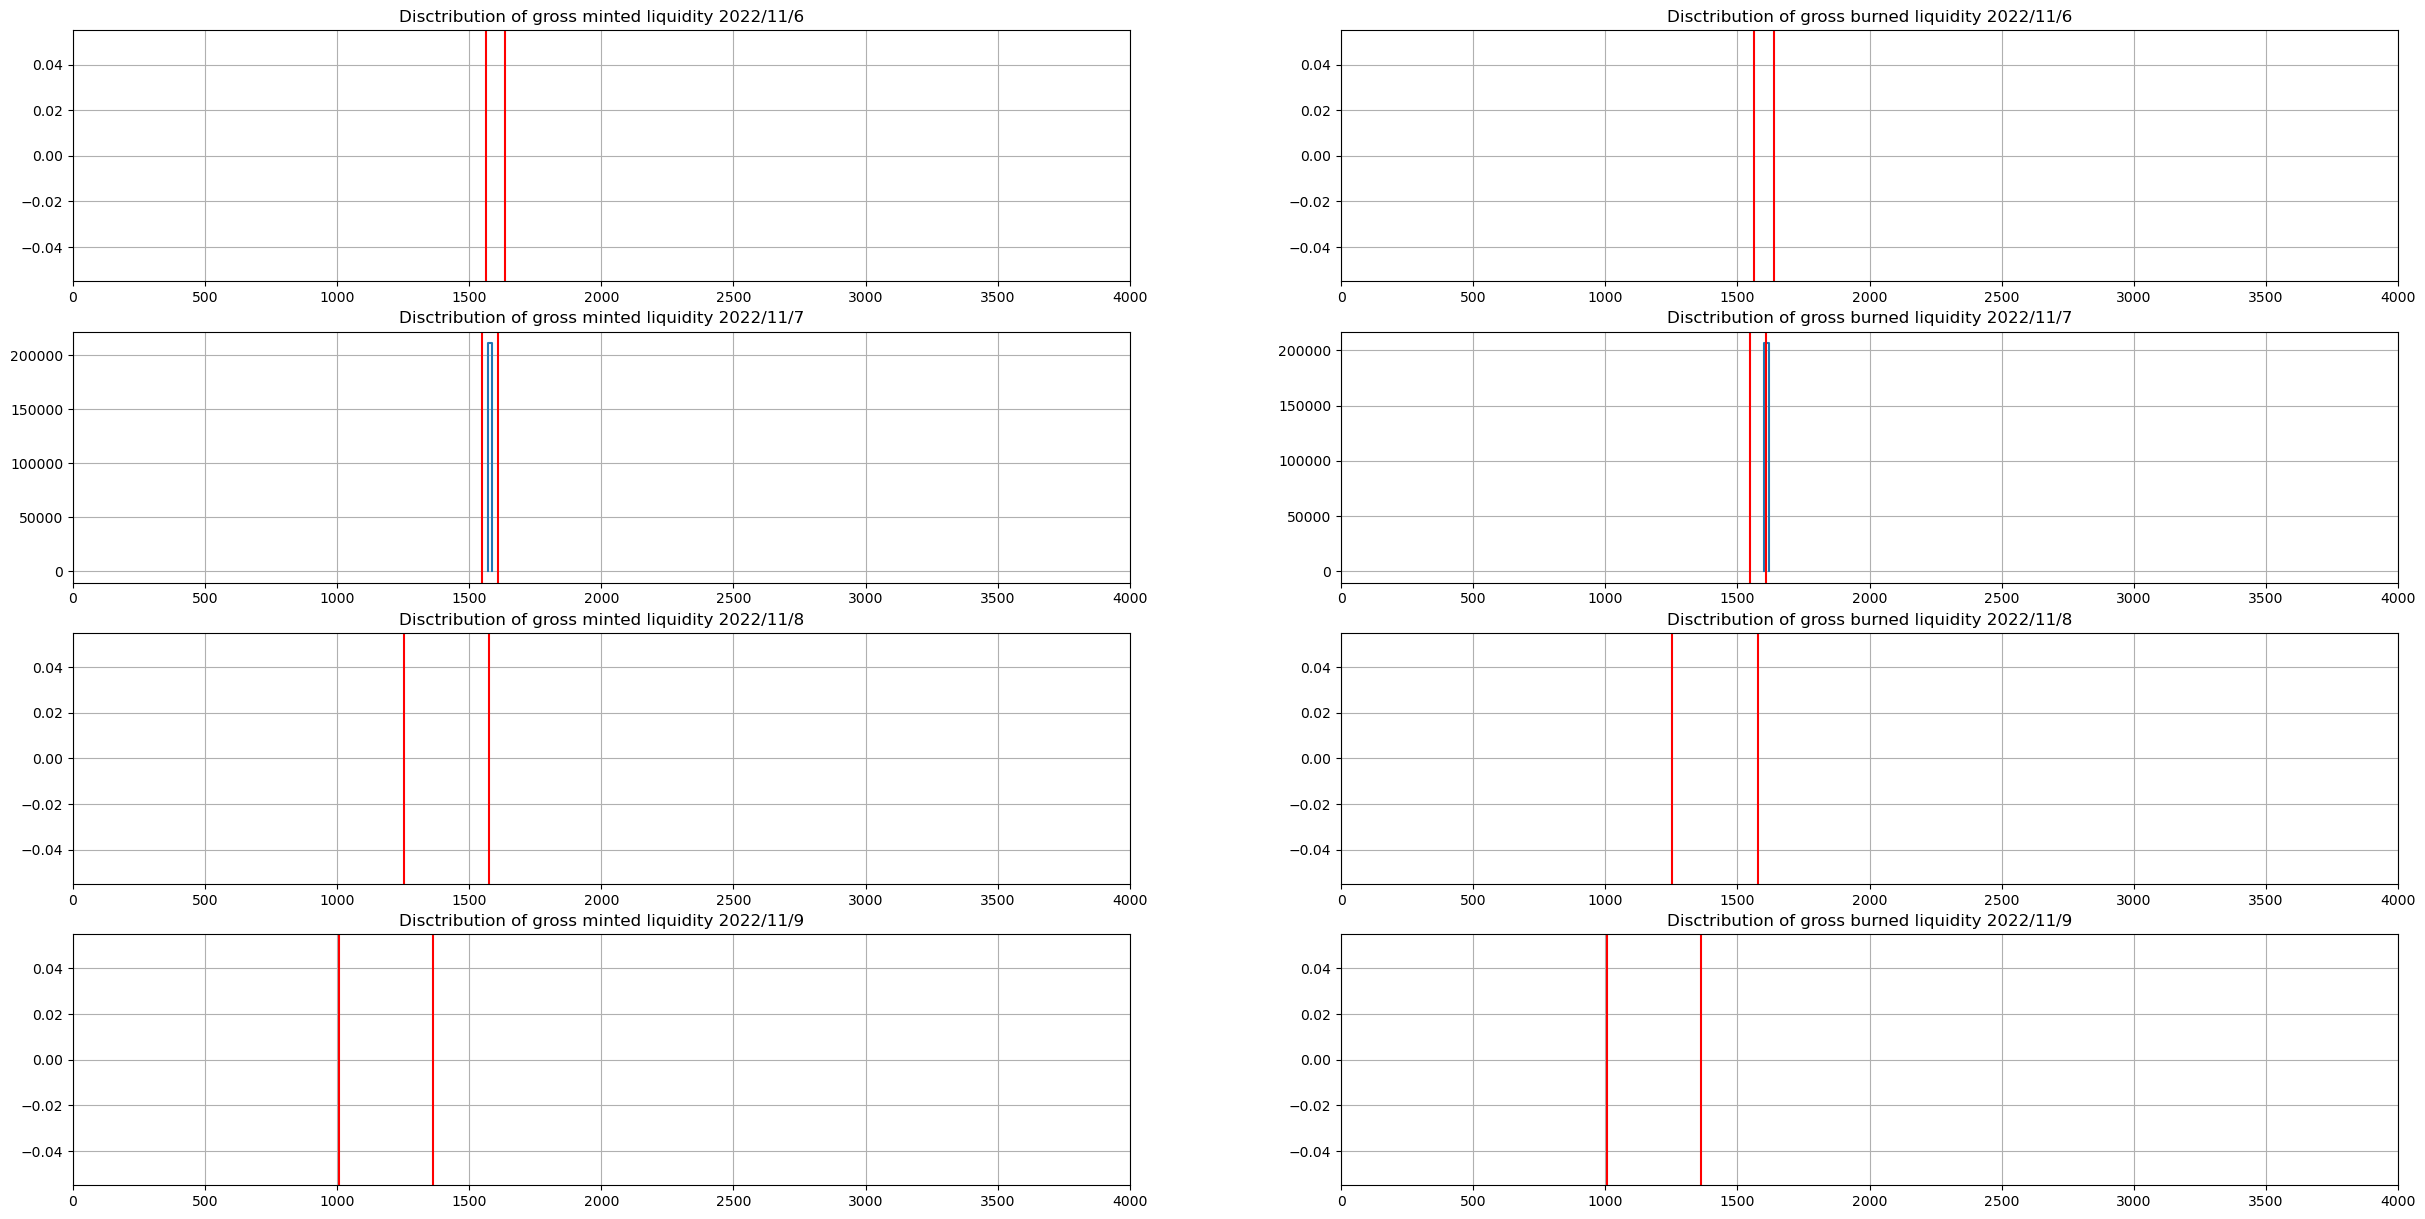

In [331]:
fig, axs = plt.subplots(4,2,figsize=(30, 15))
for i in range(4):
    start_date, end_date = pd.Timestamp(2022,11,6+i), pd.Timestamp(2022,11,6+i)
    p,l = plot_user_dist('0x55781b86fA7123710791d21079f131D251213Aa6', mints, start_date, end_date) 
    axs[i][0].step(p, l, where='post')
    axs[i][0].set_title(f'Disctribution of gross minted liquidity 2022/11/{6+i}')
    axs[i][0].grid(True)
    axs[i][0].set_xlim(0,4000)
    axs[i][0].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,6+i).date()].price.min(), color='red')
    axs[i][0].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,6+i).date()].price.max(), color='red')
    p,l = plot_user_dist('0x55781b86fA7123710791d21079f131D251213Aa6', burns, start_date, end_date) 
    axs[i][1].step(p, l, where='post')
    axs[i][1].set_title(f'Disctribution of gross burned liquidity 2022/11/{6+i}')
    axs[i][1].grid(True)
    axs[i][1].set_xlim(0,4000)
    axs[i][1].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,6+i).date()].price.min(), color='red')
    axs[i][1].axvline(contract_stressed[contract_stressed['Day'] == pd.Timestamp(2022,11,6+i).date()].price.max(), color='red')
plt.show()

## High Frequency Market Data (Binance ETH/USDT)

In [4]:
binance = pd.read_csv('../../Binance_data_ETHUSDT.csv')
binance['Timestamp'] = pd.to_datetime(binance['Timestamp'], dayfirst=True)
binance.head()

Timestamp     Open     High      Low    Close    Volume
0 2022-06-30 22:00:00  1021.89  1024.44  1021.50  1023.75  692.1712
1 2022-06-30 22:01:00  1023.76  1023.92  1022.92  1023.21  517.4394
2 2022-06-30 22:02:00  1023.21  1025.56  1022.47  1023.19  694.9357
3 2022-06-30 22:03:00  1023.19  1024.53  1022.63  1024.16  420.3312
4 2022-06-30 22:04:00  1024.16  1025.22  1023.94  1025.17  711.4277

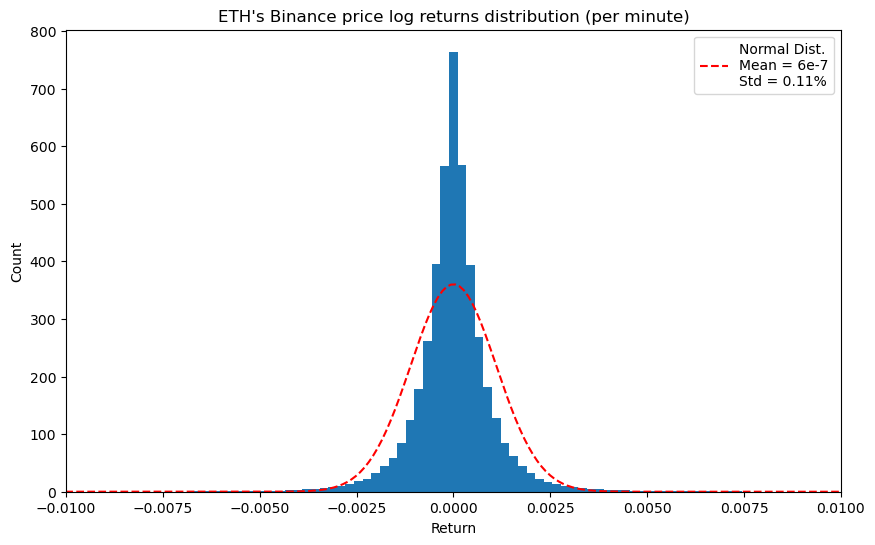

Log returns' drift (per minute): 6.021544061984965e-07
Log returns' volatility (per minute): 0.11%
Log returns' annualized volatility: 80.29%


In [31]:
from scipy.stats import norm

binance['log_returns'] = np.log(binance['Close']).diff()
returns  = binance['log_returns'][1:]
mean = np.mean(returns) 
std_dev = np.std(returns) # Step 3: Plot the histogram of the returns 
x = np.linspace(min(returns), max(returns), 1000) 
gaussian_pdf = norm.pdf(x, mean, std_dev) # Plot the Gaussian curve 
 
plt.figure(figsize=(10,6))
plt.hist(returns, density=True, bins=500)
plt.plot(x, gaussian_pdf, 'r--', label=f'Normal Dist.\nMean = 6e-7\nStd = 0.11%') 
plt.title("ETH's Binance price log returns distribution (per minute)")
plt.xlabel("Return")
plt.ylabel("Count")
plt.xlim(-0.01,0.01)
plt.legend()
plt.show()
print(f"Log returns' drift (per minute): {returns.mean()}")
print(f"Log returns' volatility (per minute): {round(100*returns.std(),2)}%")
print(f"Log returns' annualized volatility: {round(np.sqrt(60*24*365)*100*returns.std(),2)}%")

### Checking normality of log-returns

#### Q-Q plot

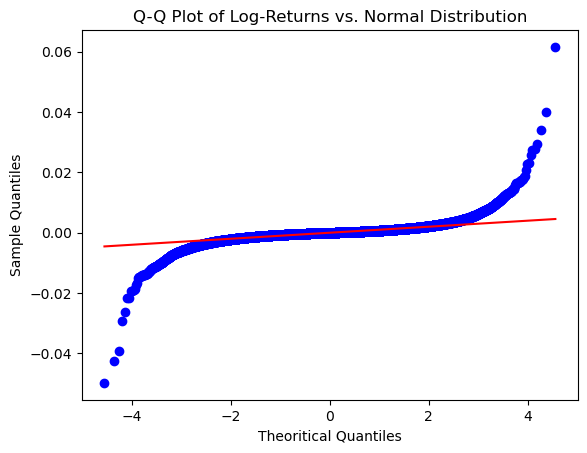

In [33]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats 
#create Q-Q plot with 45-degree line added to plot
stats.probplot(returns, dist='norm', plot=plt)
plt.title('Q-Q Plot of Log-Returns vs. Normal Distribution')
plt.xlabel('Theoritical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#### Kolmogorov-Smirnov test

In [ ]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test for normality
kstest(returns, 'norm')


KstestResult(statistic=0.4964084447152489, pvalue=0.0, statistic_location=-0.006767911318332764, statistic_sign=-1)

# Per minute price

In [10]:
contract_stressed['minute'] = contract_stressed.timestamp.dt.floor('min')
minute_contract_stressed = contract_stressed.groupby('minute').aggregate(lambda x: x.iloc[-1]).reset_index() #closing price

Check how many trades in a Uniswap Pool happend on average within a minute (case of USDC/ETH pool here)

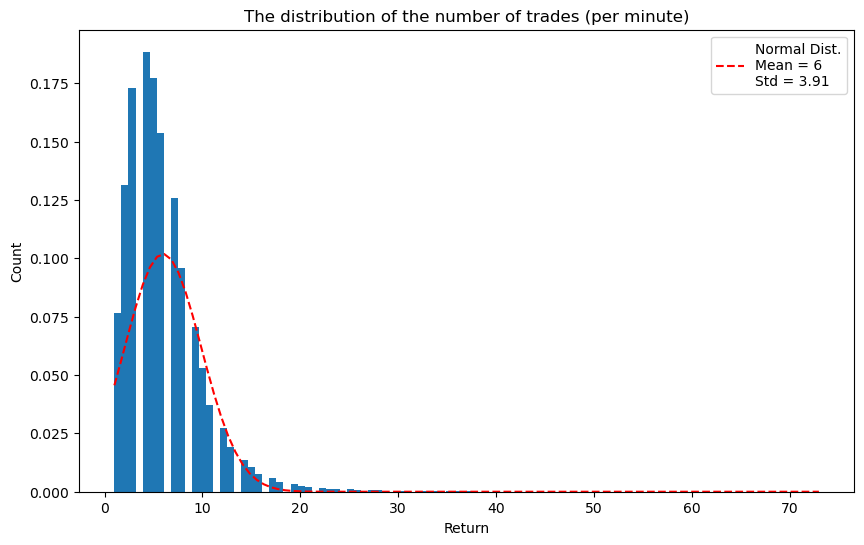

trades_number' drift (per minute): 5.964897263620339
trades_number' volatility (per minute): 391.48%
trades_number' annualized volatility: 283813.11%


In [30]:
from scipy.stats import norm


trades_number  = np.array(contract_stressed[['minute', 'price']].groupby('minute').count().reset_index()['price'])
mean = np.mean(trades_number) 
std_dev = np.std(trades_number) # Step 3: Plot the histogram of the trades_number 
x = np.linspace(min(trades_number), max(trades_number), 100) 
gaussian_pdf = norm.pdf(x, mean, std_dev) # Plot the Gaussian curve 
 
plt.figure(figsize=(10,6))
plt.hist(trades_number,density=True, bins=100)
plt.plot(x, gaussian_pdf, 'r--', label=f'Normal Dist.\nMean = 6\nStd = 3.91') 
plt.title("The distribution of the number of trades (per minute)")
plt.xlabel("Return")
plt.ylabel("Count")
plt.legend()
plt.show()
print(f"trades_number' drift (per minute): {trades_number.mean()}")
print(f"trades_number' volatility (per minute): {round(100*trades_number.std(),2)}%")
print(f"trades_number' annualized volatility: {round(np.sqrt(60*24*365)*100*trades_number.std(),2)}%")

In [82]:
np.mean(trades_number)

5.964897263620339

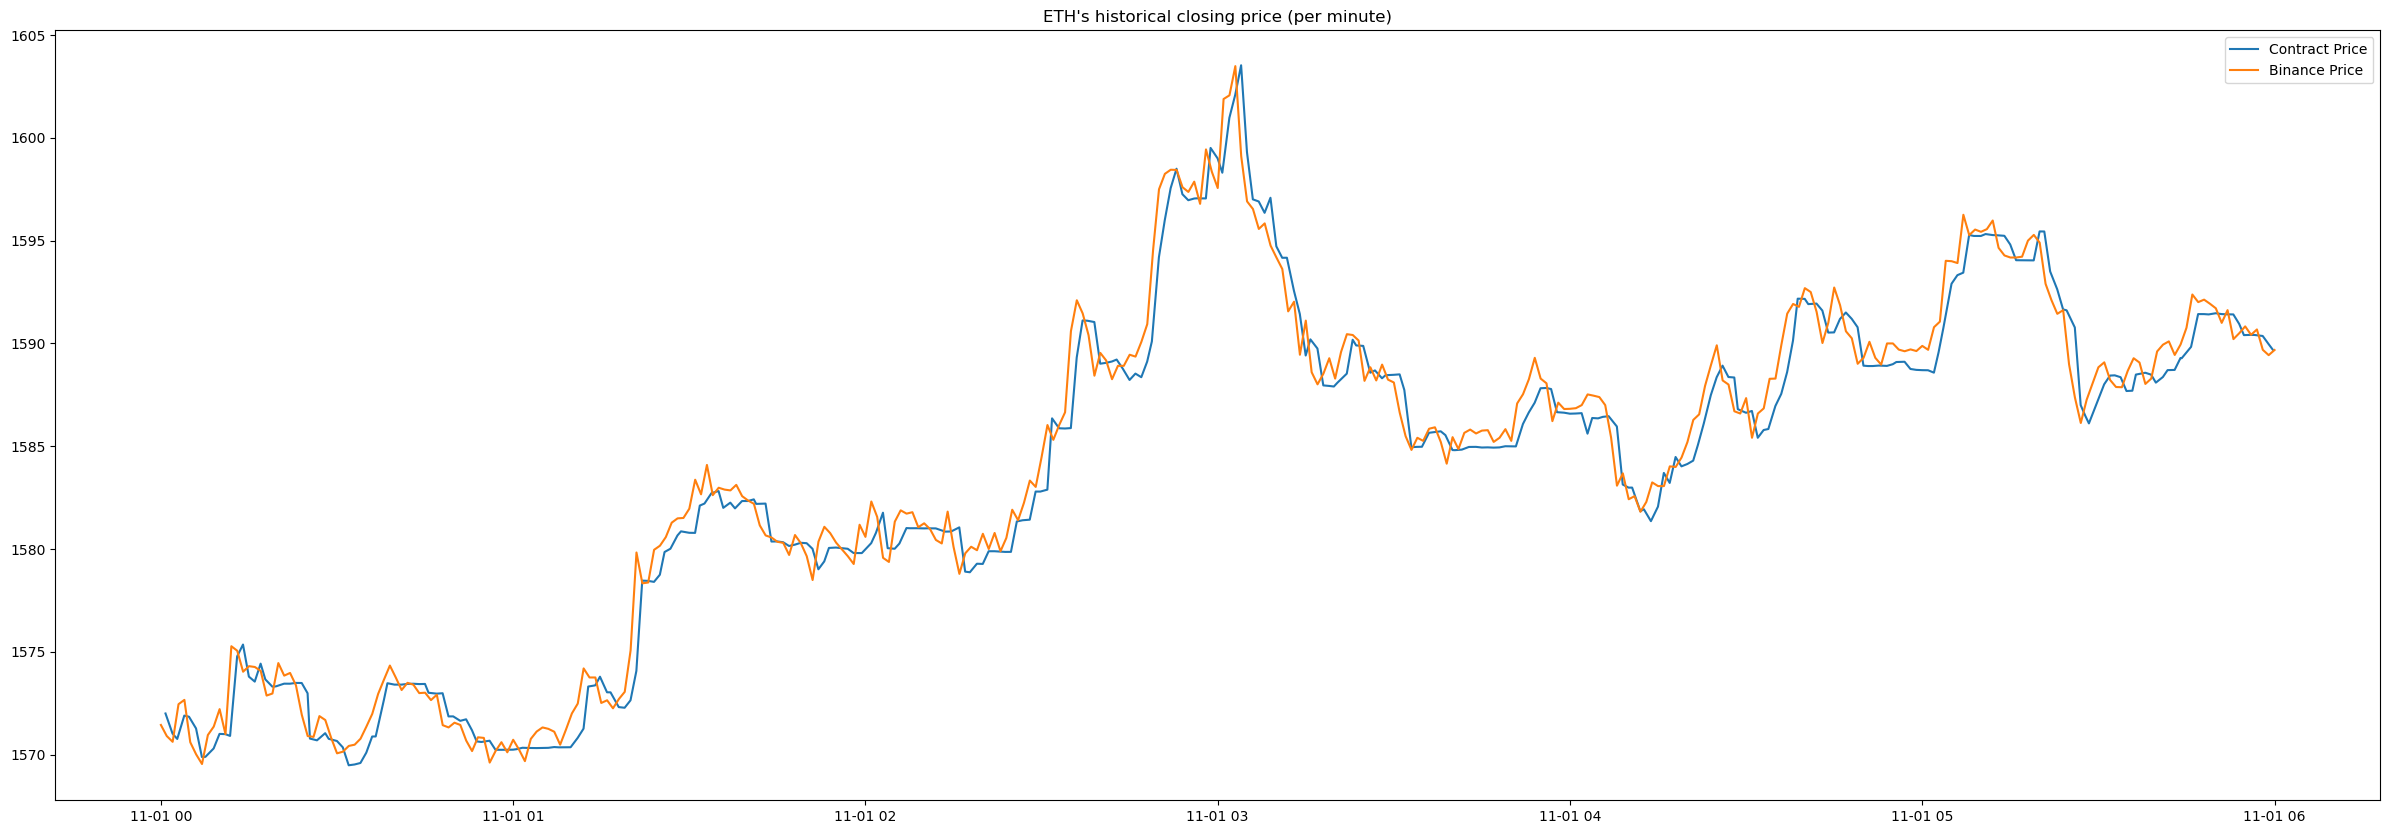

In [334]:
start_date, end_date = pd.Timestamp(2022,11,1), pd.Timestamp(2022,11,1,6)
ftx_mask = (binance['Timestamp']>= start_date) & (binance['Timestamp'] <= end_date)
contract_ftx_mask = (minute_contract_stressed['timestamp'] >= start_date) & (minute_contract_stressed['timestamp'] <= end_date)

plt.figure(figsize=(30, 10))
plt.plot(minute_contract_stressed[contract_ftx_mask]['timestamp'],minute_contract_stressed[contract_ftx_mask]['price'], label = 'Contract Price')
plt.plot(binance[ftx_mask]['Timestamp'],binance[ftx_mask]['Close'], label = 'Binance Price')
plt.legend()
plt.title("ETH's historical closing price (per minute)")
plt.show()

In [66]:
binance_hf = pd.read_csv('../../Binance_data_ETHUSDT_2022_10_1_to_2022_11_15.csv')
binance_hf['Timestamp'] = pd.to_datetime(binance_hf['Timestamp'], dayfirst=True)
binance_hf.head()

Timestamp     Open     High      Low    Close    Volume
0 2022-09-30 22:00:00  1323.18  1323.33  1323.17  1323.32    2.7116
1 2022-09-30 22:00:01  1323.32  1323.32  1323.20  1323.20    3.9430
2 2022-09-30 22:00:02  1323.18  1323.18  1323.06  1323.15    8.2254
3 2022-09-30 22:00:03  1323.15  1323.15  1323.01  1323.02   13.1834
4 2022-09-30 22:00:04  1323.02  1323.02  1321.45  1321.57  542.8932

# Per sec Binance price vs Highest freq Uniswap price

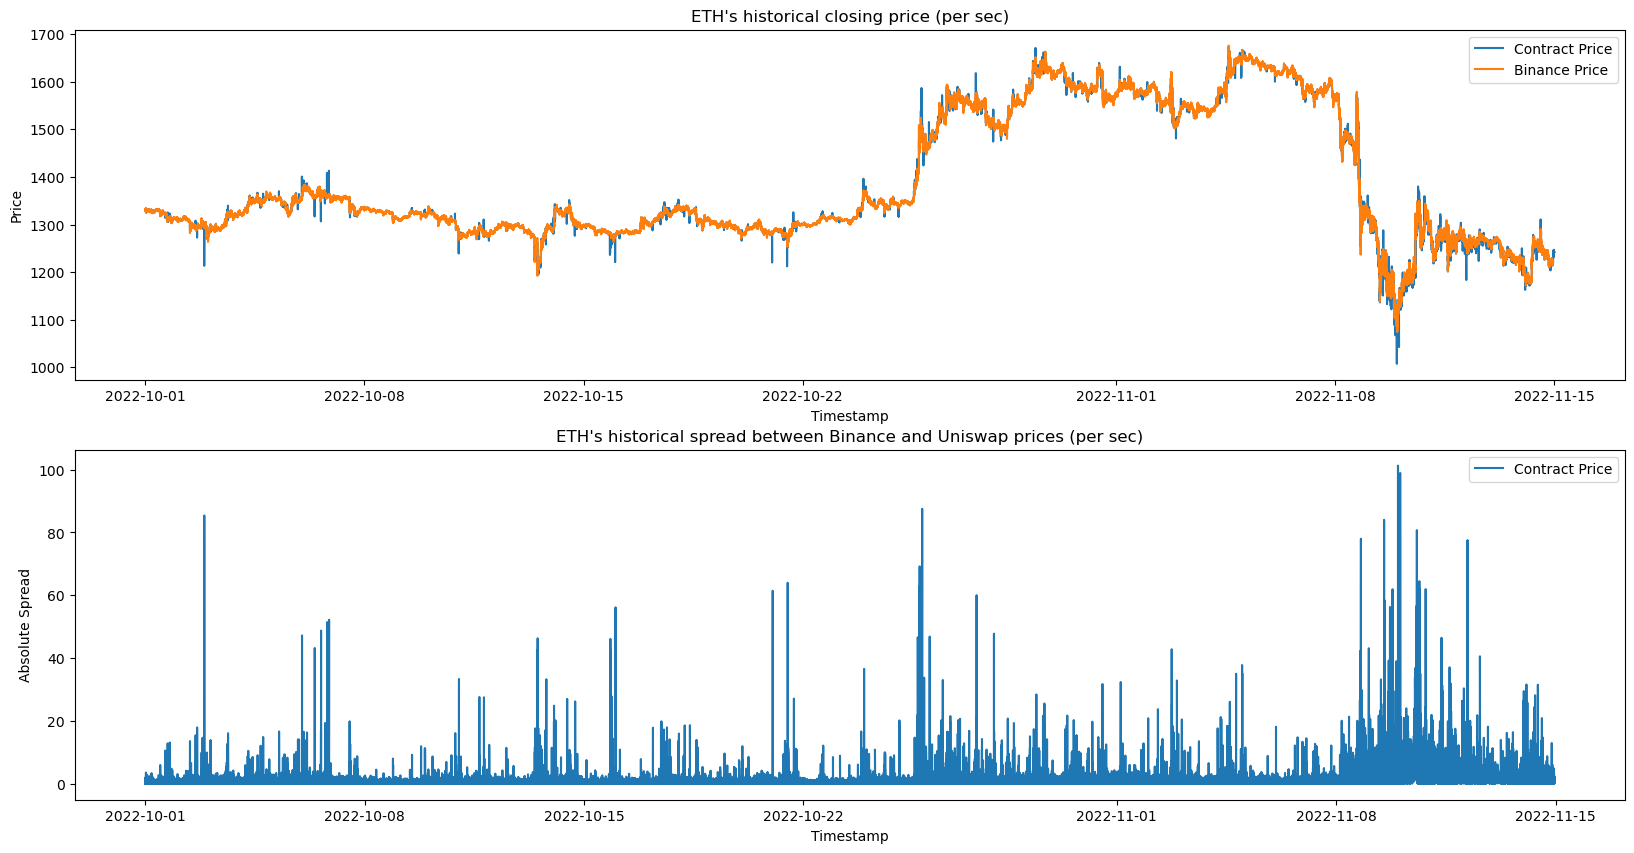

In [70]:
start_date, end_date = pd.Timestamp(2022,10,1), pd.Timestamp(2022,11,15,0)
ftx_mask = (binance_hf['Timestamp']>= start_date) & (binance_hf['Timestamp'] <= end_date)
contract_ftx_mask = (contract_stressed['timestamp'] >= start_date) & (contract_stressed['timestamp'] <= end_date)

c = contract_stressed[contract_ftx_mask]
b = binance_hf[ftx_mask]
spread = b.merge(c, left_on='Timestamp', right_on='timestamp', how='left')[['Timestamp','Close','price']].ffill().bfill()
spread['spread'] = abs(spread['Close']-spread['price'])

fig, axs = plt.subplots(2, figsize=(20, 10))
axs[0].step(contract_stressed[contract_ftx_mask]['timestamp'],contract_stressed[contract_ftx_mask]['price'], label = 'Contract Price')
axs[0].step(binance_hf[ftx_mask]['Timestamp'],binance_hf[ftx_mask]['Close'], label = 'Binance Price')
axs[0].legend()
axs[0].set_title("ETH's historical closing price (per sec)")
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Price')

axs[1].step(spread.Timestamp, spread.spread, label = 'Contract Price')
axs[1].legend()
axs[1].set_title("ETH's historical spread between Binance and Uniswap prices (per sec)")
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Absolute Spread')

plt.show()

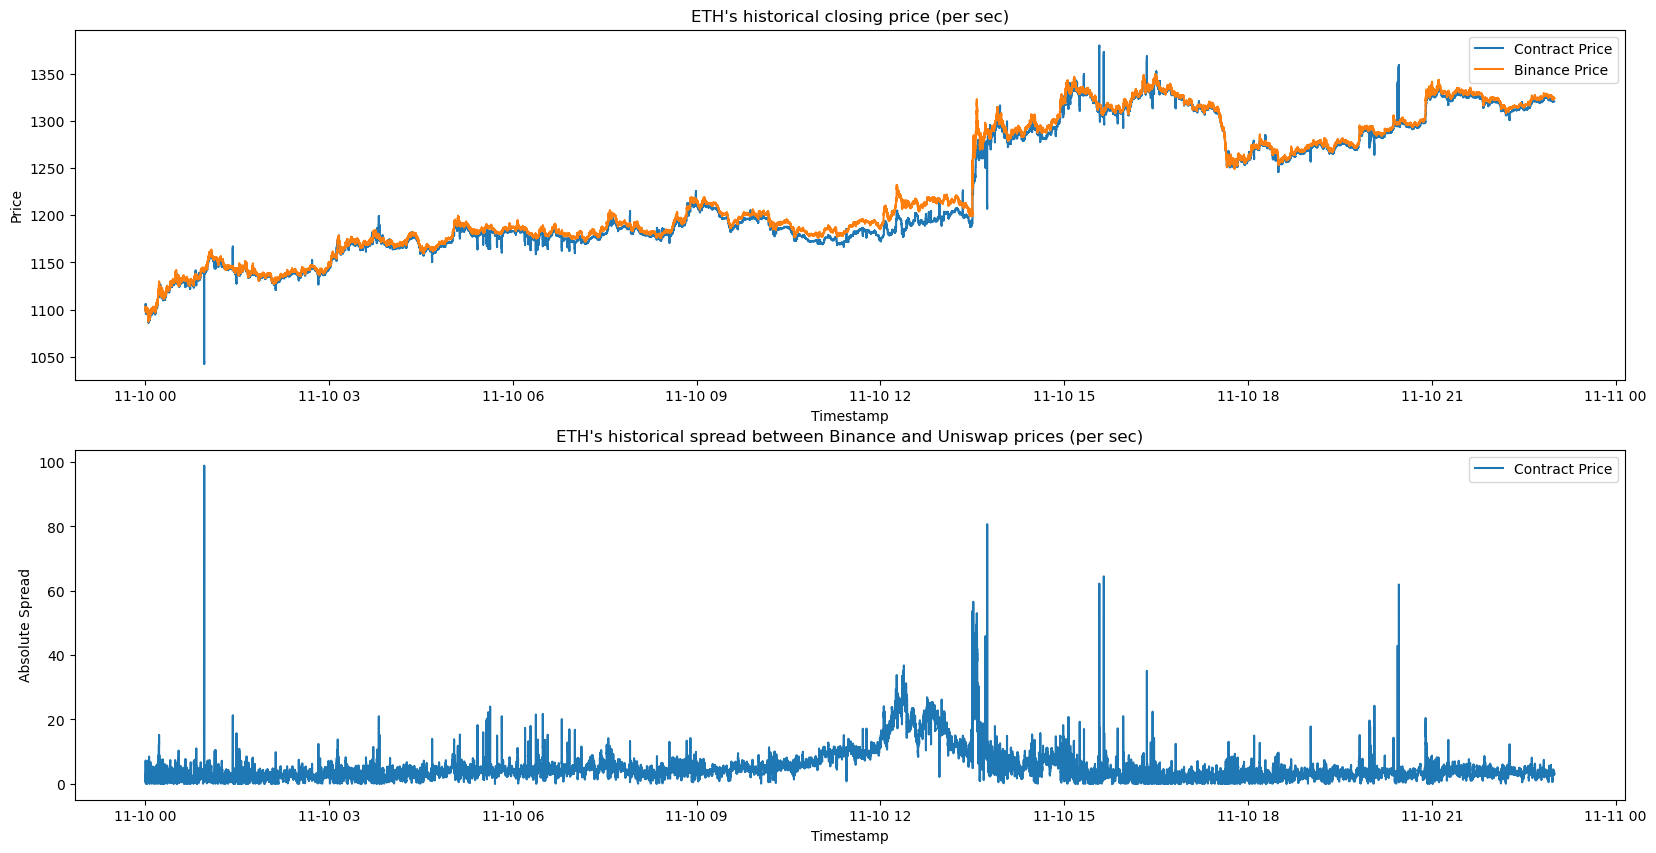

In [76]:
start_date, end_date = pd.Timestamp(2022,11,10, 0), pd.Timestamp(2022,11,10,23)
ftx_mask = (binance_hf['Timestamp']>= start_date) & (binance_hf['Timestamp'] <= end_date)
contract_ftx_mask = (contract_stressed['timestamp'] >= start_date) & (contract_stressed['timestamp'] <= end_date)

c = contract_stressed[contract_ftx_mask]
b = binance_hf[ftx_mask]
spread = b.merge(c, left_on='Timestamp', right_on='timestamp', how='left')[['Timestamp','Close','price']].ffill().bfill()
spread['spread'] = abs(spread['Close']-spread['price'])

fig, axs = plt.subplots(2, figsize=(20, 10))
axs[0].step(contract_stressed[contract_ftx_mask]['timestamp'],contract_stressed[contract_ftx_mask]['price'], label = 'Contract Price')
axs[0].step(binance_hf[ftx_mask]['Timestamp'],binance_hf[ftx_mask]['Close'], label = 'Binance Price')
axs[0].legend()
axs[0].set_title("ETH's historical closing price (per sec)")
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Price')

axs[1].step(spread.Timestamp, spread.spread, label = 'Contract Price')
axs[1].legend()
axs[1].set_title("ETH's historical spread between Binance and Uniswap prices (per sec)")
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Absolute Spread')

plt.show()

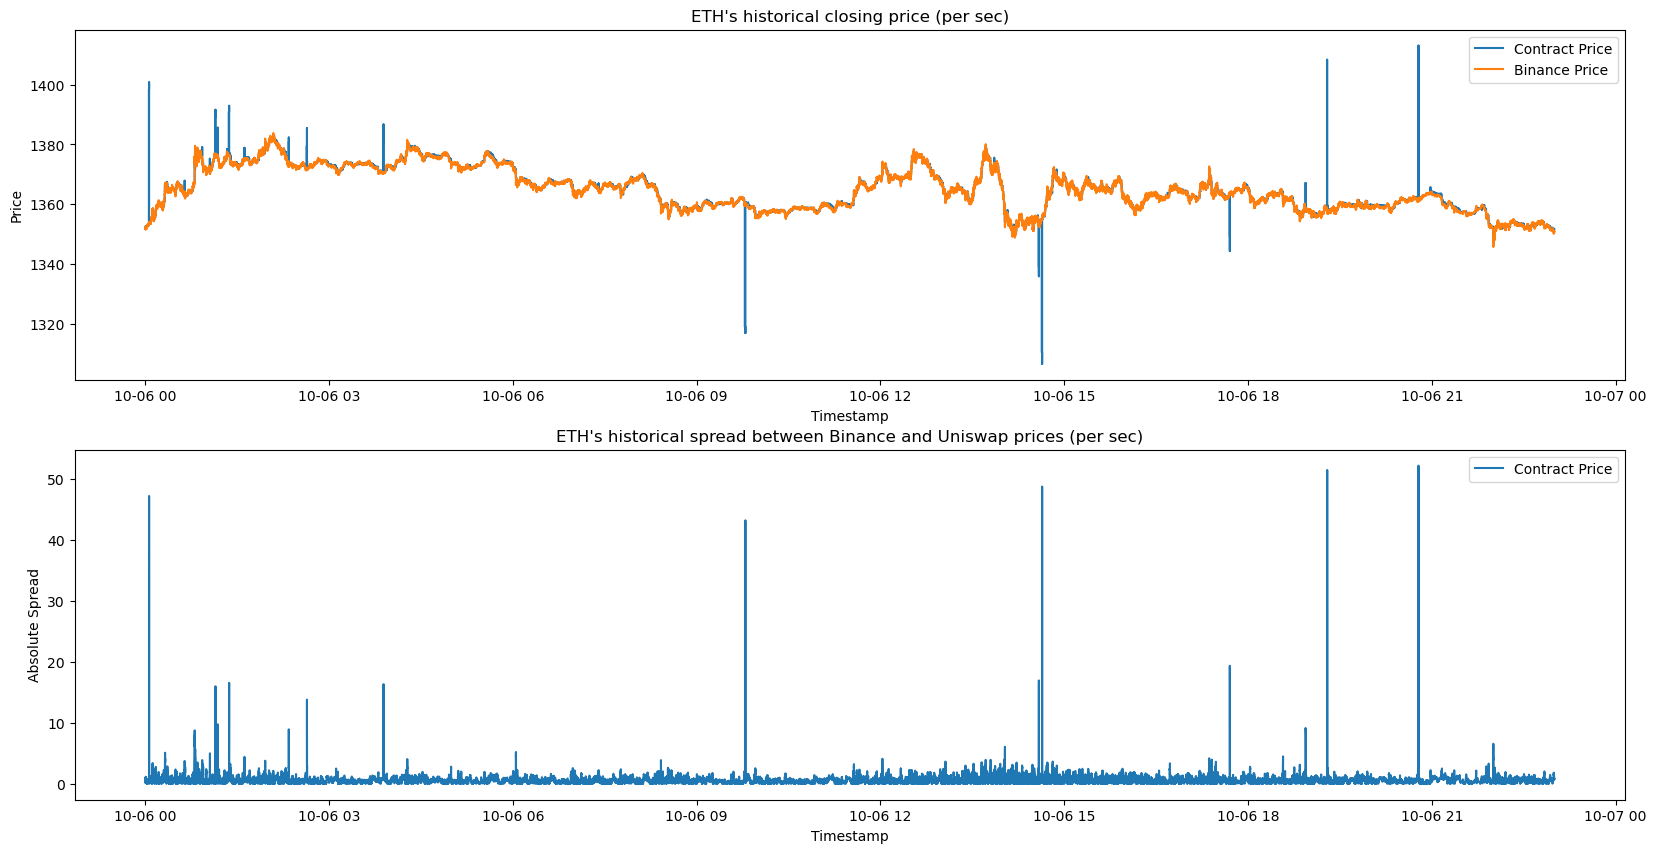

In [75]:
start_date, end_date = pd.Timestamp(2022,10,6, 0), pd.Timestamp(2022,10,6,23)
ftx_mask = (binance_hf['Timestamp']>= start_date) & (binance_hf['Timestamp'] <= end_date)
contract_ftx_mask = (contract_stressed['timestamp'] >= start_date) & (contract_stressed['timestamp'] <= end_date)

c = contract_stressed[contract_ftx_mask]
b = binance_hf[ftx_mask]
spread = b.merge(c, left_on='Timestamp', right_on='timestamp', how='left')[['Timestamp','Close','price']].ffill().bfill()
spread['spread'] = abs(spread['Close']-spread['price'])

fig, axs = plt.subplots(2, figsize=(20, 10))
axs[0].step(contract_stressed[contract_ftx_mask]['timestamp'],contract_stressed[contract_ftx_mask]['price'], label = 'Contract Price')
axs[0].step(binance_hf[ftx_mask]['Timestamp'],binance_hf[ftx_mask]['Close'], label = 'Binance Price')
axs[0].legend()
axs[0].set_title("ETH's historical closing price (per sec)")
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Price')

axs[1].step(spread.Timestamp, spread.spread, label = 'Contract Price')
axs[1].legend()
axs[1].set_title("ETH's historical spread between Binance and Uniswap prices (per sec)")
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Absolute Spread')

plt.show()

# P&L Analysis of an LP (active on FTX collapse day)

## LP's activity

In [39]:
lp_id = "0x86426AD2B71f41a5d545E5e2F63c76913D93E1A5"

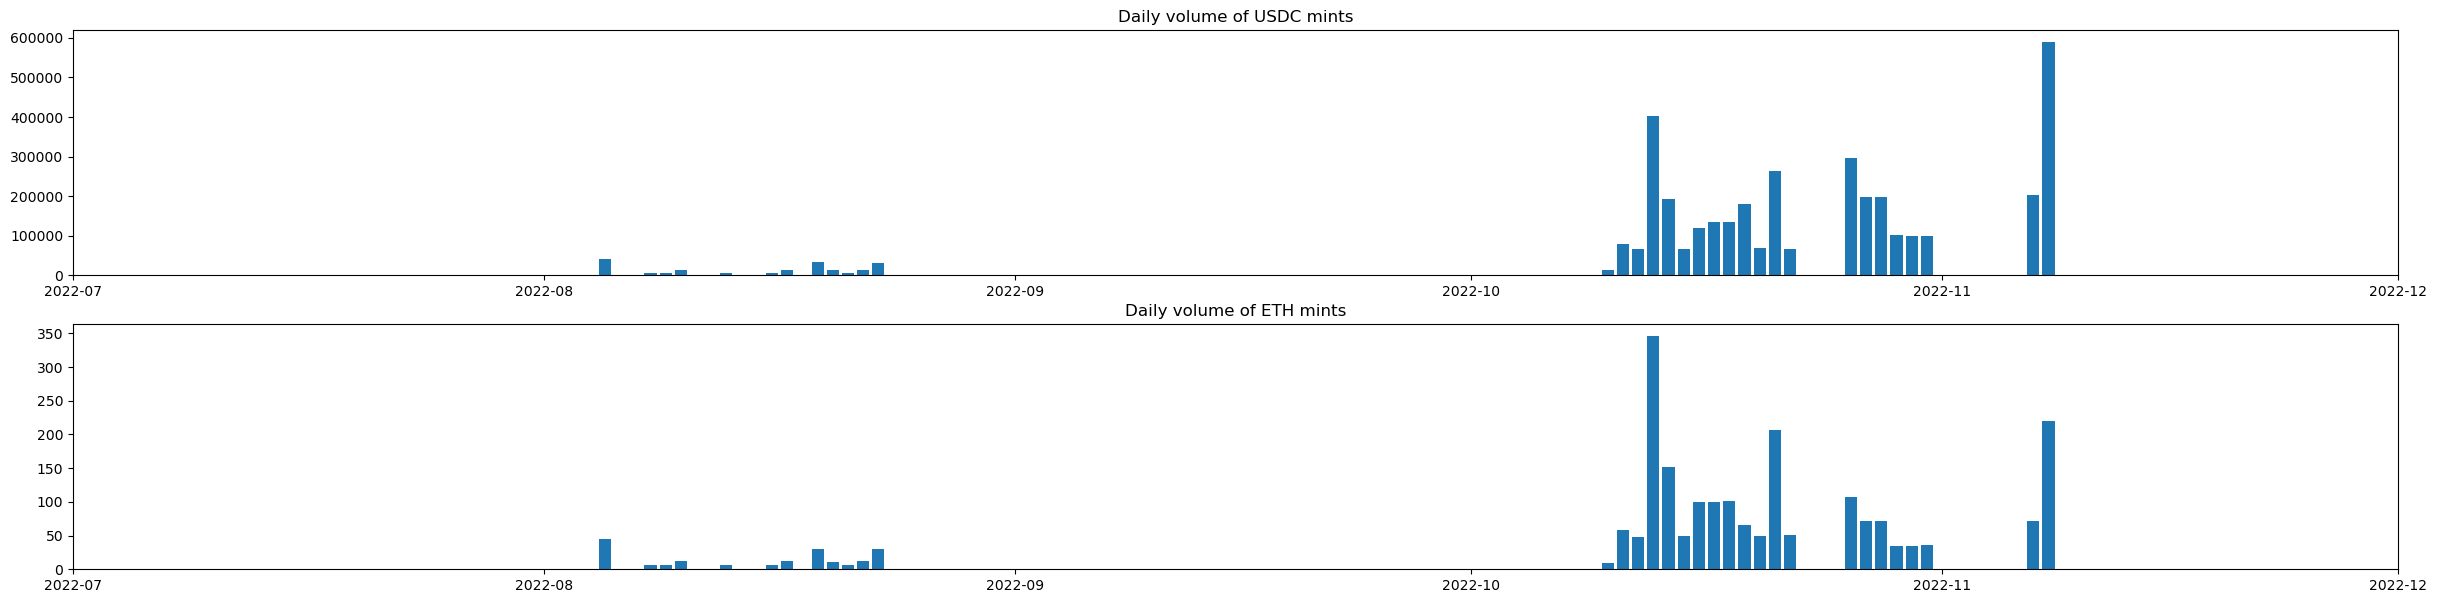

In [43]:
hist_mint = mints[(mints['owner']==lp_id)][['amount0','amount1','Day']].groupby('Day').sum().reset_index()
hist_mint.head()
start_timestamp, end_timestamp = pd.Timestamp(2022, 8, 1), pd.Timestamp(2022, 12, 1)
fig, axs = plt.subplots(2, figsize=(30, 7))
axs[0].set_xlim(start_timestamp, end_timestamp)
axs[0].bar(hist_mint.Day, hist_mint.amount0)
axs[0].set_title("Daily volume of USDC mints")
axs[1].set_xlim(start_timestamp, end_timestamp)
axs[1].bar(hist_mint.Day, hist_mint.amount1)
axs[1].set_title("Daily volume of ETH mints")
plt.show()

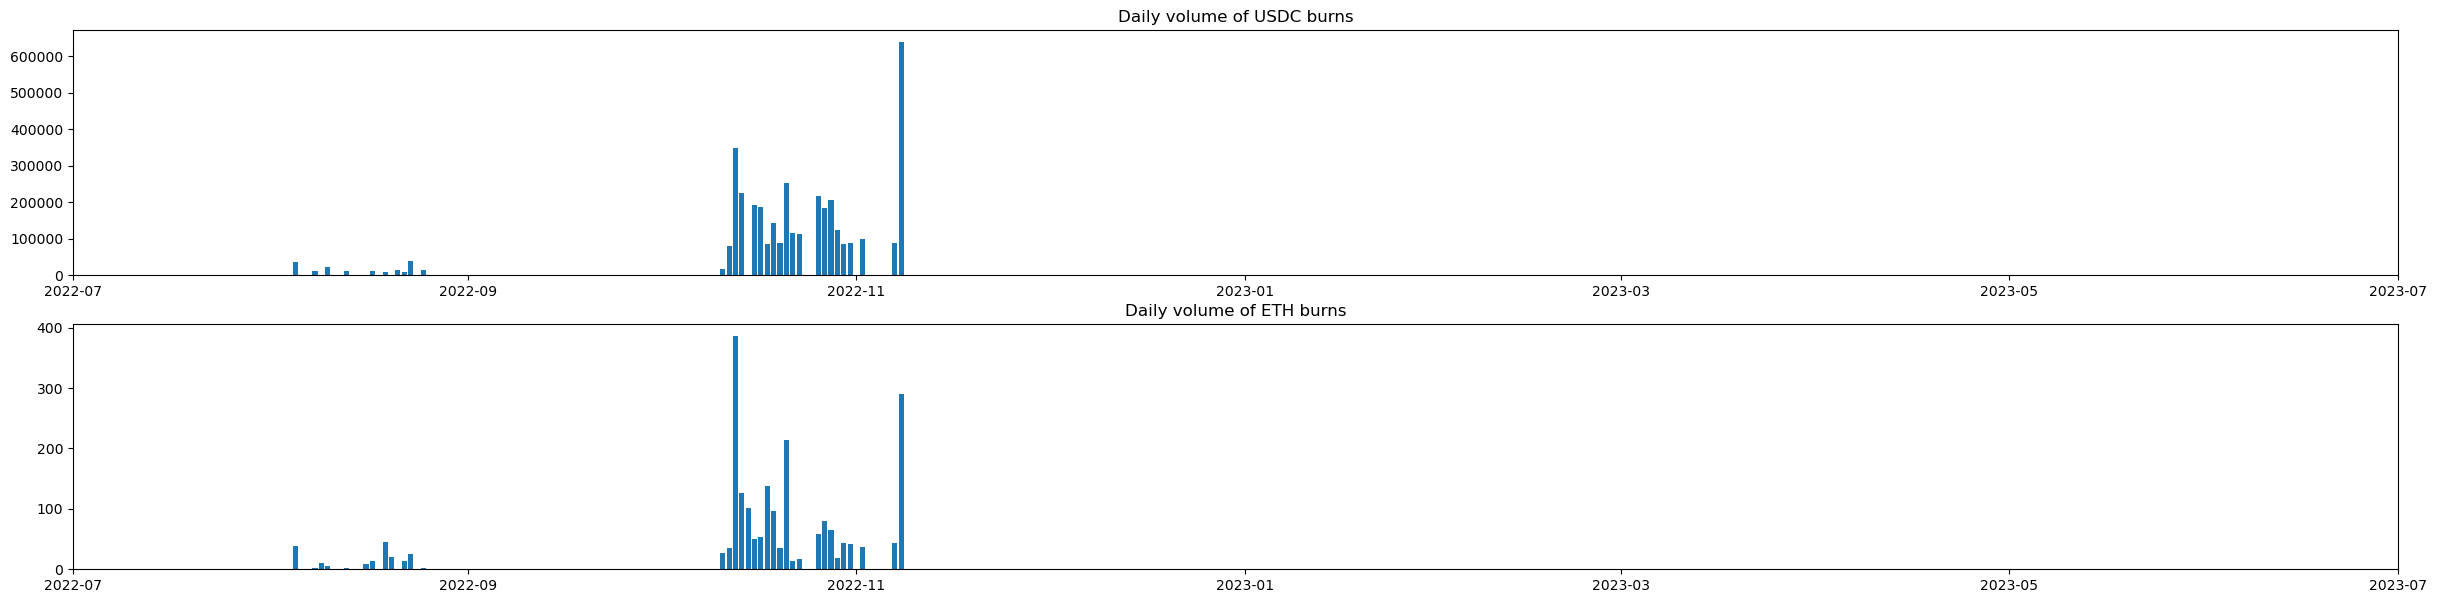

In [339]:
hist_bur = burns[(burns['owner']==lp_id)][['liquidity','amount0','amount1','Day']].groupby('Day').sum().reset_index()
start_timestamp, end_timestamp = pd.Timestamp(2022, 7, 1), pd.Timestamp(2023, 7, 1)
fig, axs = plt.subplots(2, figsize=(30, 7))
axs[0].set_xlim(start_timestamp, end_timestamp)
axs[0].bar(hist_bur.Day, hist_bur.amount0)
axs[0].set_title("Daily volume of USDC burns")
axs[1].set_xlim(start_timestamp, end_timestamp)
axs[1].bar(hist_bur.Day, hist_bur.amount1)
axs[1].set_title("Daily volume of ETH burns")
plt.show()

In [340]:
hist_bur[hist_bur['Day'] <= pd.Timestamp(2022,12,29).date()]

Day     liquidity        amount0     amount1
0   2022-08-05  3.387083e+04   36436.743735   38.210729
1   2022-08-08  5.625706e+03   12832.708506    2.415510
2   2022-08-09  5.674796e+03       0.000000    9.877545
3   2022-08-10  1.121086e+04   23869.222517    5.909393
4   2022-08-13  5.359139e+03   12508.563333    2.386607
5   2022-08-16  5.686177e+03       0.000000    9.381787
6   2022-08-17  1.624914e+04   10668.912602   13.452249
7   2022-08-19  5.241795e+04    8212.205927   44.941299
8   2022-08-20  1.988851e+04       0.000000   19.635165
9   2022-08-21  9.629546e+03   13482.709099    1.156281
10  2022-08-22  2.005544e+04    8781.576797   14.428261
11  2022-08-23  5.060106e+04   39411.331429   25.581318
12  2022-08-25  1.033040e+04   14513.856250    1.338650
13  2022-09-18  2.613038e+02       0.000000    1.047811
14  2022-09-27  2.528646e+02     783.811883    0.490873
15  2022-10-11  7.083010e+04   16395.492964   27.424540
16  2022-10-12  1.733406e+05   80514.103575   36.011635
17  2022-10-13  1.154369e+06  349615.748048  386.285857
18  2022-10-14  5.306094e+05  226459.356977  125.968791
19  2022-10-15  1.777083e+05       0.000000  100.812679
20  2022-10-16  3.501007e+05  192190.780476   49.871808
21  2022-10-17  3.472286e+05  187029.820554   53.127540
22  2022-10-18  3.611838e+05   85843.798174  137.697555
23  2022-10-19  2.842888e+05  142206.273320   95.956929
24  2022-10-20  1.816226e+05   88223.741266   34.830431
25  2022-10-21  7.229625e+05  252859.839066  214.445533
26  2022-10-22  1.830001e+05  116400.216451   14.156451
27  2022-10-23  1.826970e+05  113796.008569   16.488387
28  2022-10-26  6.009566e+04  218115.797007   57.735988
29  2022-10-27  5.969850e+04  183966.329549   79.569405
30  2022-10-28  6.027810e+04  207491.456574   65.063020
31  2022-10-29  3.004954e+04  124829.849476   19.311793
32  2022-10-30  2.976764e+04   87062.455595   42.992844
33  2022-10-31  2.975450e+04   87515.894116   42.166354
34  2022-11-02  2.998210e+04   98113.377000   36.285189
35  2022-11-07  3.055428e+04   88423.896654   44.220971
36  2022-11-08  2.128161e+05  639745.466373  290.517198

In [341]:
collects = pd.read_csv('../../historical_collects.csv')
collects['timestamp'] = pd.to_datetime(collects['timestamp'])
collects['Day'] = collects.timestamp.dt.date
collects.head()

block_number           timestamp  \
0      15000223 2022-06-21 03:29:10   
1      15000227 2022-06-21 03:30:35   
2      15000413 2022-06-21 04:22:07   
3      15000685 2022-06-21 05:26:45   
4      15000702 2022-06-21 05:31:43   

                                        owner  tickLower  tickUpper  \
0  0xC36442b4a4522E871399CD717aBDD847Ab11FE88     201940     208300   
1  0xC36442b4a4522E871399CD717aBDD847Ab11FE88     201940     208300   
2  0xC36442b4a4522E871399CD717aBDD847Ab11FE88     205490     206540   
3  0xC36442b4a4522E871399CD717aBDD847Ab11FE88     201960     208200   
4  0xC36442b4a4522E871399CD717aBDD847Ab11FE88     207650     207860   

         amount0     amount1         Day  
0   10220.925428    8.906536  2022-06-21  
1   91228.646008  151.583922  2022-06-21  
2   92027.937964  109.012750  2022-06-21  
3   20246.439939   29.883500  2022-06-21  
4  199999.999999    0.000000  2022-06-21

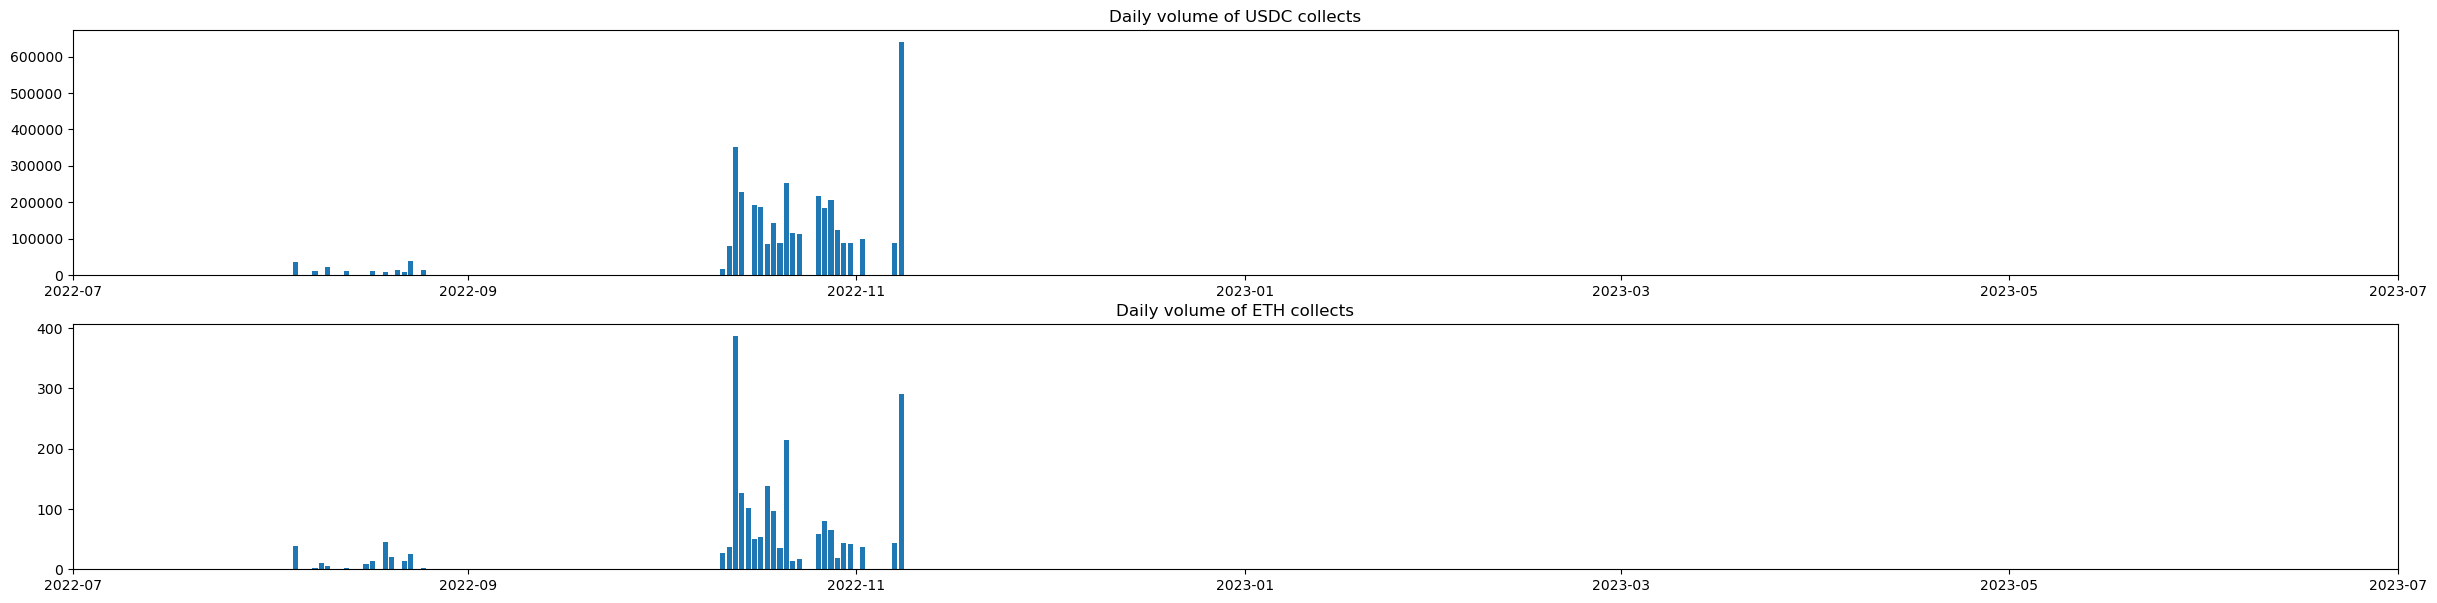

In [342]:
hist_col = collects[(collects['owner']==lp_id)][['amount0','amount1','Day']].groupby('Day').sum().reset_index()
hist_col.head()
start_timestamp, end_timestamp = pd.Timestamp(2022, 7, 1), pd.Timestamp(2023, 7, 1)
fig, axs = plt.subplots(2, figsize=(30, 7))
axs[0].set_xlim(start_timestamp, end_timestamp)
axs[0].bar(hist_col.Day, hist_col.amount0)
axs[0].set_title("Daily volume of USDC collects")
axs[1].set_xlim(start_timestamp, end_timestamp)
axs[1].bar(hist_col.Day, hist_col.amount1)
axs[1].set_title("Daily volume of ETH collects")
plt.show()

#### Sanity Check :  The LP closed all his positions

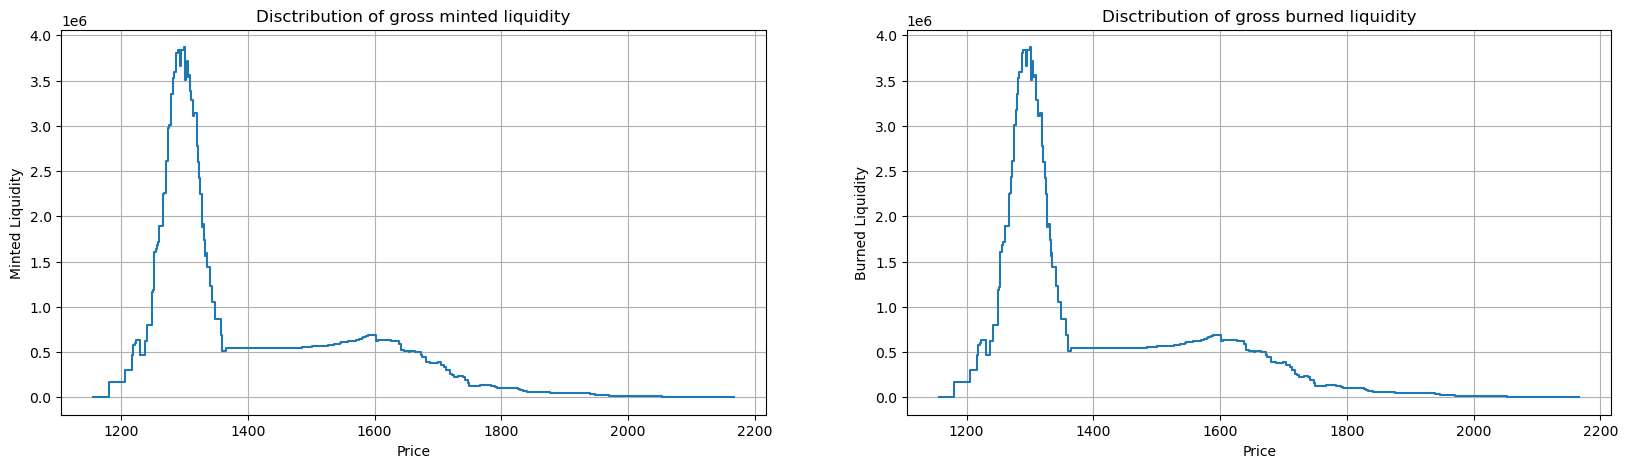

In [55]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))

start_date, end_date = pd.Timestamp(2022,7,1), pd.Timestamp(2022,11,9)
p,l = plot_user_dist(lp_id, mints, start_date, end_date) 

axs[0].step(p, l, where='post')
axs[0].set_title(f'Disctribution of gross minted liquidity')
axs[0].grid(True)
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Minted Liquidity')

p,l = plot_user_dist(lp_id, burns, start_date, end_date)

axs[1].step(p, l, where='post')
axs[1].set_title(f'Disctribution of gross burned liquidity')
axs[1].grid(True)
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Burned Liquidity')

plt.show()

## Sanity Check: Minted volume = Burned volume

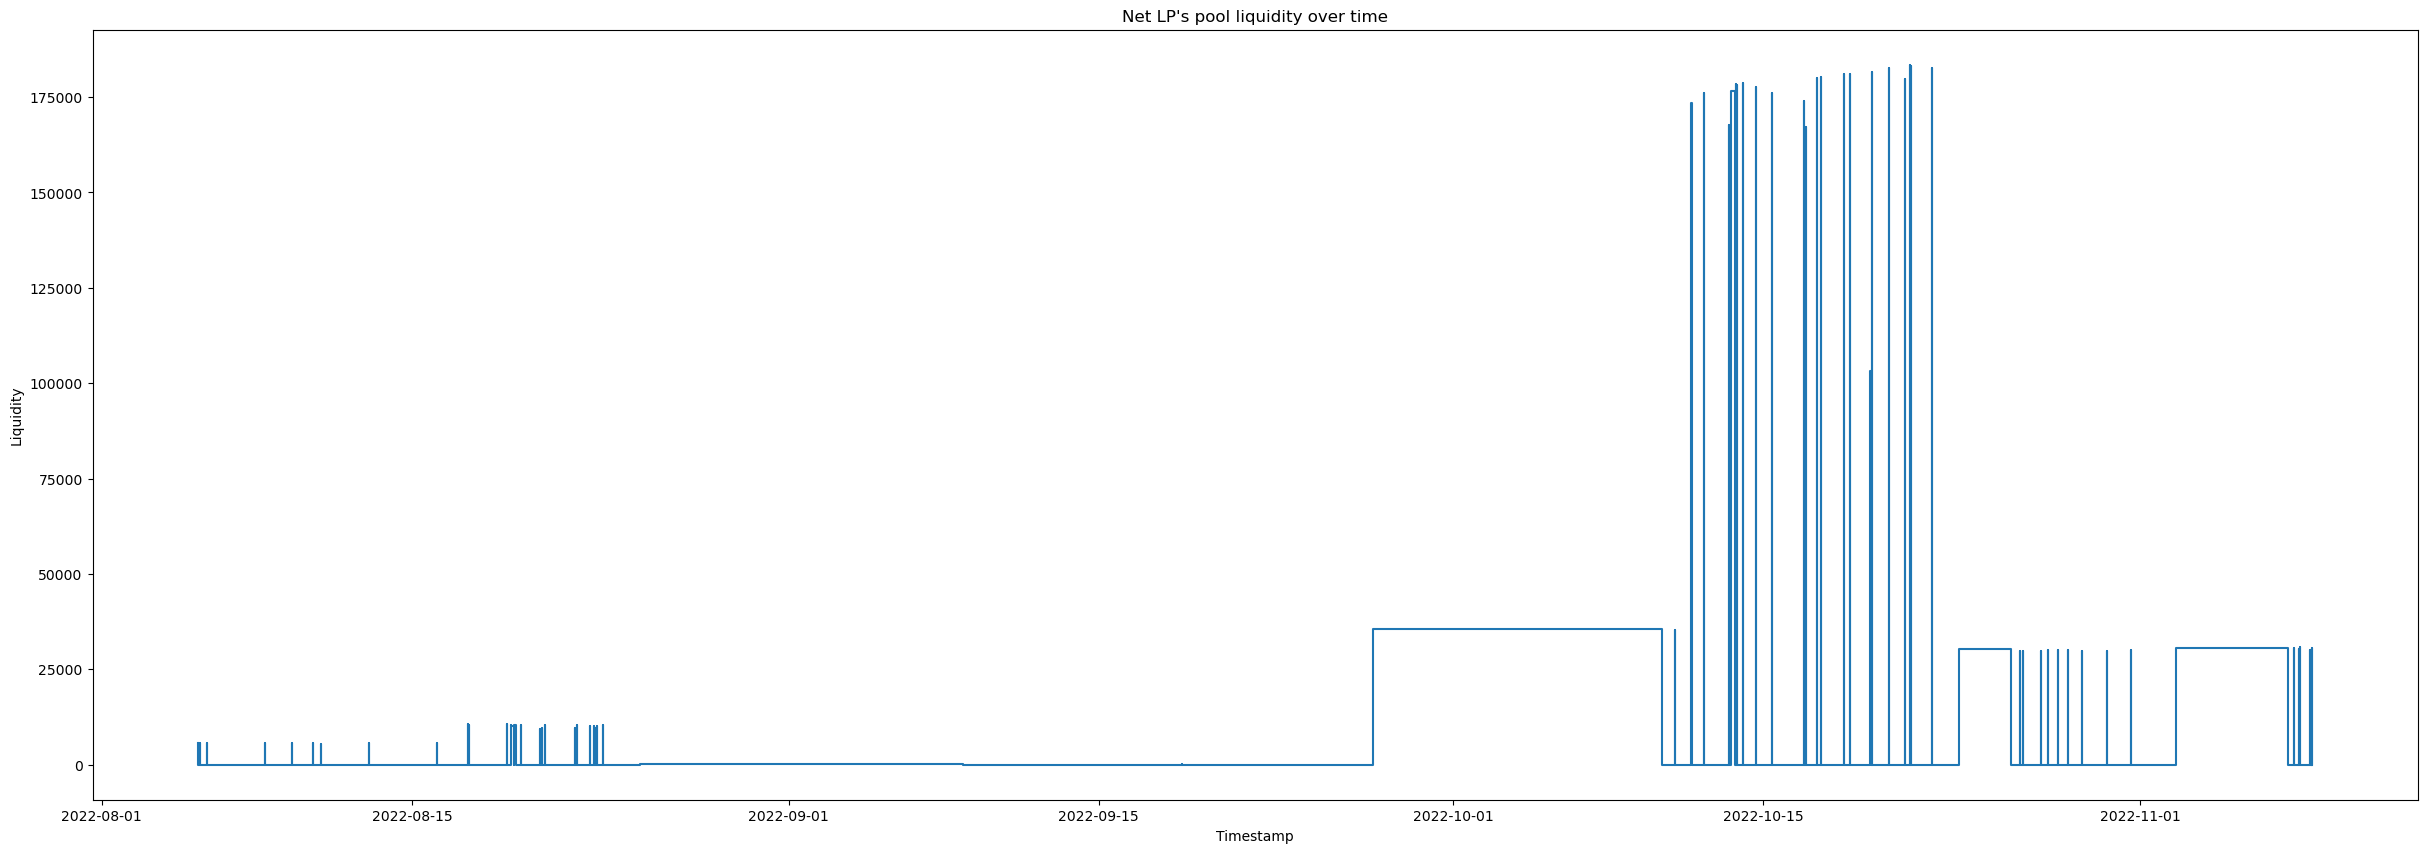

In [344]:
lp_mints = mints[mints['owner']==lp_id][['timestamp','tickLower', 'tickUpper','liquidity', 'amount0', 'amount1']]
lp_burns = burns[burns['owner']==lp_id][['timestamp','tickLower', 'tickUpper','liquidity', 'amount0', 'amount1']]
lp_collects = collects[collects['owner']==lp_id][['timestamp','tickLower', 'tickUpper', 'amount0', 'amount1']]

lp_mints['amount0'] = - lp_mints['amount0']
lp_mints['amount1'] = - lp_mints['amount1']
lp_mints['liquidity'] = - lp_mints['liquidity']
lp_ops = pd.concat([lp_burns, lp_mints]).sort_values(by='timestamp')

lp_ops['cum_amount0'] = lp_ops['amount0'].cumsum()
lp_ops['cum_amount1'] = lp_ops['amount1'].cumsum()
lp_ops['cum_liquidity'] = lp_ops['liquidity'].cumsum()

plt.figure(figsize=(30,10))
plt.step(lp_ops.timestamp, -lp_ops.cum_liquidity)
plt.title("Net LP's pool liquidity over time")
plt.xlabel('Timestamp')
plt.ylabel('Liquidity')
plt.show()

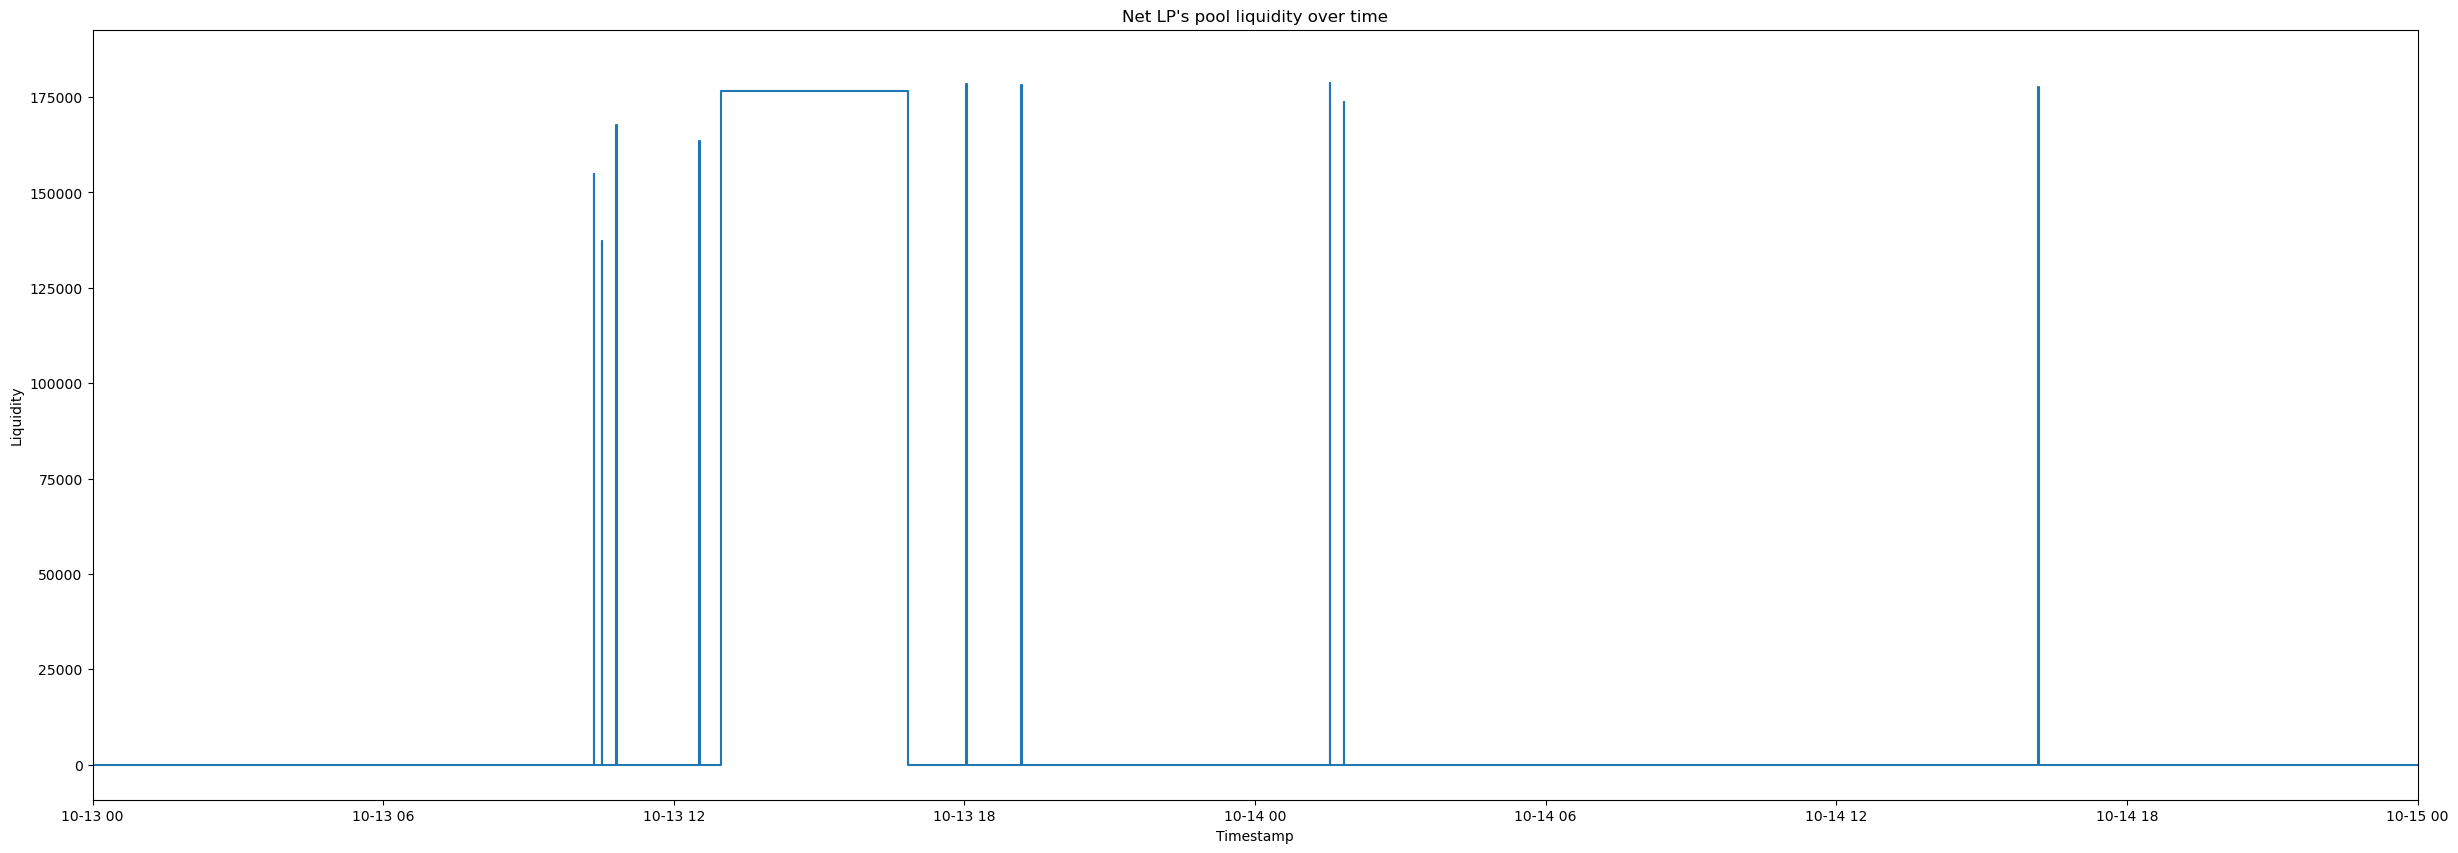

In [345]:
plt.figure(figsize=(30,10))
plt.step(lp_ops.timestamp, -lp_ops.cum_liquidity)
plt.title("Net LP's pool liquidity over time")
plt.xlabel('Timestamp')
plt.ylabel('Liquidity')
plt.xlim(pd.Timestamp(2022,10,13), pd.Timestamp(2022,10,15))
plt.show()

In [346]:
lp_mints = mints[mints['owner']==lp_id][['timestamp','tickLower', 'tickUpper', 'amount0', 'amount1']]
lp_collects = collects[collects['owner']==lp_id][['timestamp','tickLower', 'tickUpper', 'amount0', 'amount1']]
lp_mints['type'] = 'mint'
lp_collects['type'] = 'collect'
lp_pnl_ops = pd.concat([lp_collects, lp_mints]).sort_values(by='timestamp') # This LP doesnt just monitor a position, but closes it to open another

In [347]:
start_ts, end_ts = pd.concat([lp_mints, lp_collects]).sort_values(by='timestamp').timestamp.min(), pd.concat([lp_mints, lp_collects]).sort_values(by='timestamp').timestamp.max()
start_ts, end_ts = contract[contract.timestamp < start_ts].timestamp.max(), contract[contract.timestamp > end_ts].timestamp.min()
lp_prices = contract[(contract.timestamp >= start_ts)&(contract.timestamp <= end_ts)][['timestamp','price']]

In [348]:
lp_prices = lp_prices.groupby('timestamp').min().reset_index()
history_ops = lp_pnl_ops.merge(lp_prices, on='timestamp', how='left').ffill()

history_ops['pos_id'] = history_ops[['tickLower', 'tickUpper']].apply(lambda x: (x['tickLower'],x['tickUpper']), axis=1)


In [349]:
history_ops['post_price'] = history_ops['price'].shift(-1)
history_ops['value'] = history_ops.apply(lambda x: x['amount1']*x['post_price'] + x['amount0'] if x['type'] == 'mint' else x['amount1']*x['price'] + x['amount0'], axis=1)
history_ops = history_ops.sort_values(by=['pos_id', 'timestamp'])
history_ops['return'] = history_ops['value'].pct_change()
history_ops['return'] = history_ops[['type','return']].apply(lambda x: 'NaN' if x['type']=='mint' else x['return'], axis=1)

In [350]:
history_ops

timestamp  tickLower  tickUpper       amount0    amount1  \
22 2022-08-13 01:01:23     199510     200990   6387.869477   6.050114   
23 2022-08-16 03:10:29     199510     200990    124.585086   9.447408   
24 2022-08-16 03:11:01     200050     201520   6327.819240   6.111712   
25 2022-08-17 12:50:56     200050     201520   7067.770231   5.777323   
20 2022-08-10 21:29:48     200070     201550   6243.022468   5.655385   
..                 ...        ...        ...           ...        ...   
81 2022-10-13 12:30:59     204870     205280    153.325746  97.604364   
78 2022-10-13 10:31:11     204960     205370  37549.514352  49.380395   
79 2022-10-13 10:48:59     204960     205370  73173.684209  20.597223   
82 2022-10-13 12:32:23     205170     205580  55358.212991  50.164676   
83 2022-10-13 12:57:59     205170     205580  81250.683974  29.043690   

       type        price            pos_id   post_price          value  \
22     mint  1967.357684  (199510, 200990)  1865.281636   17673.035454   
23  collect  1865.281636  (199510, 200990)  1865.902506   17746.662331   
24     mint  1865.902506  (200050, 201520)  1877.245376   17801.002058   
25  collect  1877.245376  (200050, 201520)  1876.173483   17913.223932   
20     mint  1866.276802  (200070, 201550)  1968.645556   17376.470544   
..      ...          ...               ...          ...            ...   
81  collect  1212.024823  (204870, 205280)  1203.081985  118452.237438   
78     mint  1224.330678  (204960, 205370)  1243.007569   98929.718594   
79  collect  1243.007569  (204960, 205370)  1243.950482   98776.187761   
82     mint  1203.081985  (205170, 205580)  1215.228927  116319.778904   
83  collect  1215.228927  (205170, 205580)  1267.353300  116545.416328   

      return  
22       NaN  
23  0.004166  
24       NaN  
25  0.006304  
20       NaN  
..       ...  
81  -0.00527  
78       NaN  
79 -0.001552  
82       NaN  
83   0.00194  

[162 rows x 11 columns]

In [351]:

mint_events = history_ops[history_ops['type'] == 'mint']
collect_events = history_ops[history_ops['type'] == 'collect']

# Function to calculate the values for each position
def calculate_position_values(position_id):
    # Filter events for the current position
    mint_pos = mint_events[mint_events['pos_id'] == position_id]
    collect_pos = collect_events[collect_events['pos_id'] == position_id]
    
    if mint_pos.empty or collect_pos.empty:
        return None
    
    most_recent_collect = collect_pos.iloc[-1]
    most_recent_collect_time = most_recent_collect['timestamp']

    mint_pos = mint_pos[mint_pos['timestamp']<=most_recent_collect_time]

    if mint_pos.empty:
        return None


    total_minted_eth = mint_pos['amount1'].sum()
    total_minted_usdc = mint_pos['amount0'].sum()
    
    most_recent_spot_price = most_recent_collect['price']
    
    # Value the total minted amount in USDC at the most recent spot price
    total_minted_value_usdc = total_minted_eth * most_recent_spot_price + total_minted_usdc
    
    # Value each collected amount with its spot price
    collect_pos['collect_value_usdc'] = collect_pos['amount1'] * collect_pos['price'] + collect_pos['amount0']
    total_collected_value_usdc = collect_pos['collect_value_usdc'].sum()
    
    # Calculate return
    position_return = (total_collected_value_usdc - total_minted_value_usdc) / total_minted_value_usdc
    
    return {
        'timestamp': collect_pos.timestamp.iloc[-1],
        'pos_id': position_id,
        'total_minted_value_usdc': total_minted_value_usdc,
        'total_collected_value_usdc': total_collected_value_usdc,
        'return': position_return
    }


position_ids = history_ops['pos_id'].unique()

position_values = [calculate_position_values(pos_id) for pos_id in position_ids]

result_df = pd.DataFrame([pv for pv in position_values if pv is not None])


## Returns per position (IL)

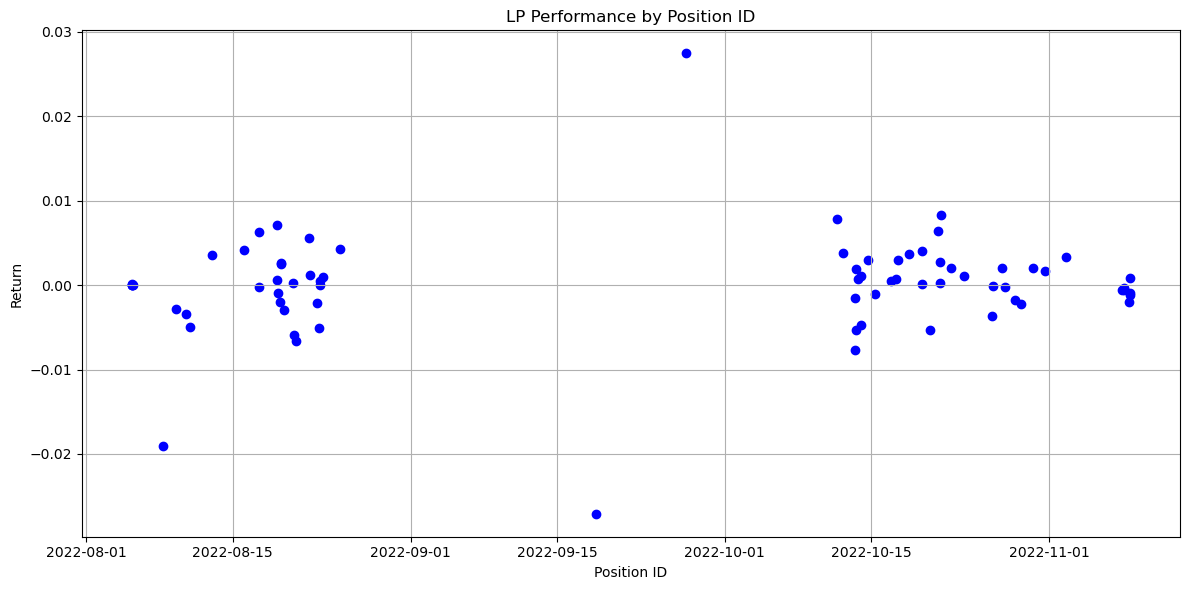

In [352]:
plt.figure(figsize=(12, 6))
plt.scatter(result_df.timestamp, result_df['return'], marker='o', linestyle='-', color='b')
plt.xlabel('Position ID')
plt.ylabel('Return')
plt.title('LP Performance by Position ID')
plt.grid(True)
plt.tight_layout()
plt.show()


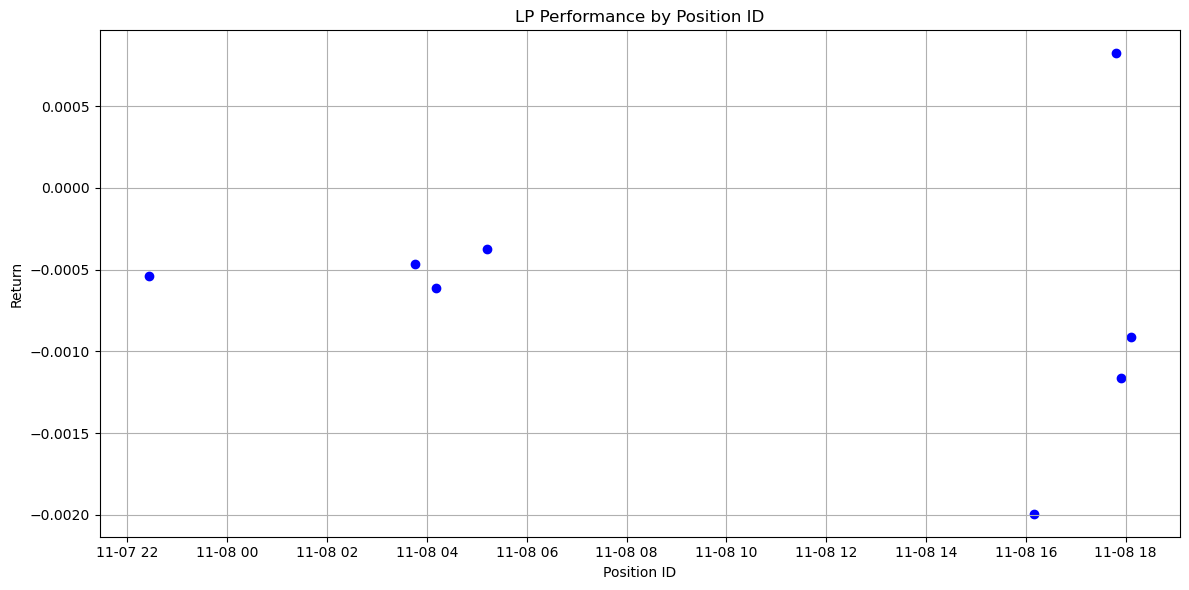

In [353]:
collapse_returns = result_df[(result_df['timestamp'].dt.date>=pd.Timestamp(2022,11,7).date())]

plt.figure(figsize=(12, 6))
plt.scatter(collapse_returns.timestamp, collapse_returns['return'], marker='o', linestyle='-', color='b')
plt.xlabel('Position ID')
plt.ylabel('Return')
plt.title('LP Performance by Position ID')
plt.grid(True)
plt.tight_layout()
plt.show()

### Calculating the gross earned fees

In [354]:
acc_fees = collects[collects['owner']==lp_id][['amount0','amount1']] .reset_index(drop=True)
acc_fees['amount0'] =  acc_fees['amount0'] - lp_burns['amount0'].reset_index(drop=True)
acc_fees['amount1'] =  acc_fees['amount1'] - lp_burns['amount1'].reset_index(drop=True)
x,y = acc_fees.sum()
print(f"The LP earned the following fees: {y} ETH and {x} USDC")